In [1]:
# to auto reload the modified module
% load_ext autoreload
% autoreload 2

In [16]:
import tensorflow as tf
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import gc

from utils import *
from data import MnistTF
from nn_kd import *
from layers import *
# from models import *

In [3]:
# check_available_device()
# seed settings
set_rand_seed(0)

In [4]:
# read Mnist data
try_cls2 = True
if try_cls2:
    mnist = MnistTF()
    X_train, y_train = mnist.get_train_data()
    X_val, y_val = mnist.get_validation_data()
    X_test, y_test = mnist.get_test_data()
    print_obj(X_train, 'X_train')
    print_obj(y_train, 'y_train')
    print_obj(X_val, 'X_val')
    print_obj(y_val, 'y_val')
    print_obj(X_test, 'X_test')
    print_obj(y_test, 'y_test')
    input_dims = X_train.shape[1]
    output_dims = y_train.shape[1]
    print_obj(input_dims, 'input_dims')
    print_obj(output_dims, 'output_dims')


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
X_train <class 'numpy.ndarray'> (55000, 784)
y_train <class 'numpy.ndarray'> (55000, 10)
X_val <class 'numpy.ndarray'> (5000, 784)
y_val <class 'numpy.ndarray'> (5000, 10)
X_test <class 'numpy.ndarray'> (10000, 784)
y_test <class 'numpy.ndarray'> (10000, 10)
input_dims <class 'int'> 784
output_dims <class 'int'> 10


In [5]:
def build_big_model(input_dims, output_dims):#, session):
    # session settings
    session = create_session(gpu_id='1')
#     tf.reset_default_graph()
    bigmodel = SoftenedNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

#     bigmodel.add_layer(
#         Dropout(inputs=bigmodel.h[-1], keep_prob=0.8))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
#     bigmodel.add_layer(
#         Dropout(inputs=bigmodel.h[-1], keep_prob=0.9))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
#     bigmodel.add_layer(
#         Dropout(inputs=bigmodel.h[-1], keep_prob=0.9))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    bigmodel.compile_nn(
        loss=tf.losses.softmax_cross_entropy(bigmodel.ys,bigmodel.logits)
        , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
        , metrics = ['acc'])

    return bigmodel

In [6]:
if try_cls2:
#     teacher = build_big_model(input_dims, output_dims, session)
    teacher = build_big_model(input_dims, output_dims)
    teacher.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=50
        ,display_steps=100)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8332262815499921489
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 925302784
locality {
  bus_id: 1
}
incarnation: 6072092787916528031
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 5.570653 , acc = 0.38 
Epoch 1 , step 100 , loss= 0.13343027 , acc = 0.96 
Epoch 1 , step 200 , loss= 0.121191844 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.067132205 , acc = 0.98 
Epoch 1 , step 400 , loss= 0.14224088 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.04388147 , acc = 0.99 
Epoch 1 , step 549 , loss= 0.08662972 val_loss= 0.10036573 , acc = 0.97 val acc = 0.9688 
Epoch 1 finished, loss= 0.20087726 val loss= 0.10036573 ,  acc = 0.9508909 val acc = 0.9688

Epoch 2 , step 50 , loss= 0.0128262 , acc = 1.0 
Epoch 2 , step 150 , loss= 0.028709795 , acc = 0.99 
Epoch 2 , step 250 , loss= 0.020629467 , acc = 0.99 
E

Epoch 17 , step 400 , loss= 0.0023171557 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.003278376 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0025393732 val_loss= 0.10201461 , acc = 1.0 val acc = 0.9798 
Epoch 17 finished, loss= 0.0023502787 val loss= 0.10201461 ,  acc = 0.99950904 val acc = 0.9798

Epoch 18 , step 50 , loss= 0.0012186081 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0006142576 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.0018391265 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.00050565816 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.0006919684 , acc = 1.0 
Epoch 18 , step 549 , loss= 8.110229e-05 val_loss= 0.08767309 , acc = 1.0 val acc = 0.9838 
Epoch 18 finished, loss= 0.0011775622 val loss= 0.08767309 ,  acc = 0.99978185 val acc = 0.9838

Epoch 19 , step 0 , loss= 0.0011004984 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.00096358085 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.00048472494 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.00083750504 , acc = 1.0 
Epoch 19 , step 400 , loss= 

Epoch 34 , step 350 , loss= 1.8680903e-05 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.0006846828 , acc = 1.0 
Epoch 34 , step 549 , loss= 2.1289736e-05 val_loss= 0.14010718 , acc = 1.0 val acc = 0.9814 
Epoch 34 finished, loss= 0.00082467654 val loss= 0.14010718 ,  acc = 0.9998727 val acc = 0.9814

Epoch 35 , step 0 , loss= 0.00030848896 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.0011094117 , acc = 1.0 
Epoch 35 , step 200 , loss= 7.1063846e-06 , acc = 1.0 
Epoch 35 , step 300 , loss= 2.7882608e-05 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.027187647 , acc = 0.99 
Epoch 35 , step 500 , loss= 1.8154007e-06 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.0001368865 val_loss= 0.15147187 , acc = 1.0 val acc = 0.9836 
Epoch 35 finished, loss= 0.0003921179 val loss= 0.15147187 ,  acc = 0.999909 val acc = 0.9836

Epoch 36 , step 50 , loss= 3.0167523e-06 , acc = 1.0 
Epoch 36 , step 150 , loss= 1.3674583e-05 , acc = 1.0 
Epoch 36 , step 250 , loss= 4.9669657e-06 , acc = 1.0 
Epoch 36 , step 350 , lo

Plotting loss...


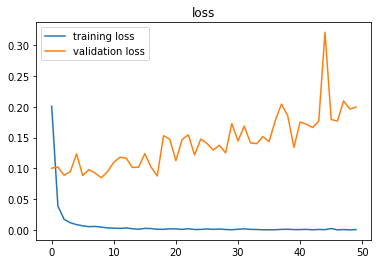

Plotting metrics...


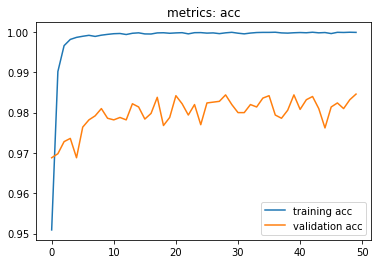

train {'acc': 0.9993273}
test {'acc': 0.9809}


In [7]:
if try_cls2:
#     gc.collect()
    teacher.plt_loss()
    teacher.plt_metrics()
    train_metric = teacher.get_metrics(X_train, y_train)
    test_metric = teacher.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

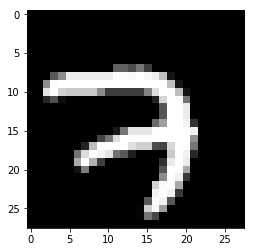

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0.0000000e+00 6.4687704e-36 6.3161662e-31 1.1057714e-24 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]


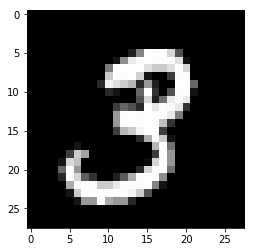

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[3.0389119e-38 2.2550733e-23 5.8691704e-32 1.0000000e+00 0.0000000e+00
 4.4957582e-25 0.0000000e+00 1.2092368e-33 1.4715498e-19 2.7537627e-26]


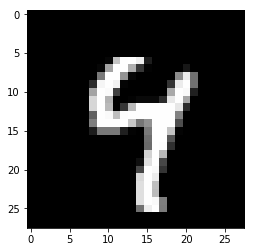

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[3.2628779e-15 4.3041205e-13 1.1519877e-19 3.1362380e-16 1.0000000e+00
 2.4342953e-20 3.1861943e-18 9.2279422e-16 5.5751963e-13 4.5210993e-14]


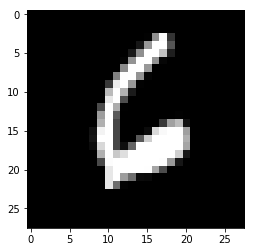

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[1.4728754e-26 1.6878464e-21 6.3368290e-22 1.4119818e-21 7.7564230e-18
 1.0085508e-07 9.9999988e-01 9.0988829e-32 2.4273522e-18 6.2152325e-23]


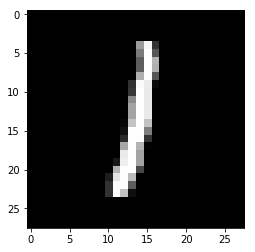

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.0881639e-34 1.0000000e+00 1.4239320e-34 1.4569643e-36 2.0479995e-34
 1.6983026e-29 7.1107747e-33 2.7428619e-24 1.4184726e-19 1.9613266e-32]


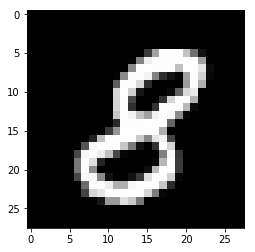

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[3.3958556e-25 1.5199690e-22 7.4766560e-26 5.2505799e-26 0.0000000e+00
 4.2513622e-29 3.6198934e-32 3.9520641e-28 1.0000000e+00 1.7829052e-28]


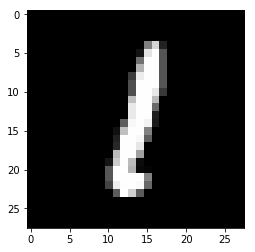

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.5205857e-27 1.0000000e+00 7.7450684e-26 1.4799141e-28 2.3371124e-28
 1.3152587e-21 2.7115895e-24 2.1752994e-19 6.9299796e-13 7.8616232e-29]


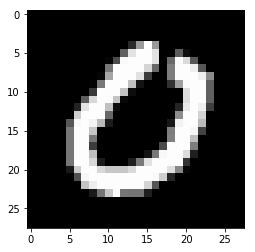

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


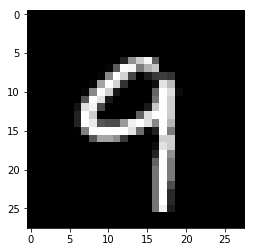

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1.3833142e-22 4.8774888e-27 1.5274641e-26 1.1335098e-18 5.9841046e-18
 6.9773653e-25 5.0909273e-31 3.1230369e-14 1.3523708e-18 1.0000000e+00]


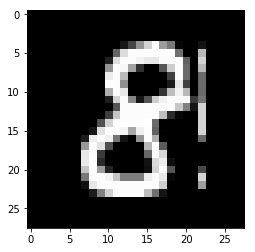

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1.42441499e-27 7.16500373e-21 5.72389461e-27 4.22386722e-28
 6.66692054e-33 2.08593565e-31 1.31850885e-36 9.09391670e-33
 1.00000000e+00 2.30588994e-33]


In [8]:
if try_cls2:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = teacher
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

In [9]:

def build_small_model(input_dims, output_dims, is_student):#, session):
    # session settings
    session = create_session(gpu_id='1')
#     tf.reset_default_graph()
    smallmodel = StudentNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=30,activation_fn=tf.nn.relu))
#     smallmodel.add_layer(
#         FC(inputs=smallmodel.h[-1],out_dims=800,activation_fn=tf.nn.relu))
    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    if is_student:
        smallmodel.compile_student(
            loss_standard=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-3) #TODO: learning rate
            , metrics = ['acc']
        )
    else:
        smallmodel.compile_nn(
            loss=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
            , metrics = ['acc']
        )
    return smallmodel

In [10]:
train_small = True
# gc.collect()
if try_cls2 and train_small:
#     small = build_small_model(input_dims, output_dims, session, is_student=False)
    small = build_small_model(input_dims, output_dims, is_student=False)
    small.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=50
        ,display_steps=100)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8874976692059644942
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 5762162209081831857
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2861955 , acc = 0.17 
Epoch 1 , step 100 , loss= 0.6177233 , acc = 0.89 
Epoch 1 , step 200 , loss= 0.34397143 , acc = 0.88 
Epoch 1 , step 300 , loss= 0.34700587 , acc = 0.9 
Epoch 1 , step 400 , loss= 0.34787023 , acc = 0.93 
Epoch 1 , step 500 , loss= 0.3537031 , acc = 0.88 
Epoch 1 , step 549 , loss= 0.52653486 val_loss= 0.29250526 , acc = 0.85 val acc = 0.9184 
Epoch 1 finished, loss= 0.5664766 val loss= 0.29250526 ,  acc = 0.85281813 val acc = 0.9184

Epoch 2 , step 50 , loss= 0.3167416 , acc = 0.93 
Epoch 2 , step 150 , loss= 0.31632364 , acc = 0.9 
Epoch 2 , step 250 , loss= 0.3124077 , acc = 0.9 
Epoch 2 ,

Epoch 17 , step 549 , loss= 0.05207695 val_loss= 0.105309166 , acc = 0.99 val acc = 0.9662 
Epoch 17 finished, loss= 0.07029351 val loss= 0.105309166 ,  acc = 0.9793091 val acc = 0.9662

Epoch 18 , step 50 , loss= 0.02350326 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0468447 , acc = 0.98 
Epoch 18 , step 250 , loss= 0.07216649 , acc = 0.98 
Epoch 18 , step 350 , loss= 0.025766492 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.023181839 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.06010464 val_loss= 0.107357435 , acc = 0.98 val acc = 0.9688 
Epoch 18 finished, loss= 0.06683294 val loss= 0.107357435 ,  acc = 0.98041826 val acc = 0.9688

Epoch 19 , step 0 , loss= 0.04127887 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.029280744 , acc = 0.99 
Epoch 19 , step 200 , loss= 0.044315044 , acc = 0.98 
Epoch 19 , step 300 , loss= 0.078259304 , acc = 0.99 
Epoch 19 , step 400 , loss= 0.07299182 , acc = 0.97 
Epoch 19 , step 500 , loss= 0.097017914 , acc = 0.97 
Epoch 19 , step 549 , loss= 0.116710186 val

Epoch 35 , step 100 , loss= 0.023896823 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.013222306 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.014583997 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.042660214 , acc = 0.99 
Epoch 35 , step 500 , loss= 0.034127653 , acc = 0.98 
Epoch 35 , step 549 , loss= 0.02217709 val_loss= 0.112429984 , acc = 0.99 val acc = 0.9658 
Epoch 35 finished, loss= 0.03319012 val loss= 0.112429984 ,  acc = 0.9915636 val acc = 0.9658

Epoch 36 , step 50 , loss= 0.036482465 , acc = 0.99 
Epoch 36 , step 150 , loss= 0.036895543 , acc = 0.98 
Epoch 36 , step 250 , loss= 0.051209487 , acc = 0.99 
Epoch 36 , step 350 , loss= 0.017854339 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.025514167 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.079281 val_loss= 0.11247787 , acc = 0.99 val acc = 0.9678 
Epoch 36 finished, loss= 0.03162553 val loss= 0.11247787 ,  acc = 0.99154544 val acc = 0.9678

Epoch 37 , step 0 , loss= 0.08593508 , acc = 0.98 
Epoch 37 , step 100 , loss= 0.03603642 , acc

Small model
Plotting loss...


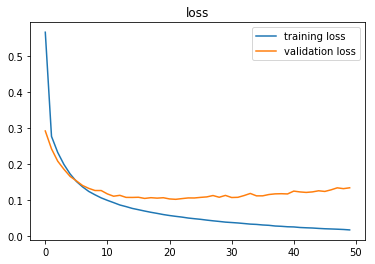

Plotting metrics...


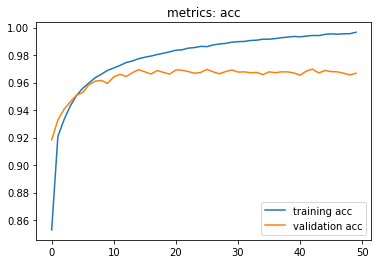

train {'acc': 0.99636364}
test {'acc': 0.9657}


In [11]:
if try_cls2 and train_small:
    print('Small model')
    small.plt_loss()
    small.plt_metrics()
    train_metric = small.get_metrics(X_train, y_train)
    test_metric = small.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

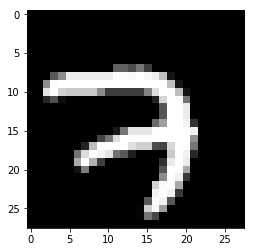

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[7.7257484e-10 1.8703139e-16 2.7984256e-02 4.6661846e-02 1.4786876e-09
 1.1083736e-16 2.8945683e-23 9.2535388e-01 9.3621590e-11 3.1510503e-08]


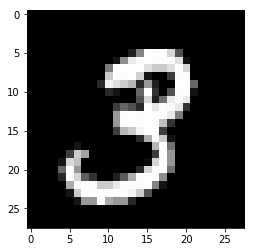

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1.0147139e-20 3.4479768e-16 1.0863974e-12 9.9999893e-01 1.8417888e-27
 6.2093636e-07 7.5794751e-28 1.8034422e-16 4.3584299e-07 9.1204121e-11]


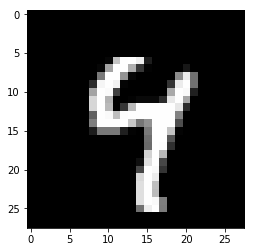

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[2.4415876e-16 1.8202435e-16 1.2331705e-13 2.0419921e-09 5.3168100e-01
 1.0448048e-04 3.2448970e-09 4.5450520e-06 1.9976794e-06 4.6820799e-01]


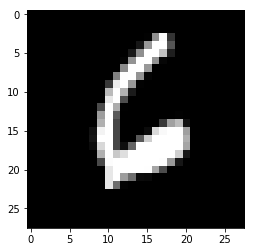

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[7.75215256e-07 1.15838885e-08 9.10215840e-06 6.51927405e-13
 6.07172933e-06 7.77621722e-07 9.99983311e-01 3.25274002e-10
 6.04188517e-15 1.84595308e-11]


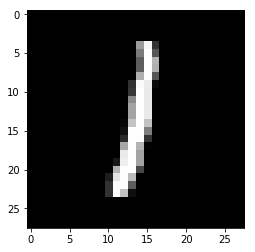

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[7.0288447e-10 9.9998856e-01 6.4585528e-09 2.9161324e-09 3.0771878e-07
 1.2538506e-11 8.0452525e-09 2.3142923e-07 1.0816294e-05 1.3157013e-08]


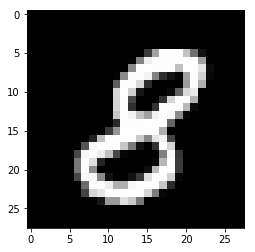

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[2.6639747e-12 1.8887624e-13 7.2010175e-06 9.9685985e-07 1.6306670e-17
 1.2791298e-09 9.4723145e-17 4.3039306e-16 9.9999177e-01 4.3820685e-12]


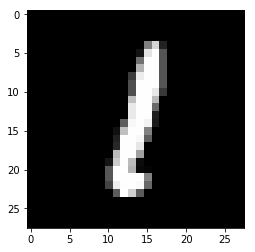

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.10433787e-08 9.99987841e-01 1.28134765e-08 2.01911932e-10
 1.18290956e-12 2.35308667e-14 2.22373675e-09 1.20139809e-08
 1.22012952e-05 2.50578811e-11]


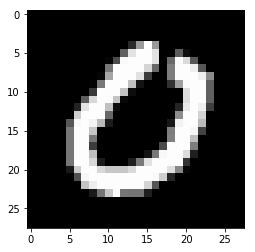

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.0000000e+00 2.5245177e-19 1.3812088e-09 4.6934792e-13 7.0962700e-20
 7.7683140e-14 1.4174501e-08 1.9525359e-10 1.0197933e-15 7.9704279e-09]


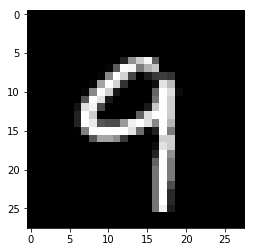

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[4.3811641e-14 4.6017924e-14 2.1464495e-11 2.7106289e-08 1.4782401e-05
 5.7644989e-08 7.7343654e-15 3.9620505e-07 1.2084591e-08 9.9998474e-01]


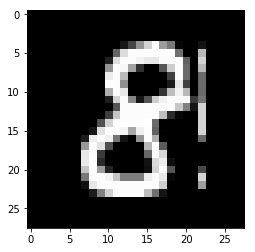

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[6.1792231e-11 2.2501498e-13 8.0513582e-04 2.5733218e-06 3.0896890e-17
 2.5260736e-09 1.8788553e-13 2.9856089e-12 9.9919230e-01 5.2694932e-12]


In [12]:
if try_cls2 and train_small:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = small
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

Training student with temperature = 2 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15791679070662932187
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 5682481316577022137
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.321642 , acc = 0.06 
Epoch 1 , step 100 , loss= 0.93843865 , acc = 0.83 
Epoch 1 , step 200 , loss= 0.5264721 , acc = 0.84 
Epoch 1 , step 300 , loss= 0.4468141 , acc = 0.9 
Epoch 1 , step 400 , loss= 0.28945294 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.32210395 , acc = 0.91 
Epoch 1 , step 549 , loss= 0.27423263 val_loss= 0.30590504 , acc = 0.89 val acc = 0.9128 
Epoch 1 finished, loss= 0.7313081 
Epoch 2 , step 50 , loss= 0.37238586 , acc = 0.92 
Epoch 2 , step 150 , loss= 0.33230746 , acc = 0.88 
Epoch 2 , ste

Epoch 19 , step 549 , loss= 0.079030655 val_loss= 0.12257758 , acc = 0.97 val acc = 0.9602 
Epoch 19 finished, loss= 0.19144998 
Epoch 20 , step 50 , loss= 0.08048715 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.10937207 , acc = 0.97 
Epoch 20 , step 250 , loss= 0.109989025 , acc = 0.97 
Epoch 20 , step 350 , loss= 0.16399567 , acc = 0.94 
Epoch 20 , step 450 , loss= 0.18171169 , acc = 0.95 
Epoch 20 , step 549 , loss= 0.096704066 val_loss= 0.117944874 , acc = 0.98 val acc = 0.9612 
Epoch 20 finished, loss= 0.18832351 
Epoch 21 , step 0 , loss= 0.0620189 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.12971497 , acc = 0.95 
Epoch 21 , step 200 , loss= 0.13705492 , acc = 0.96 
Epoch 21 , step 300 , loss= 0.116321504 , acc = 0.97 
Epoch 21 , step 400 , loss= 0.07844181 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.15474454 , acc = 0.97 
Epoch 21 , step 549 , loss= 0.15515196 val_loss= 0.11826562 , acc = 0.97 val acc = 0.9608 
Epoch 21 finished, loss= 0.18478471 
Epoch 22 , step 50 , loss= 0.091

Epoch 39 , step 300 , loss= 0.036890104 , acc = 0.99 
Epoch 39 , step 400 , loss= 0.055117503 , acc = 0.98 
Epoch 39 , step 500 , loss= 0.07486426 , acc = 0.99 
Epoch 39 , step 549 , loss= 0.07593256 val_loss= 0.1212114 , acc = 0.99 val acc = 0.9644 
Epoch 39 finished, loss= 0.13262582 
Epoch 40 , step 50 , loss= 0.029043801 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.015449225 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.06756171 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.029801726 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.041046888 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.042265482 val_loss= 0.12181157 , acc = 0.99 val acc = 0.9628 
Epoch 40 finished, loss= 0.13043128 
Epoch 41 , step 0 , loss= 0.05382689 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.032952823 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.03691075 , acc = 0.98 
Epoch 41 , step 300 , loss= 0.05819089 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.07262106 , acc = 0.99 
Epoch 41 , step 500 , loss= 0.023897313 , acc = 1.0 


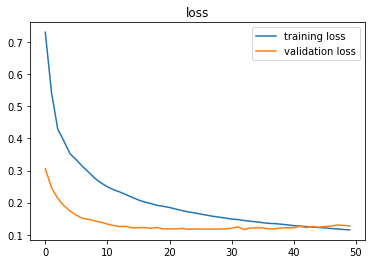

Plotting metrics...


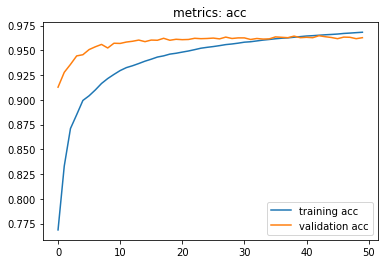

train {'acc': 0.98989093}
test {'acc': 0.9649}

Training student with temperature = 2 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11371397955261100333
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 17660122842685075203
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3238041 , acc = 0.07 
Epoch 1 , step 100 , loss= 1.0039873 , acc = 0.73 
Epoch 1 , step 200 , loss= 0.56948817 , acc = 0.87 
Epoch 1 , step 300 , loss= 0.48602 , acc = 0.84 
Epoch 1 , step 400 , loss= 0.46415895 , acc = 0.85 
Epoch 1 , step 500 , loss= 0.3292299 , acc = 0.93 
Epoch 1 , step 549 , loss= 0.29293445 val_loss= 0.31349367 , acc = 0.92 val acc = 0.915 
Epoch 1 finished, loss= 0.78137475 
Epoch 2 , step 50 , loss= 0.2849236 , acc = 0.92 
Epoch 2 , step 1

Epoch 19 , step 500 , loss= 0.08361522 , acc = 0.98 
Epoch 19 , step 549 , loss= 0.092751935 val_loss= 0.11660223 , acc = 0.97 val acc = 0.9668 
Epoch 19 finished, loss= 0.17630403 
Epoch 20 , step 50 , loss= 0.078968704 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.15182737 , acc = 0.95 
Epoch 20 , step 250 , loss= 0.059758067 , acc = 0.98 
Epoch 20 , step 350 , loss= 0.08300194 , acc = 0.97 
Epoch 20 , step 450 , loss= 0.08900745 , acc = 0.99 
Epoch 20 , step 549 , loss= 0.0763278 val_loss= 0.1194637 , acc = 0.97 val acc = 0.9672 
Epoch 20 finished, loss= 0.17231226 
Epoch 21 , step 0 , loss= 0.06428044 , acc = 0.98 
Epoch 21 , step 100 , loss= 0.08462142 , acc = 0.97 
Epoch 21 , step 200 , loss= 0.099038444 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.08015806 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.07050759 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.05423052 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.054998662 val_loss= 0.116019264 , acc = 0.98 val acc = 0.9686 
Epoch 21 finishe

Epoch 39 , step 200 , loss= 0.041946333 , acc = 0.99 
Epoch 39 , step 300 , loss= 0.027612967 , acc = 1.0 
Epoch 39 , step 400 , loss= 0.03212564 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.08006249 , acc = 0.97 
Epoch 39 , step 549 , loss= 0.017961456 val_loss= 0.1227028 , acc = 1.0 val acc = 0.9696 
Epoch 39 finished, loss= 0.115005076 
Epoch 40 , step 50 , loss= 0.029128185 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.035045523 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.03975209 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.01629509 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.092840984 , acc = 0.97 
Epoch 40 , step 549 , loss= 0.013791693 val_loss= 0.1214039 , acc = 1.0 val acc = 0.9684 
Epoch 40 finished, loss= 0.113223635 
Epoch 41 , step 0 , loss= 0.030448437 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.20466289 , acc = 0.98 
Epoch 41 , step 200 , loss= 0.06447379 , acc = 0.98 
Epoch 41 , step 300 , loss= 0.0410375 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.06301284 , acc = 0.98 
Epoc

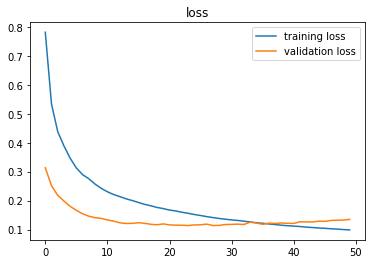

Plotting metrics...


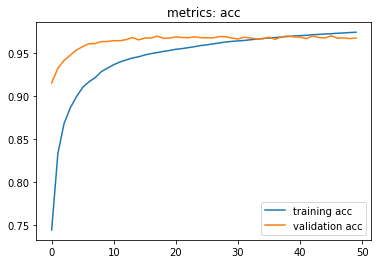

train {'acc': 0.9945091}
test {'acc': 0.967}

Training student with temperature = 2 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4050897278671602694
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 9427390792399641398
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3546271 , acc = 0.04 
Epoch 1 , step 100 , loss= 0.8625543 , acc = 0.83 
Epoch 1 , step 200 , loss= 0.68376905 , acc = 0.79 
Epoch 1 , step 300 , loss= 0.44291106 , acc = 0.91 
Epoch 1 , step 400 , loss= 0.29005718 , acc = 0.94 
Epoch 1 , step 500 , loss= 0.33658564 , acc = 0.92 
Epoch 1 , step 549 , loss= 0.34023884 val_loss= 0.31988162 , acc = 0.92 val acc = 0.923 
Epoch 1 finished, loss= 0.7586776 
Epoch 2 , step 50 , loss= 0.34558788 , acc = 0.93 
Epoch 2 , step 150

Epoch 19 , step 500 , loss= 0.10297776 , acc = 0.96 
Epoch 19 , step 549 , loss= 0.04127007 val_loss= 0.121900454 , acc = 0.99 val acc = 0.9638 
Epoch 19 finished, loss= 0.178241 
Epoch 20 , step 50 , loss= 0.035005335 , acc = 1.0 
Epoch 20 , step 150 , loss= 0.0360867 , acc = 1.0 
Epoch 20 , step 250 , loss= 0.11206506 , acc = 0.97 
Epoch 20 , step 350 , loss= 0.06731895 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.19859442 , acc = 0.96 
Epoch 20 , step 549 , loss= 0.05864147 val_loss= 0.11928174 , acc = 0.99 val acc = 0.9654 
Epoch 20 finished, loss= 0.17391998 
Epoch 21 , step 0 , loss= 0.19477384 , acc = 0.95 
Epoch 21 , step 100 , loss= 0.057514615 , acc = 0.98 
Epoch 21 , step 200 , loss= 0.103810124 , acc = 0.97 
Epoch 21 , step 300 , loss= 0.105155185 , acc = 0.97 
Epoch 21 , step 400 , loss= 0.08922521 , acc = 0.96 
Epoch 21 , step 500 , loss= 0.101727635 , acc = 0.97 
Epoch 21 , step 549 , loss= 0.14711228 val_loss= 0.12018039 , acc = 0.97 val acc = 0.9656 
Epoch 21 finished, 

Epoch 39 , step 200 , loss= 0.033459745 , acc = 1.0 
Epoch 39 , step 300 , loss= 0.02764997 , acc = 1.0 
Epoch 39 , step 400 , loss= 0.024231032 , acc = 1.0 
Epoch 39 , step 500 , loss= 0.034771122 , acc = 0.99 
Epoch 39 , step 549 , loss= 0.034046203 val_loss= 0.13583563 , acc = 0.98 val acc = 0.9618 
Epoch 39 finished, loss= 0.11788653 
Epoch 40 , step 50 , loss= 0.063808665 , acc = 0.98 
Epoch 40 , step 150 , loss= 0.022453044 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.03420516 , acc = 0.98 
Epoch 40 , step 350 , loss= 0.042718768 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.02596274 , acc = 1.0 
Epoch 40 , step 549 , loss= 0.057564206 val_loss= 0.13039874 , acc = 0.99 val acc = 0.9642 
Epoch 40 finished, loss= 0.11611497 
Epoch 41 , step 0 , loss= 0.023848655 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.013380593 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.047626108 , acc = 0.98 
Epoch 41 , step 300 , loss= 0.046592217 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.019910717 , acc = 1.0 


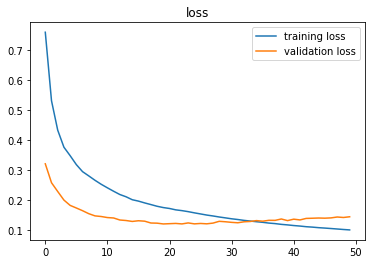

Plotting metrics...


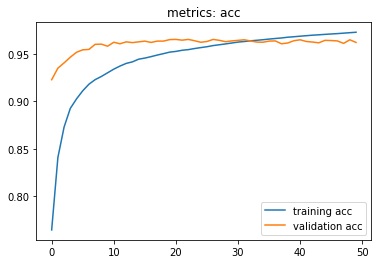

train {'acc': 0.99356365}
test {'acc': 0.9669}

Training student with temperature = 2 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17077189200346142941
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 8238687036964462616
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3009524 , acc = 0.15 
Epoch 1 , step 100 , loss= 0.77359724 , acc = 0.83 
Epoch 1 , step 200 , loss= 0.42512038 , acc = 0.91 
Epoch 1 , step 300 , loss= 0.5840022 , acc = 0.83 
Epoch 1 , step 400 , loss= 0.48080304 , acc = 0.87 
Epoch 1 , step 500 , loss= 0.40429515 , acc = 0.88 
Epoch 1 , step 549 , loss= 0.4780513 val_loss= 0.31595773 , acc = 0.87 val acc = 0.9212 
Epoch 1 finished, loss= 0.7781173 
Epoch 2 , step 50 , loss= 0.28128117 , acc = 0.92 
Epoch 2 , ste

Epoch 19 , step 500 , loss= 0.082875654 , acc = 0.96 
Epoch 19 , step 549 , loss= 0.05124373 val_loss= 0.12567776 , acc = 0.98 val acc = 0.9684 
Epoch 19 finished, loss= 0.19005568 
Epoch 20 , step 50 , loss= 0.11328012 , acc = 0.97 
Epoch 20 , step 150 , loss= 0.07729773 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.04939498 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.03682965 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.08661508 , acc = 0.98 
Epoch 20 , step 549 , loss= 0.060054295 val_loss= 0.12373567 , acc = 0.99 val acc = 0.9676 
Epoch 20 finished, loss= 0.18454134 
Epoch 21 , step 0 , loss= 0.061714247 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.08707102 , acc = 0.97 
Epoch 21 , step 200 , loss= 0.235914 , acc = 0.96 
Epoch 21 , step 300 , loss= 0.070697576 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.035551734 , acc = 1.0 
Epoch 21 , step 500 , loss= 0.12618963 , acc = 0.98 
Epoch 21 , step 549 , loss= 0.066326246 val_loss= 0.1275029 , acc = 0.99 val acc = 0.9656 
Epoch 21 finished,

Epoch 39 , step 200 , loss= 0.018686859 , acc = 1.0 
Epoch 39 , step 300 , loss= 0.019537656 , acc = 1.0 
Epoch 39 , step 400 , loss= 0.060992304 , acc = 0.98 
Epoch 39 , step 500 , loss= 0.021747917 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.09460941 val_loss= 0.13561748 , acc = 0.98 val acc = 0.9644 
Epoch 39 finished, loss= 0.124263585 
Epoch 40 , step 50 , loss= 0.01673177 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.027000895 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.047657013 , acc = 0.98 
Epoch 40 , step 350 , loss= 0.025327098 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.013762106 , acc = 1.0 
Epoch 40 , step 549 , loss= 0.06539674 val_loss= 0.13551094 , acc = 0.97 val acc = 0.9676 
Epoch 40 finished, loss= 0.122149326 
Epoch 41 , step 0 , loss= 0.038998596 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.043374803 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.032230347 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.012072863 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.04682489 , acc = 0.98

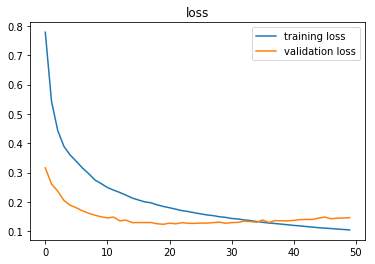

Plotting metrics...


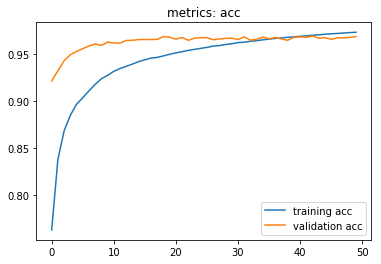

train {'acc': 0.99512726}
test {'acc': 0.9647}

Training student with temperature = 2 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2047547891128673296
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 7831322879341396237
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.305867 , acc = 0.09 
Epoch 1 , step 100 , loss= 0.63324755 , acc = 0.88 
Epoch 1 , step 200 , loss= 0.4219517 , acc = 0.9 
Epoch 1 , step 300 , loss= 0.3399485 , acc = 0.89 
Epoch 1 , step 400 , loss= 0.4271201 , acc = 0.88 
Epoch 1 , step 500 , loss= 0.2986033 , acc = 0.9 
Epoch 1 , step 549 , loss= 0.40300682 val_loss= 0.2780514 , acc = 0.87 val acc = 0.9206 
Epoch 1 finished, loss= 0.6899635 
Epoch 2 , step 50 , loss= 0.3482022 , acc = 0.88 
Epoch 2 , step 150 , lo

Epoch 19 , step 500 , loss= 0.039892286 , acc = 0.98 
Epoch 19 , step 549 , loss= 0.08881054 val_loss= 0.11844392 , acc = 0.96 val acc = 0.964 
Epoch 19 finished, loss= 0.15353438 
Epoch 20 , step 50 , loss= 0.15976605 , acc = 0.96 
Epoch 20 , step 150 , loss= 0.03930785 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.023358252 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.07259477 , acc = 0.97 
Epoch 20 , step 450 , loss= 0.049096193 , acc = 0.98 
Epoch 20 , step 549 , loss= 0.054872867 val_loss= 0.11281559 , acc = 0.98 val acc = 0.962 
Epoch 20 finished, loss= 0.14951737 
Epoch 21 , step 0 , loss= 0.107719935 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.13350953 , acc = 0.96 
Epoch 21 , step 200 , loss= 0.036615185 , acc = 0.98 
Epoch 21 , step 300 , loss= 0.054534994 , acc = 0.97 
Epoch 21 , step 400 , loss= 0.08765557 , acc = 0.97 
Epoch 21 , step 500 , loss= 0.091555454 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.07726731 val_loss= 0.11380409 , acc = 0.98 val acc = 0.964 
Epoch 21 finish

Epoch 39 , step 200 , loss= 0.11272999 , acc = 0.99 
Epoch 39 , step 300 , loss= 0.02122885 , acc = 1.0 
Epoch 39 , step 400 , loss= 0.012831195 , acc = 1.0 
Epoch 39 , step 500 , loss= 0.04316221 , acc = 0.99 
Epoch 39 , step 549 , loss= 0.035083536 val_loss= 0.1341823 , acc = 0.98 val acc = 0.9638 
Epoch 39 finished, loss= 0.099834464 
Epoch 40 , step 50 , loss= 0.028351784 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.026595082 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.06270825 , acc = 0.97 
Epoch 40 , step 350 , loss= 0.012369458 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.12413546 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.02193243 val_loss= 0.13015719 , acc = 1.0 val acc = 0.9648 
Epoch 40 finished, loss= 0.09859248 
Epoch 41 , step 0 , loss= 0.01625769 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.02552123 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.028212506 , acc = 0.98 
Epoch 41 , step 300 , loss= 0.06613471 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.041040793 , acc = 0.99 
Epoc

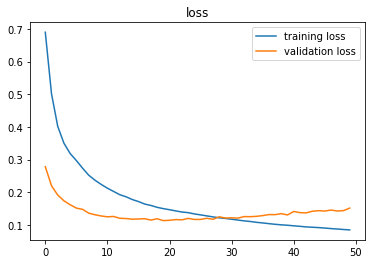

Plotting metrics...


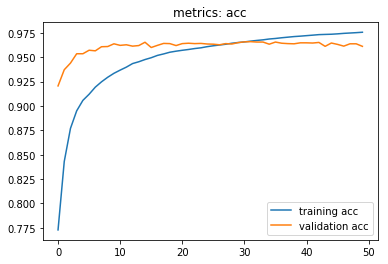

train {'acc': 0.99456364}
test {'acc': 0.9664}

Training student with temperature = 4 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8529559808410160152
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 1969412800880148035
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.292089 , acc = 0.12 
Epoch 1 , step 100 , loss= 1.2986314 , acc = 0.79 
Epoch 1 , step 200 , loss= 0.6811374 , acc = 0.84 
Epoch 1 , step 300 , loss= 0.63691103 , acc = 0.86 
Epoch 1 , step 400 , loss= 0.4655499 , acc = 0.81 
Epoch 1 , step 500 , loss= 0.558775 , acc = 0.83 
Epoch 1 , step 549 , loss= 0.5145118 val_loss= 0.36382335 , acc = 0.86 val acc = 0.9054 
Epoch 1 finished, loss= 0.92108643 
Epoch 2 , step 50 , loss= 0.47220436 , acc = 0.89 
Epoch 2 , step 150 ,

Epoch 19 , step 549 , loss= 0.06098095 val_loss= 0.13962619 , acc = 0.98 val acc = 0.9656 
Epoch 19 finished, loss= 0.2495968 
Epoch 20 , step 50 , loss= 0.12163739 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.108115666 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.05815652 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.18021509 , acc = 0.94 
Epoch 20 , step 450 , loss= 0.13122746 , acc = 0.95 
Epoch 20 , step 549 , loss= 0.12583522 val_loss= 0.1359941 , acc = 0.97 val acc = 0.966 
Epoch 20 finished, loss= 0.24365532 
Epoch 21 , step 0 , loss= 0.09911378 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.20296906 , acc = 0.95 
Epoch 21 , step 200 , loss= 0.07623477 , acc = 0.98 
Epoch 21 , step 300 , loss= 0.116816394 , acc = 1.0 
Epoch 21 , step 400 , loss= 0.055106867 , acc = 1.0 
Epoch 21 , step 500 , loss= 0.07635429 , acc = 0.98 
Epoch 21 , step 549 , loss= 0.1153411 val_loss= 0.13529201 , acc = 0.98 val acc = 0.9686 
Epoch 21 finished, loss= 0.23662138 
Epoch 22 , step 50 , loss= 0.11492211 ,

Epoch 39 , step 400 , loss= 0.057700418 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.1021412 , acc = 0.99 
Epoch 39 , step 549 , loss= 0.064488284 val_loss= 0.12555368 , acc = 0.99 val acc = 0.9708 
Epoch 39 finished, loss= 0.17337276 
Epoch 40 , step 50 , loss= 0.16013947 , acc = 0.96 
Epoch 40 , step 150 , loss= 0.07601519 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.058094822 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.103496 , acc = 0.96 
Epoch 40 , step 450 , loss= 0.07576161 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.04775162 val_loss= 0.1261182 , acc = 0.99 val acc = 0.9694 
Epoch 40 finished, loss= 0.17137669 
Epoch 41 , step 0 , loss= 0.106200226 , acc = 0.97 
Epoch 41 , step 100 , loss= 0.09719815 , acc = 0.98 
Epoch 41 , step 200 , loss= 0.059749924 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.05684924 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.16710664 , acc = 0.97 
Epoch 41 , step 500 , loss= 0.09489324 , acc = 0.99 
Epoch 41 , step 549 , loss= 0.071397796 val_loss= 0.125911

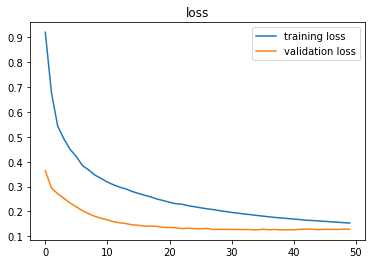

Plotting metrics...


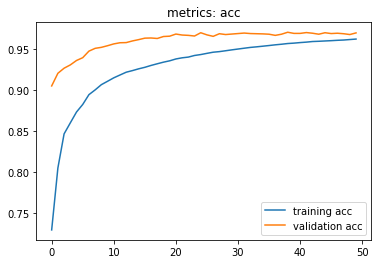

train {'acc': 0.98776364}
test {'acc': 0.9692}

Training student with temperature = 4 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8858119611402406775
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 17278958086142009608
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.299682 , acc = 0.15 
Epoch 1 , step 100 , loss= 1.3171229 , acc = 0.8 
Epoch 1 , step 200 , loss= 0.83048093 , acc = 0.82 
Epoch 1 , step 300 , loss= 0.5339243 , acc = 0.9 
Epoch 1 , step 400 , loss= 0.49855202 , acc = 0.89 
Epoch 1 , step 500 , loss= 0.4739955 , acc = 0.95 
Epoch 1 , step 549 , loss= 0.45247504 val_loss= 0.44366977 , acc = 0.94 val acc = 0.906 
Epoch 1 finished, loss= 0.91517603 
Epoch 2 , step 50 , loss= 0.48288226 , acc = 0.89 
Epoch 2 , step 15

Epoch 19 , step 549 , loss= 0.17213267 val_loss= 0.17026308 , acc = 0.96 val acc = 0.9634 
Epoch 19 finished, loss= 0.25936285 
Epoch 20 , step 50 , loss= 0.12539539 , acc = 0.97 
Epoch 20 , step 150 , loss= 0.13087778 , acc = 0.95 
Epoch 20 , step 250 , loss= 0.2063073 , acc = 0.97 
Epoch 20 , step 350 , loss= 0.15535176 , acc = 0.95 
Epoch 20 , step 450 , loss= 0.3059538 , acc = 0.92 
Epoch 20 , step 549 , loss= 0.13549887 val_loss= 0.16899577 , acc = 0.98 val acc = 0.9636 
Epoch 20 finished, loss= 0.25554138 
Epoch 21 , step 0 , loss= 0.16144644 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.15725201 , acc = 0.96 
Epoch 21 , step 200 , loss= 0.15750699 , acc = 0.96 
Epoch 21 , step 300 , loss= 0.19685605 , acc = 0.96 
Epoch 21 , step 400 , loss= 0.10336265 , acc = 0.99 
Epoch 21 , step 500 , loss= 0.053775046 , acc = 1.0 
Epoch 21 , step 549 , loss= 0.103945985 val_loss= 0.16525465 , acc = 0.98 val acc = 0.9638 
Epoch 21 finished, loss= 0.2493031 
Epoch 22 , step 50 , loss= 0.07187847 

Epoch 39 , step 400 , loss= 0.08221157 , acc = 0.97 
Epoch 39 , step 500 , loss= 0.07982528 , acc = 0.97 
Epoch 39 , step 549 , loss= 0.08546645 val_loss= 0.16847149 , acc = 0.98 val acc = 0.9662 
Epoch 39 finished, loss= 0.18436186 
Epoch 40 , step 50 , loss= 0.058001608 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.16548145 , acc = 0.97 
Epoch 40 , step 250 , loss= 0.056020055 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.07789377 , acc = 0.98 
Epoch 40 , step 450 , loss= 0.1313838 , acc = 0.97 
Epoch 40 , step 549 , loss= 0.09360446 val_loss= 0.16510528 , acc = 0.98 val acc = 0.9658 
Epoch 40 finished, loss= 0.18234731 
Epoch 41 , step 0 , loss= 0.049218416 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.103855945 , acc = 0.98 
Epoch 41 , step 200 , loss= 0.05218199 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.061837077 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.05363484 , acc = 1.0 
Epoch 41 , step 500 , loss= 0.025184995 , acc = 1.0 
Epoch 41 , step 549 , loss= 0.10479061 val_loss= 0.16603

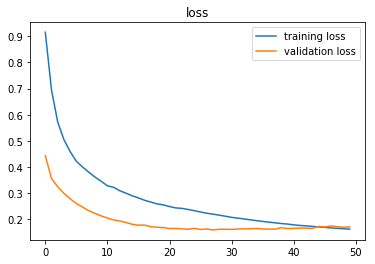

Plotting metrics...


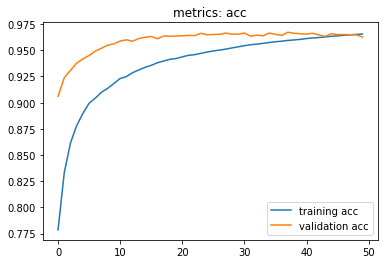

train {'acc': 0.9885091}
test {'acc': 0.9652}

Training student with temperature = 4 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5804140198957778185
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 16990180782091518123
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3043118 , acc = 0.1 
Epoch 1 , step 100 , loss= 1.1930807 , acc = 0.77 
Epoch 1 , step 200 , loss= 0.7333896 , acc = 0.88 
Epoch 1 , step 300 , loss= 0.5187537 , acc = 0.92 
Epoch 1 , step 400 , loss= 0.5081329 , acc = 0.92 
Epoch 1 , step 500 , loss= 0.5147225 , acc = 0.91 
Epoch 1 , step 549 , loss= 0.42191812 val_loss= 0.44986486 , acc = 0.92 val acc = 0.914 
Epoch 1 finished, loss= 0.8849012 
Epoch 2 , step 50 , loss= 0.39550936 , acc = 0.93 
Epoch 2 , step 150 , 

Epoch 19 , step 549 , loss= 0.10769847 val_loss= 0.18668154 , acc = 0.98 val acc = 0.962 
Epoch 19 finished, loss= 0.25765902 
Epoch 20 , step 50 , loss= 0.11205738 , acc = 0.97 
Epoch 20 , step 150 , loss= 0.20285279 , acc = 0.96 
Epoch 20 , step 250 , loss= 0.18600954 , acc = 0.95 
Epoch 20 , step 350 , loss= 0.17822799 , acc = 0.97 
Epoch 20 , step 450 , loss= 0.12985234 , acc = 0.99 
Epoch 20 , step 549 , loss= 0.18578601 val_loss= 0.18391469 , acc = 0.98 val acc = 0.9654 
Epoch 20 finished, loss= 0.25341922 
Epoch 21 , step 0 , loss= 0.07932926 , acc = 0.98 
Epoch 21 , step 100 , loss= 0.13293207 , acc = 0.98 
Epoch 21 , step 200 , loss= 0.075127445 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.18199067 , acc = 0.96 
Epoch 21 , step 400 , loss= 0.12119586 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.21329007 , acc = 0.97 
Epoch 21 , step 549 , loss= 0.33032784 val_loss= 0.1781438 , acc = 0.93 val acc = 0.9666 
Epoch 21 finished, loss= 0.24874958 
Epoch 22 , step 50 , loss= 0.04693706

Epoch 39 , step 400 , loss= 0.057671756 , acc = 1.0 
Epoch 39 , step 500 , loss= 0.04246696 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.052513015 val_loss= 0.17432728 , acc = 0.99 val acc = 0.968 
Epoch 39 finished, loss= 0.1814275 
Epoch 40 , step 50 , loss= 0.0627224 , acc = 0.98 
Epoch 40 , step 150 , loss= 0.06584759 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.09448387 , acc = 0.98 
Epoch 40 , step 350 , loss= 0.091988735 , acc = 0.97 
Epoch 40 , step 450 , loss= 0.07267799 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.0925122 val_loss= 0.17518672 , acc = 0.98 val acc = 0.9672 
Epoch 40 finished, loss= 0.17908774 
Epoch 41 , step 0 , loss= 0.06474361 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.031128896 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.0777464 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.13539511 , acc = 0.97 
Epoch 41 , step 400 , loss= 0.056069594 , acc = 0.99 
Epoch 41 , step 500 , loss= 0.052072458 , acc = 0.99 
Epoch 41 , step 549 , loss= 0.2593096 val_loss= 0.17626795 , 

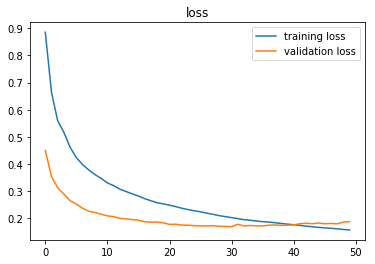

Plotting metrics...


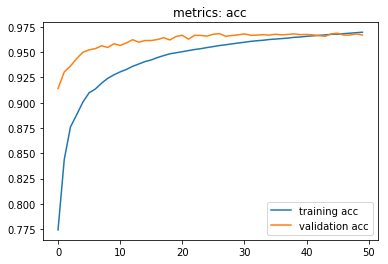

train {'acc': 0.9912909}
test {'acc': 0.9636}

Training student with temperature = 4 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10936163879487939832
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 1010669992408550521
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.300233 , acc = 0.11 
Epoch 1 , step 100 , loss= 0.8371557 , acc = 0.85 
Epoch 1 , step 200 , loss= 0.72206306 , acc = 0.8 
Epoch 1 , step 300 , loss= 0.6814314 , acc = 0.86 
Epoch 1 , step 400 , loss= 0.4988389 , acc = 0.89 
Epoch 1 , step 500 , loss= 0.46775734 , acc = 0.89 
Epoch 1 , step 549 , loss= 0.4540797 val_loss= 0.40495747 , acc = 0.91 val acc = 0.9238 
Epoch 1 finished, loss= 0.85165125 
Epoch 2 , step 50 , loss= 0.37348825 , acc = 0.92 
Epoch 2 , step 15

Epoch 19 , step 549 , loss= 0.068688855 val_loss= 0.17945848 , acc = 0.99 val acc = 0.9624 
Epoch 19 finished, loss= 0.22964115 
Epoch 20 , step 50 , loss= 0.10742904 , acc = 0.99 
Epoch 20 , step 150 , loss= 0.13728738 , acc = 0.96 
Epoch 20 , step 250 , loss= 0.19658665 , acc = 0.96 
Epoch 20 , step 350 , loss= 0.067543544 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.13784863 , acc = 0.96 
Epoch 20 , step 549 , loss= 0.08520527 val_loss= 0.18118319 , acc = 0.99 val acc = 0.9614 
Epoch 20 finished, loss= 0.22467232 
Epoch 21 , step 0 , loss= 0.08442132 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.071575284 , acc = 1.0 
Epoch 21 , step 200 , loss= 0.07589787 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.13215232 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.06668927 , acc = 0.99 
Epoch 21 , step 500 , loss= 0.14473286 , acc = 0.95 
Epoch 21 , step 549 , loss= 0.07923533 val_loss= 0.17646362 , acc = 1.0 val acc = 0.9624 
Epoch 21 finished, loss= 0.21797158 
Epoch 22 , step 50 , loss= 0.090357

Epoch 39 , step 300 , loss= 0.052757718 , acc = 0.99 
Epoch 39 , step 400 , loss= 0.056470305 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.04110618 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.028421795 val_loss= 0.18650267 , acc = 1.0 val acc = 0.9626 
Epoch 39 finished, loss= 0.15506 
Epoch 40 , step 50 , loss= 0.04490963 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.02637463 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.04166699 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.048289794 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.05415497 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.024496922 val_loss= 0.17725961 , acc = 1.0 val acc = 0.9618 
Epoch 40 finished, loss= 0.15240434 
Epoch 41 , step 0 , loss= 0.0560404 , acc = 0.98 
Epoch 41 , step 100 , loss= 0.03420607 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.08426541 , acc = 0.96 
Epoch 41 , step 300 , loss= 0.04849284 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.077967495 , acc = 0.99 
Epoch 41 , step 500 , loss= 0.041271865 , acc = 0.99 
Epoch 41

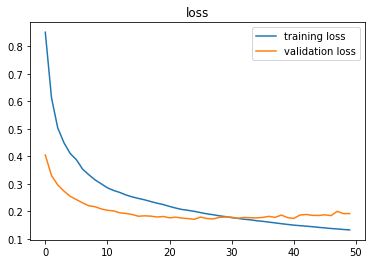

Plotting metrics...


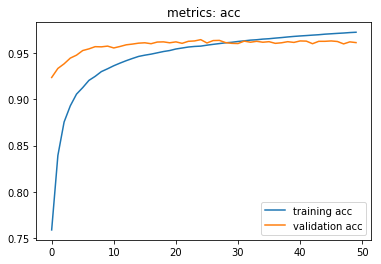

train {'acc': 0.99176365}
test {'acc': 0.9657}

Training student with temperature = 4 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3281539003075008065
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 3906173156356383212
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2779675 , acc = 0.13 
Epoch 1 , step 100 , loss= 0.68703026 , acc = 0.84 
Epoch 1 , step 200 , loss= 0.39418238 , acc = 0.89 
Epoch 1 , step 300 , loss= 0.41668087 , acc = 0.91 
Epoch 1 , step 400 , loss= 0.29866362 , acc = 0.91 
Epoch 1 , step 500 , loss= 0.2910589 , acc = 0.88 
Epoch 1 , step 549 , loss= 0.40526277 val_loss= 0.29214808 , acc = 0.89 val acc = 0.9192 
Epoch 1 finished, loss= 0.68154955 
Epoch 2 , step 50 , loss= 0.19044897 , acc = 0.97 
Epoch 2 , step

Epoch 19 , step 500 , loss= 0.06926981 , acc = 0.97 
Epoch 19 , step 549 , loss= 0.0526001 val_loss= 0.10827864 , acc = 0.99 val acc = 0.9666 
Epoch 19 finished, loss= 0.15587696 
Epoch 20 , step 50 , loss= 0.019666826 , acc = 1.0 
Epoch 20 , step 150 , loss= 0.07013287 , acc = 0.97 
Epoch 20 , step 250 , loss= 0.031728707 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.030833697 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.07237866 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.06381873 val_loss= 0.10192008 , acc = 0.98 val acc = 0.9682 
Epoch 20 finished, loss= 0.15090233 
Epoch 21 , step 0 , loss= 0.04940658 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.12100583 , acc = 0.97 
Epoch 21 , step 200 , loss= 0.057558674 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.06579802 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.022462897 , acc = 1.0 
Epoch 21 , step 500 , loss= 0.051590633 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.025435837 val_loss= 0.10150529 , acc = 0.99 val acc = 0.969 
Epoch 21 finished

Epoch 39 , step 200 , loss= 0.031893454 , acc = 0.99 
Epoch 39 , step 300 , loss= 0.023627508 , acc = 1.0 
Epoch 39 , step 400 , loss= 0.043636113 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.024810499 , acc = 0.99 
Epoch 39 , step 549 , loss= 0.020003628 val_loss= 0.12276571 , acc = 0.99 val acc = 0.9662 
Epoch 39 finished, loss= 0.09819777 
Epoch 40 , step 50 , loss= 0.012946161 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.012310319 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.008395806 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.045591597 , acc = 0.98 
Epoch 40 , step 450 , loss= 0.0065284865 , acc = 1.0 
Epoch 40 , step 549 , loss= 0.012095957 val_loss= 0.125247 , acc = 1.0 val acc = 0.9658 
Epoch 40 finished, loss= 0.096308075 
Epoch 41 , step 0 , loss= 0.06257519 , acc = 0.98 
Epoch 41 , step 100 , loss= 0.04155226 , acc = 0.98 
Epoch 41 , step 200 , loss= 0.014283112 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.0057604616 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.023864655 , acc = 1.0

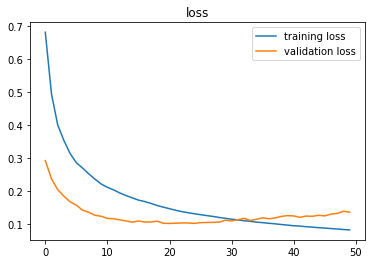

Plotting metrics...


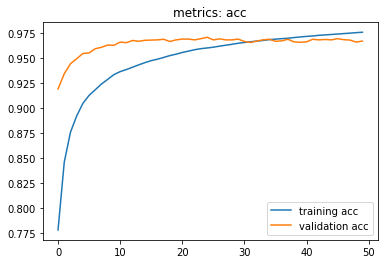

train {'acc': 0.99674547}
test {'acc': 0.9669}

Training student with temperature = 8 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17965499023471895844
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 16506084576714564575
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.299419 , acc = 0.13 
Epoch 1 , step 100 , loss= 1.6205677 , acc = 0.7 
Epoch 1 , step 200 , loss= 1.0039581 , acc = 0.84 
Epoch 1 , step 300 , loss= 0.7416489 , acc = 0.87 
Epoch 1 , step 400 , loss= 0.69679314 , acc = 0.83 
Epoch 1 , step 500 , loss= 0.46292156 , acc = 0.89 
Epoch 1 , step 549 , loss= 0.73384184 val_loss= 0.5397642 , acc = 0.84 val acc = 0.8948 
Epoch 1 finished, loss= 1.0798787 
Epoch 2 , step 50 , loss= 0.6053993 , acc = 0.82 
Epoch 2 , step 150 

Epoch 19 , step 549 , loss= 0.24205832 val_loss= 0.29740483 , acc = 0.95 val acc = 0.9604 
Epoch 19 finished, loss= 0.3862412 
Epoch 20 , step 50 , loss= 0.27446038 , acc = 0.95 
Epoch 20 , step 150 , loss= 0.3408732 , acc = 0.97 
Epoch 20 , step 250 , loss= 0.24759789 , acc = 0.97 
Epoch 20 , step 350 , loss= 0.22979741 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.24039625 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.31650996 val_loss= 0.2954263 , acc = 0.94 val acc = 0.9614 
Epoch 20 finished, loss= 0.38110417 
Epoch 21 , step 0 , loss= 0.39935502 , acc = 0.94 
Epoch 21 , step 100 , loss= 0.28051028 , acc = 0.94 
Epoch 21 , step 200 , loss= 0.29246095 , acc = 0.97 
Epoch 21 , step 300 , loss= 0.24961692 , acc = 1.0 
Epoch 21 , step 400 , loss= 0.301616 , acc = 0.95 
Epoch 21 , step 500 , loss= 0.29508114 , acc = 0.96 
Epoch 21 , step 549 , loss= 0.2435474 val_loss= 0.29368114 , acc = 0.97 val acc = 0.961 
Epoch 21 finished, loss= 0.37668416 
Epoch 22 , step 50 , loss= 0.2834889 , acc =

Epoch 39 , step 500 , loss= 0.23027466 , acc = 0.98 
Epoch 39 , step 549 , loss= 0.25908387 val_loss= 0.28333378 , acc = 0.99 val acc = 0.966 
Epoch 39 finished, loss= 0.3261595 
Epoch 40 , step 50 , loss= 0.21441793 , acc = 0.96 
Epoch 40 , step 150 , loss= 0.24567217 , acc = 0.97 
Epoch 40 , step 250 , loss= 0.29826832 , acc = 0.96 
Epoch 40 , step 350 , loss= 0.31587887 , acc = 0.98 
Epoch 40 , step 450 , loss= 0.1813478 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.2122003 val_loss= 0.28450805 , acc = 0.98 val acc = 0.9658 
Epoch 40 finished, loss= 0.3242781 
Epoch 41 , step 0 , loss= 0.30630982 , acc = 0.95 
Epoch 41 , step 100 , loss= 0.27473375 , acc = 0.97 
Epoch 41 , step 200 , loss= 0.26384318 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.20359284 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.3041826 , acc = 0.97 
Epoch 41 , step 500 , loss= 0.23116826 , acc = 1.0 
Epoch 41 , step 549 , loss= 0.231404 val_loss= 0.2817791 , acc = 1.0 val acc = 0.967 
Epoch 41 finished, loss= 0.322575

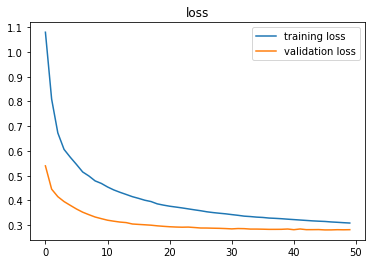

Plotting metrics...


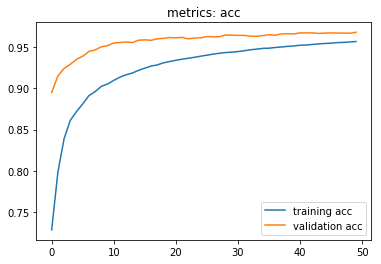

train {'acc': 0.9790364}
test {'acc': 0.9658}

Training student with temperature = 8 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7885784153436762028
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 8720412740407921693
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3026361 , acc = 0.16 
Epoch 1 , step 100 , loss= 1.5398434 , acc = 0.86 
Epoch 1 , step 200 , loss= 1.1612903 , acc = 0.89 
Epoch 1 , step 300 , loss= 0.8557774 , acc = 0.91 
Epoch 1 , step 400 , loss= 0.92005754 , acc = 0.89 
Epoch 1 , step 500 , loss= 0.6604018 , acc = 0.91 
Epoch 1 , step 549 , loss= 0.7756101 val_loss= 0.684705 , acc = 0.9 val acc = 0.9038 
Epoch 1 finished, loss= 1.1736596 
Epoch 2 , step 50 , loss= 0.45374233 , acc = 0.95 
Epoch 2 , step 150 , 

Epoch 20 , step 50 , loss= 0.3233918 , acc = 0.94 
Epoch 20 , step 150 , loss= 0.2678799 , acc = 0.98 
Epoch 20 , step 250 , loss= 0.3416915 , acc = 0.94 
Epoch 20 , step 350 , loss= 0.3190686 , acc = 0.96 
Epoch 20 , step 450 , loss= 0.36933362 , acc = 0.95 
Epoch 20 , step 549 , loss= 0.40548372 val_loss= 0.36164922 , acc = 0.95 val acc = 0.9566 
Epoch 20 finished, loss= 0.46062353 
Epoch 21 , step 0 , loss= 0.30098435 , acc = 0.98 
Epoch 21 , step 100 , loss= 0.25458512 , acc = 0.98 
Epoch 21 , step 200 , loss= 0.30801132 , acc = 0.96 
Epoch 21 , step 300 , loss= 0.32177442 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.24517961 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.24197671 , acc = 0.95 
Epoch 21 , step 549 , loss= 0.41144815 val_loss= 0.35986015 , acc = 0.91 val acc = 0.956 
Epoch 21 finished, loss= 0.45229936 
Epoch 22 , step 50 , loss= 0.3852653 , acc = 0.95 
Epoch 22 , step 150 , loss= 0.36950344 , acc = 0.95 
Epoch 22 , step 250 , loss= 0.45909375 , acc = 0.93 
Epoch 22 , s

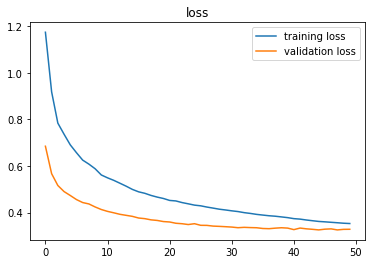

Plotting metrics...


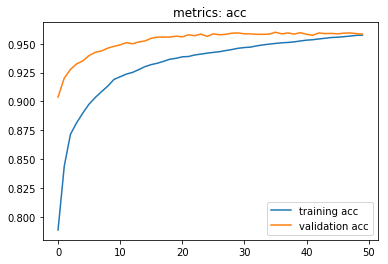

train {'acc': 0.9811636}
test {'acc': 0.9621}

Training student with temperature = 8 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16106358085826179915
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 10552745388486651234
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.332628 , acc = 0.14 
Epoch 1 , step 100 , loss= 1.2000463 , acc = 0.84 
Epoch 1 , step 200 , loss= 0.97725147 , acc = 0.86 
Epoch 1 , step 300 , loss= 0.8333769 , acc = 0.91 
Epoch 1 , step 400 , loss= 0.6953039 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.9099215 , acc = 0.85 
Epoch 1 , step 549 , loss= 0.77031106 val_loss= 0.7046488 , acc = 0.9 val acc = 0.9086 
Epoch 1 finished, loss= 1.1026913 
Epoch 2 , step 50 , loss= 0.82674205 , acc = 0.87 
Epoch 2 , step 150 ,

Epoch 20 , step 50 , loss= 0.324653 , acc = 0.97 
Epoch 20 , step 150 , loss= 0.31602782 , acc = 0.96 
Epoch 20 , step 250 , loss= 0.2541214 , acc = 0.96 
Epoch 20 , step 350 , loss= 0.2562105 , acc = 0.97 
Epoch 20 , step 450 , loss= 0.36496717 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.22533262 val_loss= 0.35164887 , acc = 0.98 val acc = 0.96 
Epoch 20 finished, loss= 0.46338117 
Epoch 21 , step 0 , loss= 0.2648974 , acc = 0.98 
Epoch 21 , step 100 , loss= 0.26070443 , acc = 0.98 
Epoch 21 , step 200 , loss= 0.2692109 , acc = 0.95 
Epoch 21 , step 300 , loss= 0.16254614 , acc = 0.99 
Epoch 21 , step 400 , loss= 0.20797236 , acc = 0.99 
Epoch 21 , step 500 , loss= 0.31817994 , acc = 0.96 
Epoch 21 , step 549 , loss= 0.21361144 val_loss= 0.3571542 , acc = 0.99 val acc = 0.9568 
Epoch 21 finished, loss= 0.45209253 
Epoch 22 , step 50 , loss= 0.16808899 , acc = 0.99 
Epoch 22 , step 150 , loss= 0.21012765 , acc = 0.98 
Epoch 22 , step 250 , loss= 0.15721531 , acc = 1.0 
Epoch 22 , step 

Epoch 40 , step 50 , loss= 0.17419964 , acc = 0.98 
Epoch 40 , step 150 , loss= 0.1811287 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.16441141 , acc = 0.98 
Epoch 40 , step 350 , loss= 0.15759252 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.3261168 , acc = 0.97 
Epoch 40 , step 549 , loss= 0.2862363 val_loss= 0.3270337 , acc = 0.98 val acc = 0.9628 
Epoch 40 finished, loss= 0.35165808 
Epoch 41 , step 0 , loss= 0.118316546 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.20500724 , acc = 0.98 
Epoch 41 , step 200 , loss= 0.19408856 , acc = 0.97 
Epoch 41 , step 300 , loss= 0.19742842 , acc = 0.97 
Epoch 41 , step 400 , loss= 0.11231739 , acc = 1.0 
Epoch 41 , step 500 , loss= 0.1902282 , acc = 0.99 
Epoch 41 , step 549 , loss= 0.22153953 val_loss= 0.3262758 , acc = 0.97 val acc = 0.9646 
Epoch 41 finished, loss= 0.34707877 
Epoch 42 , step 50 , loss= 0.18566573 , acc = 0.98 
Epoch 42 , step 150 , loss= 0.25153956 , acc = 0.96 
Epoch 42 , step 250 , loss= 0.12979749 , acc = 1.0 
Epoch 42 , ste

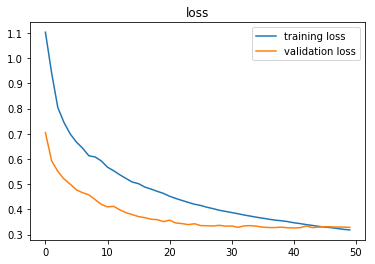

Plotting metrics...


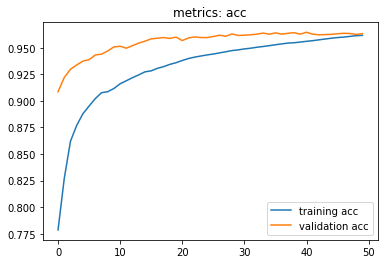

train {'acc': 0.9854364}
test {'acc': 0.9621}

Training student with temperature = 8 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3461932360400535159
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 3839988070609515627
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3452969 , acc = 0.08 
Epoch 1 , step 100 , loss= 1.1334441 , acc = 0.77 
Epoch 1 , step 200 , loss= 0.69382334 , acc = 0.92 
Epoch 1 , step 300 , loss= 0.6901899 , acc = 0.85 
Epoch 1 , step 400 , loss= 0.5836084 , acc = 0.89 
Epoch 1 , step 500 , loss= 0.6198983 , acc = 0.89 
Epoch 1 , step 549 , loss= 0.49762943 val_loss= 0.5678796 , acc = 0.93 val acc = 0.9122 
Epoch 1 finished, loss= 0.93769866 
Epoch 2 , step 50 , loss= 0.56230295 , acc = 0.93 
Epoch 2 , step 15

Epoch 19 , step 549 , loss= 0.13591988 val_loss= 0.28955162 , acc = 1.0 val acc = 0.9612 
Epoch 19 finished, loss= 0.35790122 
Epoch 20 , step 50 , loss= 0.39550468 , acc = 0.94 
Epoch 20 , step 150 , loss= 0.23142786 , acc = 0.93 
Epoch 20 , step 250 , loss= 0.3091422 , acc = 0.95 
Epoch 20 , step 350 , loss= 0.19237697 , acc = 0.97 
Epoch 20 , step 450 , loss= 0.17925465 , acc = 0.98 
Epoch 20 , step 549 , loss= 0.5093817 val_loss= 0.28941387 , acc = 0.95 val acc = 0.9614 
Epoch 20 finished, loss= 0.35536033 
Epoch 21 , step 0 , loss= 0.2337327 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.3701287 , acc = 0.96 
Epoch 21 , step 200 , loss= 0.14421955 , acc = 1.0 
Epoch 21 , step 300 , loss= 0.13994183 , acc = 0.97 
Epoch 21 , step 400 , loss= 0.1955763 , acc = 0.97 
Epoch 21 , step 500 , loss= 0.19334106 , acc = 0.98 
Epoch 21 , step 549 , loss= 0.16389568 val_loss= 0.28669488 , acc = 0.98 val acc = 0.9616 
Epoch 21 finished, loss= 0.3477203 
Epoch 22 , step 50 , loss= 0.14951806 , acc 

Epoch 39 , step 400 , loss= 0.104914725 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.10835448 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.15421088 val_loss= 0.29548597 , acc = 0.98 val acc = 0.9602 
Epoch 39 finished, loss= 0.27205887 
Epoch 40 , step 50 , loss= 0.12381598 , acc = 0.98 
Epoch 40 , step 150 , loss= 0.11612004 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.23490468 , acc = 0.96 
Epoch 40 , step 350 , loss= 0.09136265 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.16978796 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.12956443 val_loss= 0.29074556 , acc = 0.99 val acc = 0.9632 
Epoch 40 finished, loss= 0.26910964 
Epoch 41 , step 0 , loss= 0.17279954 , acc = 0.95 
Epoch 41 , step 100 , loss= 0.22023983 , acc = 0.97 
Epoch 41 , step 200 , loss= 0.10663141 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.23976928 , acc = 0.96 
Epoch 41 , step 400 , loss= 0.12068749 , acc = 0.97 
Epoch 41 , step 500 , loss= 0.15793279 , acc = 0.98 
Epoch 41 , step 549 , loss= 0.13841474 val_loss= 0.29312474 

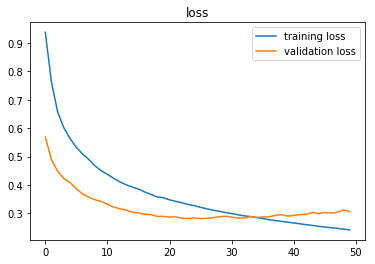

Plotting metrics...


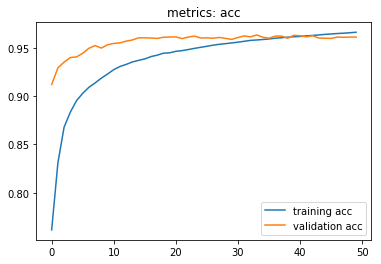

train {'acc': 0.9886909}
test {'acc': 0.9604}

Training student with temperature = 8 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4980877885155457102
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 15214133839249751822
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3600984 , acc = 0.08 
Epoch 1 , step 100 , loss= 0.7642188 , acc = 0.81 
Epoch 1 , step 200 , loss= 0.4829738 , acc = 0.86 
Epoch 1 , step 300 , loss= 0.3805323 , acc = 0.89 
Epoch 1 , step 400 , loss= 0.3443075 , acc = 0.89 
Epoch 1 , step 500 , loss= 0.30977988 , acc = 0.87 
Epoch 1 , step 549 , loss= 0.2689675 val_loss= 0.28362414 , acc = 0.88 val acc = 0.9228 
Epoch 1 finished, loss= 0.701554 
Epoch 2 , step 50 , loss= 0.3055458 , acc = 0.91 
Epoch 2 , step 150 , 

Epoch 19 , step 500 , loss= 0.06396712 , acc = 0.97 
Epoch 19 , step 549 , loss= 0.09184161 val_loss= 0.10306415 , acc = 0.98 val acc = 0.968 
Epoch 19 finished, loss= 0.15024033 
Epoch 20 , step 50 , loss= 0.06152788 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.031126142 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.057087965 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.0403245 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.04896 , acc = 0.98 
Epoch 20 , step 549 , loss= 0.046325155 val_loss= 0.10190507 , acc = 0.98 val acc = 0.9686 
Epoch 20 finished, loss= 0.14550117 
Epoch 21 , step 0 , loss= 0.07094094 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.029373663 , acc = 0.99 
Epoch 21 , step 200 , loss= 0.08440712 , acc = 0.98 
Epoch 21 , step 300 , loss= 0.18648762 , acc = 0.95 
Epoch 21 , step 400 , loss= 0.04295801 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.05701827 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.043944664 val_loss= 0.10614396 , acc = 0.99 val acc = 0.9684 
Epoch 21 finished, l

Epoch 39 , step 200 , loss= 0.014028571 , acc = 1.0 
Epoch 39 , step 300 , loss= 0.020971386 , acc = 1.0 
Epoch 39 , step 400 , loss= 0.021636305 , acc = 1.0 
Epoch 39 , step 500 , loss= 0.039086886 , acc = 0.99 
Epoch 39 , step 549 , loss= 0.008839449 val_loss= 0.11599745 , acc = 1.0 val acc = 0.969 
Epoch 39 finished, loss= 0.10000323 
Epoch 40 , step 50 , loss= 0.054114528 , acc = 0.98 
Epoch 40 , step 150 , loss= 0.055951882 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.039948843 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.082346804 , acc = 0.97 
Epoch 40 , step 450 , loss= 0.033087462 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.012834642 val_loss= 0.11978291 , acc = 1.0 val acc = 0.9662 
Epoch 40 finished, loss= 0.09876578 
Epoch 41 , step 0 , loss= 0.016834278 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.016451089 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.012943565 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.0142412 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.020859053 , acc = 0.99 
E

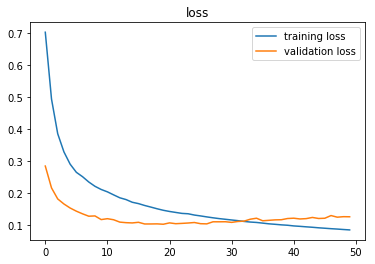

Plotting metrics...


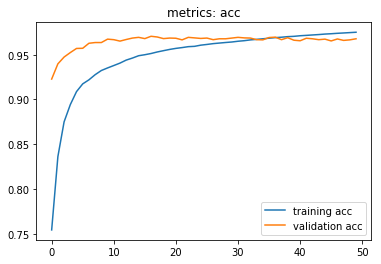

train {'acc': 0.99445456}
test {'acc': 0.9651}

Training student with temperature = 16 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11569249154851014345
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 18267133048145330789
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3020048 , acc = 0.09 
Epoch 1 , step 100 , loss= 2.0627103 , acc = 0.48 
Epoch 1 , step 200 , loss= 1.5456398 , acc = 0.7 
Epoch 1 , step 300 , loss= 1.2001208 , acc = 0.73 
Epoch 1 , step 400 , loss= 1.119973 , acc = 0.87 
Epoch 1 , step 500 , loss= 1.2430997 , acc = 0.84 
Epoch 1 , step 549 , loss= 1.0078149 val_loss= 1.0734571 , acc = 0.86 val acc = 0.8554 
Epoch 1 finished, loss= 1.4973376 
Epoch 2 , step 50 , loss= 1.0217417 , acc = 0.88 
Epoch 2 , step 150 , 

Epoch 20 , step 50 , loss= 0.8743163 , acc = 0.95 
Epoch 20 , step 150 , loss= 0.78365344 , acc = 0.94 
Epoch 20 , step 250 , loss= 0.8175975 , acc = 0.98 
Epoch 20 , step 350 , loss= 0.88093 , acc = 0.96 
Epoch 20 , step 450 , loss= 0.84332025 , acc = 0.94 
Epoch 20 , step 549 , loss= 0.952464 val_loss= 0.84408456 , acc = 0.98 val acc = 0.9516 
Epoch 20 finished, loss= 0.94475335 
Epoch 21 , step 0 , loss= 0.6429496 , acc = 1.0 
Epoch 21 , step 100 , loss= 0.9024901 , acc = 0.91 
Epoch 21 , step 200 , loss= 0.7970564 , acc = 0.93 
Epoch 21 , step 300 , loss= 0.8306701 , acc = 0.97 
Epoch 21 , step 400 , loss= 0.76430404 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.9321232 , acc = 0.95 
Epoch 21 , step 549 , loss= 0.8726132 val_loss= 0.84277254 , acc = 0.94 val acc = 0.9538 
Epoch 21 finished, loss= 0.93839526 
Epoch 22 , step 50 , loss= 1.057948 , acc = 0.95 
Epoch 22 , step 150 , loss= 0.8712351 , acc = 0.96 
Epoch 22 , step 250 , loss= 0.866251 , acc = 0.89 
Epoch 22 , step 350 , los

Epoch 40 , step 150 , loss= 0.82751197 , acc = 0.94 
Epoch 40 , step 250 , loss= 0.8112599 , acc = 0.96 
Epoch 40 , step 350 , loss= 0.8283725 , acc = 0.97 
Epoch 40 , step 450 , loss= 0.888394 , acc = 0.97 
Epoch 40 , step 549 , loss= 0.67255217 val_loss= 0.82703596 , acc = 0.98 val acc = 0.9618 
Epoch 40 finished, loss= 0.8933744 
Epoch 41 , step 0 , loss= 0.8591679 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.73080534 , acc = 0.96 
Epoch 41 , step 200 , loss= 0.869719 , acc = 0.95 
Epoch 41 , step 300 , loss= 0.7331233 , acc = 0.97 
Epoch 41 , step 400 , loss= 0.83981043 , acc = 0.96 
Epoch 41 , step 500 , loss= 0.8274956 , acc = 0.94 
Epoch 41 , step 549 , loss= 0.8208055 val_loss= 0.8264586 , acc = 0.97 val acc = 0.96 
Epoch 41 finished, loss= 0.8912295 
Epoch 42 , step 50 , loss= 0.83226913 , acc = 0.96 
Epoch 42 , step 150 , loss= 0.77734184 , acc = 0.98 
Epoch 42 , step 250 , loss= 0.9240714 , acc = 0.97 
Epoch 42 , step 350 , loss= 0.802854 , acc = 0.95 
Epoch 42 , step 450 , l

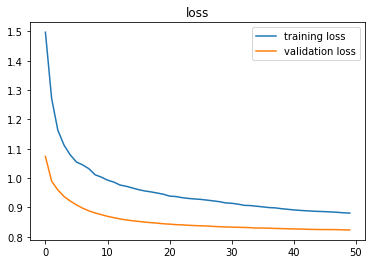

Plotting metrics...


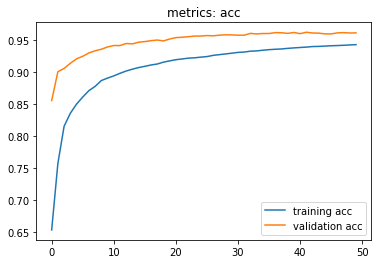

train {'acc': 0.9652182}
test {'acc': 0.9567}

Training student with temperature = 16 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10232448457507996549
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 309651628917644420
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.282072 , acc = 0.17 
Epoch 1 , step 100 , loss= 1.7234924 , acc = 0.82 
Epoch 1 , step 200 , loss= 1.539986 , acc = 0.85 
Epoch 1 , step 300 , loss= 1.4427669 , acc = 0.88 
Epoch 1 , step 400 , loss= 1.1931208 , acc = 0.96 
Epoch 1 , step 500 , loss= 1.203371 , acc = 0.92 
Epoch 1 , step 549 , loss= 1.20603 val_loss= 1.1945735 , acc = 0.88 val acc = 0.9054 
Epoch 1 finished, loss= 1.512977 
Epoch 2 , step 50 , loss= 1.2847985 , acc = 0.87 
Epoch 2 , step 150 , loss=

Epoch 20 , step 50 , loss= 0.92668164 , acc = 0.94 
Epoch 20 , step 150 , loss= 0.8668649 , acc = 0.95 
Epoch 20 , step 250 , loss= 0.73790884 , acc = 0.96 
Epoch 20 , step 350 , loss= 0.9021319 , acc = 0.92 
Epoch 20 , step 450 , loss= 0.8688 , acc = 0.96 
Epoch 20 , step 549 , loss= 0.6916666 val_loss= 0.80093265 , acc = 0.95 val acc = 0.956 
Epoch 20 finished, loss= 0.93949056 
Epoch 21 , step 0 , loss= 0.5412104 , acc = 0.98 
Epoch 21 , step 100 , loss= 0.67730176 , acc = 0.98 
Epoch 21 , step 200 , loss= 0.7371421 , acc = 0.96 
Epoch 21 , step 300 , loss= 0.8761873 , acc = 0.96 
Epoch 21 , step 400 , loss= 0.69618833 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.78854626 , acc = 0.98 
Epoch 21 , step 549 , loss= 0.7007886 val_loss= 0.79433006 , acc = 0.96 val acc = 0.9538 
Epoch 21 finished, loss= 0.9281105 
Epoch 22 , step 50 , loss= 0.7387822 , acc = 0.97 
Epoch 22 , step 150 , loss= 0.8108696 , acc = 0.96 
Epoch 22 , step 250 , loss= 0.83418155 , acc = 0.96 
Epoch 22 , step 350 ,

Epoch 40 , step 50 , loss= 0.6492743 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.679108 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.6045827 , acc = 0.98 
Epoch 40 , step 350 , loss= 0.75107944 , acc = 0.96 
Epoch 40 , step 450 , loss= 0.72337335 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.8592726 val_loss= 0.7598357 , acc = 0.93 val acc = 0.9596 
Epoch 40 finished, loss= 0.8388889 
Epoch 41 , step 0 , loss= 0.80249727 , acc = 0.97 
Epoch 41 , step 100 , loss= 0.67233807 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.7107663 , acc = 0.97 
Epoch 41 , step 300 , loss= 0.77966535 , acc = 0.96 
Epoch 41 , step 400 , loss= 0.8291581 , acc = 0.96 
Epoch 41 , step 500 , loss= 0.7672014 , acc = 0.98 
Epoch 41 , step 549 , loss= 0.6270888 val_loss= 0.7570498 , acc = 0.97 val acc = 0.962 
Epoch 41 finished, loss= 0.836329 
Epoch 42 , step 50 , loss= 0.6641295 , acc = 0.99 
Epoch 42 , step 150 , loss= 0.6472548 , acc = 0.98 
Epoch 42 , step 250 , loss= 0.6319896 , acc = 0.99 
Epoch 42 , step 350 , loss

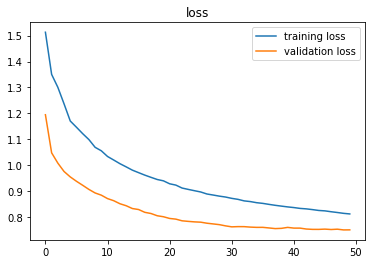

Plotting metrics...


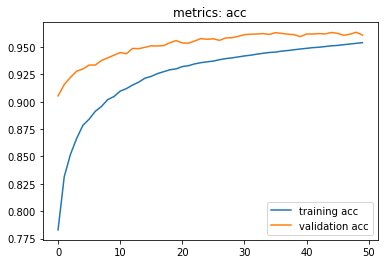

train {'acc': 0.98138183}
test {'acc': 0.9606}

Training student with temperature = 16 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6350883181048568237
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 15231514845227877666
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2909455 , acc = 0.17 
Epoch 1 , step 100 , loss= 1.4330928 , acc = 0.8 
Epoch 1 , step 200 , loss= 1.2100809 , acc = 0.87 
Epoch 1 , step 300 , loss= 1.1207259 , acc = 0.91 
Epoch 1 , step 400 , loss= 1.2238554 , acc = 0.86 
Epoch 1 , step 500 , loss= 0.9669906 , acc = 0.95 
Epoch 1 , step 549 , loss= 1.055667 val_loss= 1.0316498 , acc = 0.88 val acc = 0.914 
Epoch 1 finished, loss= 1.3287655 
Epoch 2 , step 50 , loss= 0.9585219 , acc = 0.95 
Epoch 2 , step 150 , lo

Epoch 20 , step 50 , loss= 0.5913552 , acc = 0.99 
Epoch 20 , step 150 , loss= 0.54854 , acc = 0.96 
Epoch 20 , step 250 , loss= 0.64098686 , acc = 0.95 
Epoch 20 , step 350 , loss= 0.6998642 , acc = 0.93 
Epoch 20 , step 450 , loss= 0.54605436 , acc = 0.96 
Epoch 20 , step 549 , loss= 0.6397128 val_loss= 0.65400106 , acc = 0.96 val acc = 0.961 
Epoch 20 finished, loss= 0.750597 
Epoch 21 , step 0 , loss= 0.5729357 , acc = 0.96 
Epoch 21 , step 100 , loss= 0.72977877 , acc = 0.98 
Epoch 21 , step 200 , loss= 0.528507 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.47931215 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.53454256 , acc = 0.99 
Epoch 21 , step 500 , loss= 0.9344385 , acc = 0.94 
Epoch 21 , step 549 , loss= 0.8668213 val_loss= 0.64890707 , acc = 0.94 val acc = 0.9618 
Epoch 21 finished, loss= 0.7461602 
Epoch 22 , step 50 , loss= 0.55947566 , acc = 0.99 
Epoch 22 , step 150 , loss= 0.86757976 , acc = 0.95 
Epoch 22 , step 250 , loss= 0.49438107 , acc = 0.98 
Epoch 22 , step 350 ,

Epoch 40 , step 50 , loss= 0.45712408 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.53278375 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.51908 , acc = 0.97 
Epoch 40 , step 350 , loss= 0.38898474 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.52924746 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.3898465 val_loss= 0.62638813 , acc = 0.99 val acc = 0.9634 
Epoch 40 finished, loss= 0.652266 
Epoch 41 , step 0 , loss= 0.4585783 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.43936747 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.5254348 , acc = 0.98 
Epoch 41 , step 300 , loss= 0.5171327 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.57953024 , acc = 0.98 
Epoch 41 , step 500 , loss= 0.48083925 , acc = 0.98 
Epoch 41 , step 549 , loss= 0.55542785 val_loss= 0.62677634 , acc = 0.97 val acc = 0.9632 
Epoch 41 finished, loss= 0.64848495 
Epoch 42 , step 50 , loss= 0.5423983 , acc = 0.97 
Epoch 42 , step 150 , loss= 0.57868284 , acc = 0.97 
Epoch 42 , step 250 , loss= 0.5088469 , acc = 0.99 
Epoch 42 , step 350 ,

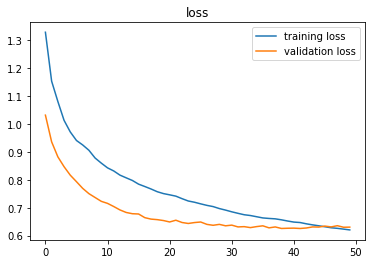

Plotting metrics...


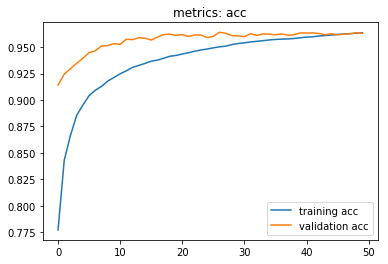

train {'acc': 0.9845273}
test {'acc': 0.9629}

Training student with temperature = 16 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8819298323720806999
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 16635567536825037021
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3418145 , acc = 0.04 
Epoch 1 , step 100 , loss= 1.1369843 , acc = 0.74 
Epoch 1 , step 200 , loss= 0.87185764 , acc = 0.88 
Epoch 1 , step 300 , loss= 0.61855114 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.69452715 , acc = 0.92 
Epoch 1 , step 500 , loss= 0.6737673 , acc = 0.92 
Epoch 1 , step 549 , loss= 0.60830384 val_loss= 0.6831135 , acc = 0.95 val acc = 0.9208 
Epoch 1 finished, loss= 0.9922581 
Epoch 2 , step 50 , loss= 0.6845585 , acc = 0.9 
Epoch 2 , step 1

Epoch 20 , step 50 , loss= 0.3419214 , acc = 0.99 
Epoch 20 , step 150 , loss= 0.41486523 , acc = 0.97 
Epoch 20 , step 250 , loss= 0.5714105 , acc = 0.98 
Epoch 20 , step 350 , loss= 0.37679034 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.48897362 , acc = 0.96 
Epoch 20 , step 549 , loss= 0.33522573 val_loss= 0.46575886 , acc = 0.99 val acc = 0.962 
Epoch 20 finished, loss= 0.5083881 
Epoch 21 , step 0 , loss= 0.36342296 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.38231003 , acc = 0.99 
Epoch 21 , step 200 , loss= 0.32985905 , acc = 0.96 
Epoch 21 , step 300 , loss= 0.38195646 , acc = 0.99 
Epoch 21 , step 400 , loss= 0.403951 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.5717454 , acc = 0.96 
Epoch 21 , step 549 , loss= 0.34088653 val_loss= 0.46215162 , acc = 0.98 val acc = 0.9636 
Epoch 21 finished, loss= 0.50266117 
Epoch 22 , step 50 , loss= 0.38171354 , acc = 0.98 
Epoch 22 , step 150 , loss= 0.45790172 , acc = 0.94 
Epoch 22 , step 250 , loss= 0.30882937 , acc = 0.98 
Epoch 22 , st

Epoch 40 , step 50 , loss= 0.26831216 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.24564886 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.26945278 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.28088528 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.26887816 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.24402505 val_loss= 0.46280676 , acc = 0.99 val acc = 0.9608 
Epoch 40 finished, loss= 0.42657635 
Epoch 41 , step 0 , loss= 0.29198125 , acc = 0.98 
Epoch 41 , step 100 , loss= 0.39753357 , acc = 0.98 
Epoch 41 , step 200 , loss= 0.27205396 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.28289303 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.2886638 , acc = 0.98 
Epoch 41 , step 500 , loss= 0.30251795 , acc = 0.99 
Epoch 41 , step 549 , loss= 0.41341576 val_loss= 0.45886755 , acc = 0.98 val acc = 0.9642 
Epoch 41 finished, loss= 0.4238161 
Epoch 42 , step 50 , loss= 0.31066704 , acc = 0.99 
Epoch 42 , step 150 , loss= 0.31795982 , acc = 0.98 
Epoch 42 , step 250 , loss= 0.39599037 , acc = 0.96 
Epoch 42 , 

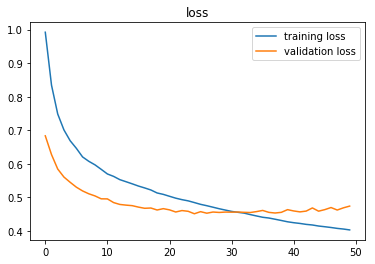

Plotting metrics...


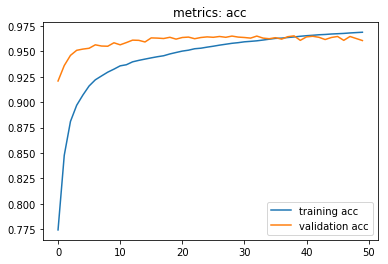

train {'acc': 0.98623633}
test {'acc': 0.9603}

Training student with temperature = 16 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8053911940572491019
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 7933190563568053951
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.261597 , acc = 0.17 
Epoch 1 , step 100 , loss= 0.6411989 , acc = 0.85 
Epoch 1 , step 200 , loss= 0.4674728 , acc = 0.87 
Epoch 1 , step 300 , loss= 0.5081122 , acc = 0.85 
Epoch 1 , step 400 , loss= 0.47743103 , acc = 0.88 
Epoch 1 , step 500 , loss= 0.3082914 , acc = 0.91 
Epoch 1 , step 549 , loss= 0.30194435 val_loss= 0.29054573 , acc = 0.9 val acc = 0.9232 
Epoch 1 finished, loss= 0.70943534 
Epoch 2 , step 50 , loss= 0.3267367 , acc = 0.9 
Epoch 2 , step 150 ,

Epoch 19 , step 500 , loss= 0.028737333 , acc = 1.0 
Epoch 19 , step 549 , loss= 0.028053997 val_loss= 0.09954297 , acc = 1.0 val acc = 0.9698 
Epoch 19 finished, loss= 0.15233532 
Epoch 20 , step 50 , loss= 0.043651864 , acc = 0.99 
Epoch 20 , step 150 , loss= 0.096216895 , acc = 0.97 
Epoch 20 , step 250 , loss= 0.021837505 , acc = 1.0 
Epoch 20 , step 350 , loss= 0.03739527 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.058380283 , acc = 0.98 
Epoch 20 , step 549 , loss= 0.0377678 val_loss= 0.09717662 , acc = 0.99 val acc = 0.97 
Epoch 20 finished, loss= 0.14757562 
Epoch 21 , step 0 , loss= 0.0692637 , acc = 0.98 
Epoch 21 , step 100 , loss= 0.0547406 , acc = 0.98 
Epoch 21 , step 200 , loss= 0.033560082 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.090322606 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.067907415 , acc = 0.97 
Epoch 21 , step 500 , loss= 0.069337755 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.013801621 val_loss= 0.09787273 , acc = 1.0 val acc = 0.9706 
Epoch 21 finished,

Epoch 39 , step 200 , loss= 0.004869211 , acc = 1.0 
Epoch 39 , step 300 , loss= 0.043860424 , acc = 0.99 
Epoch 39 , step 400 , loss= 0.042033263 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.013466933 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.008073124 val_loss= 0.11643043 , acc = 1.0 val acc = 0.9686 
Epoch 39 finished, loss= 0.0950707 
Epoch 40 , step 50 , loss= 0.016051149 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.0108067775 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.037655223 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.018666457 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.035505626 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.019282922 val_loss= 0.11217323 , acc = 1.0 val acc = 0.9706 
Epoch 40 finished, loss= 0.09340741 
Epoch 41 , step 0 , loss= 0.0128794955 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.020621732 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.045771934 , acc = 0.98 
Epoch 41 , step 300 , loss= 0.0378718 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.043814495 , acc = 0.9

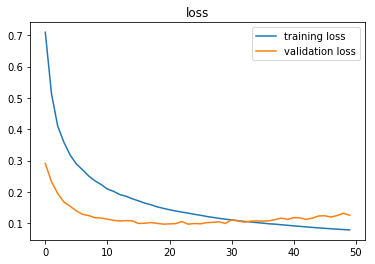

Plotting metrics...


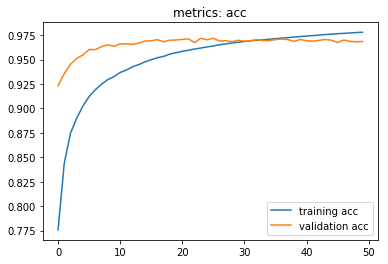

train {'acc': 0.9966182}
test {'acc': 0.9672}

Training student with temperature = 32 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 817113652701046146
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 10597938783059514918
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3014474 , acc = 0.09 
Epoch 1 , step 100 , loss= 2.1833663 , acc = 0.39 
Epoch 1 , step 200 , loss= 1.9545995 , acc = 0.64 
Epoch 1 , step 300 , loss= 1.9102997 , acc = 0.73 
Epoch 1 , step 400 , loss= 1.8411806 , acc = 0.76 
Epoch 1 , step 500 , loss= 1.812128 , acc = 0.74 
Epoch 1 , step 549 , loss= 1.7725623 val_loss= 1.7867829 , acc = 0.88 val acc = 0.7922 
Epoch 1 finished, loss= 1.9679404 
Epoch 2 , step 50 , loss= 1.744141 , acc = 0.77 
Epoch 2 , step 150 , los

Epoch 20 , step 50 , loss= 1.5738244 , acc = 0.97 
Epoch 20 , step 150 , loss= 1.6689847 , acc = 0.92 
Epoch 20 , step 250 , loss= 1.6821542 , acc = 0.96 
Epoch 20 , step 350 , loss= 1.639841 , acc = 0.93 
Epoch 20 , step 450 , loss= 1.7412289 , acc = 0.91 
Epoch 20 , step 549 , loss= 1.6953948 val_loss= 1.6598922 , acc = 0.94 val acc = 0.9386 
Epoch 20 finished, loss= 1.7115563 
Epoch 21 , step 0 , loss= 1.6232532 , acc = 0.95 
Epoch 21 , step 100 , loss= 1.7151344 , acc = 0.93 
Epoch 21 , step 200 , loss= 1.6076816 , acc = 0.93 
Epoch 21 , step 300 , loss= 1.7329608 , acc = 0.93 
Epoch 21 , step 400 , loss= 1.7326487 , acc = 0.94 
Epoch 21 , step 500 , loss= 1.5267253 , acc = 0.97 
Epoch 21 , step 549 , loss= 1.7006291 val_loss= 1.659309 , acc = 0.96 val acc = 0.9416 
Epoch 21 finished, loss= 1.7090609 
Epoch 22 , step 50 , loss= 1.555868 , acc = 0.97 
Epoch 22 , step 150 , loss= 1.6797075 , acc = 0.96 
Epoch 22 , step 250 , loss= 1.6074667 , acc = 0.94 
Epoch 22 , step 350 , loss= 1

Epoch 40 , step 150 , loss= 1.7416474 , acc = 0.97 
Epoch 40 , step 250 , loss= 1.6291393 , acc = 0.95 
Epoch 40 , step 350 , loss= 1.7430358 , acc = 0.92 
Epoch 40 , step 450 , loss= 1.5591847 , acc = 0.98 
Epoch 40 , step 549 , loss= 1.6944587 val_loss= 1.650866 , acc = 0.97 val acc = 0.9512 
Epoch 40 finished, loss= 1.6905189 
Epoch 41 , step 0 , loss= 1.6672521 , acc = 0.94 
Epoch 41 , step 100 , loss= 1.6142048 , acc = 0.96 
Epoch 41 , step 200 , loss= 1.5886104 , acc = 0.97 
Epoch 41 , step 300 , loss= 1.6994736 , acc = 0.93 
Epoch 41 , step 400 , loss= 1.6944382 , acc = 0.97 
Epoch 41 , step 500 , loss= 1.7455226 , acc = 0.92 
Epoch 41 , step 549 , loss= 1.6226552 val_loss= 1.6508588 , acc = 0.97 val acc = 0.9494 
Epoch 41 finished, loss= 1.6897643 
Epoch 42 , step 50 , loss= 1.721763 , acc = 0.98 
Epoch 42 , step 150 , loss= 1.6685226 , acc = 0.95 
Epoch 42 , step 250 , loss= 1.8261276 , acc = 0.93 
Epoch 42 , step 350 , loss= 1.6408206 , acc = 0.96 
Epoch 42 , step 450 , loss=

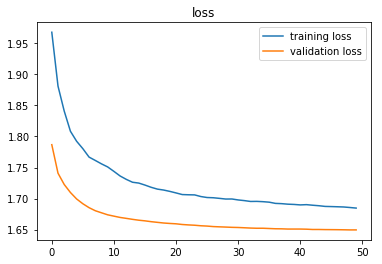

Plotting metrics...


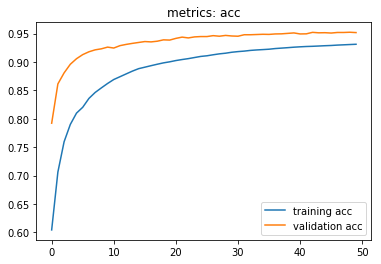

train {'acc': 0.9522727}
test {'acc': 0.9448}

Training student with temperature = 32 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13239523181155314339
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 9747770096277065404
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2923603 , acc = 0.12 
Epoch 1 , step 100 , loss= 1.8666428 , acc = 0.81 
Epoch 1 , step 200 , loss= 1.7837439 , acc = 0.84 
Epoch 1 , step 300 , loss= 1.6785702 , acc = 0.94 
Epoch 1 , step 400 , loss= 1.7215965 , acc = 0.85 
Epoch 1 , step 500 , loss= 1.6682969 , acc = 0.88 
Epoch 1 , step 549 , loss= 1.702624 val_loss= 1.6612073 , acc = 0.88 val acc = 0.9128 
Epoch 1 finished, loss= 1.8162621 
Epoch 2 , step 50 , loss= 1.6178916 , acc = 0.92 
Epoch 2 , step 150 ,

Epoch 20 , step 50 , loss= 1.3867652 , acc = 0.92 
Epoch 20 , step 150 , loss= 1.4762866 , acc = 0.94 
Epoch 20 , step 250 , loss= 1.3704963 , acc = 0.95 
Epoch 20 , step 350 , loss= 1.4831536 , acc = 0.93 
Epoch 20 , step 450 , loss= 1.3626888 , acc = 0.98 
Epoch 20 , step 549 , loss= 1.3429515 val_loss= 1.4261484 , acc = 0.97 val acc = 0.9532 
Epoch 20 finished, loss= 1.4970354 
Epoch 21 , step 0 , loss= 1.4954904 , acc = 0.96 
Epoch 21 , step 100 , loss= 1.4933575 , acc = 0.95 
Epoch 21 , step 200 , loss= 1.5243623 , acc = 0.95 
Epoch 21 , step 300 , loss= 1.3402576 , acc = 0.95 
Epoch 21 , step 400 , loss= 1.4501947 , acc = 0.96 
Epoch 21 , step 500 , loss= 1.5090303 , acc = 0.94 
Epoch 21 , step 549 , loss= 1.3661357 val_loss= 1.4234312 , acc = 0.97 val acc = 0.9514 
Epoch 21 finished, loss= 1.4948426 
Epoch 22 , step 50 , loss= 1.4361328 , acc = 0.97 
Epoch 22 , step 150 , loss= 1.4239923 , acc = 0.97 
Epoch 22 , step 250 , loss= 1.388248 , acc = 0.95 
Epoch 22 , step 350 , loss=

Epoch 40 , step 150 , loss= 1.382329 , acc = 0.99 
Epoch 40 , step 250 , loss= 1.5120785 , acc = 0.94 
Epoch 40 , step 350 , loss= 1.2878706 , acc = 0.98 
Epoch 40 , step 450 , loss= 1.3188016 , acc = 0.99 
Epoch 40 , step 549 , loss= 1.4151169 val_loss= 1.4002441 , acc = 0.97 val acc = 0.9528 
Epoch 40 finished, loss= 1.4355179 
Epoch 41 , step 0 , loss= 1.3158236 , acc = 0.99 
Epoch 41 , step 100 , loss= 1.3133042 , acc = 1.0 
Epoch 41 , step 200 , loss= 1.3974168 , acc = 0.97 
Epoch 41 , step 300 , loss= 1.3626442 , acc = 0.95 
Epoch 41 , step 400 , loss= 1.3495432 , acc = 0.96 
Epoch 41 , step 500 , loss= 1.4026632 , acc = 0.96 
Epoch 41 , step 549 , loss= 1.261164 val_loss= 1.3974115 , acc = 0.99 val acc = 0.951 
Epoch 41 finished, loss= 1.4330982 
Epoch 42 , step 50 , loss= 1.3175504 , acc = 0.97 
Epoch 42 , step 150 , loss= 1.4641491 , acc = 0.95 
Epoch 42 , step 250 , loss= 1.351648 , acc = 0.97 
Epoch 42 , step 350 , loss= 1.2835597 , acc = 0.97 
Epoch 42 , step 450 , loss= 1.

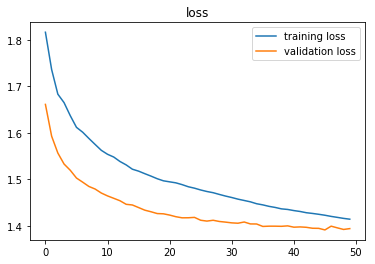

Plotting metrics...


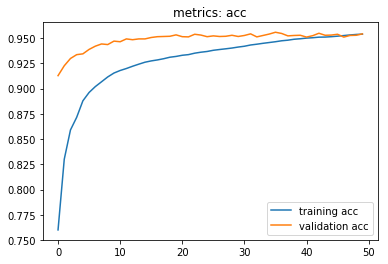

train {'acc': 0.97736365}
test {'acc': 0.9557}

Training student with temperature = 32 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15147721279885586948
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 10585820773940014926
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3055925 , acc = 0.19 
Epoch 1 , step 100 , loss= 1.468493 , acc = 0.81 
Epoch 1 , step 200 , loss= 1.3569103 , acc = 0.86 
Epoch 1 , step 300 , loss= 1.2169948 , acc = 0.91 
Epoch 1 , step 400 , loss= 1.2656028 , acc = 0.92 
Epoch 1 , step 500 , loss= 1.2359259 , acc = 0.9 
Epoch 1 , step 549 , loss= 1.2758635 val_loss= 1.2207699 , acc = 0.94 val acc = 0.9206 
Epoch 1 finished, loss= 1.4464833 
Epoch 2 , step 50 , loss= 1.1999683 , acc = 0.95 
Epoch 2 , step 150 , 

Epoch 20 , step 150 , loss= 1.0061026 , acc = 0.97 
Epoch 20 , step 250 , loss= 1.0331696 , acc = 0.98 
Epoch 20 , step 350 , loss= 0.9550117 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.9945714 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.97670704 val_loss= 1.0440029 , acc = 0.97 val acc = 0.9594 
Epoch 20 finished, loss= 1.0965358 
Epoch 21 , step 0 , loss= 0.9377011 , acc = 0.99 
Epoch 21 , step 100 , loss= 1.0831282 , acc = 0.96 
Epoch 21 , step 200 , loss= 1.0243034 , acc = 0.97 
Epoch 21 , step 300 , loss= 1.0339937 , acc = 0.97 
Epoch 21 , step 400 , loss= 1.0091298 , acc = 0.97 
Epoch 21 , step 500 , loss= 1.024337 , acc = 0.95 
Epoch 21 , step 549 , loss= 0.9302723 val_loss= 1.0380875 , acc = 0.98 val acc = 0.9602 
Epoch 21 finished, loss= 1.0919163 
Epoch 22 , step 50 , loss= 0.97851145 , acc = 0.97 
Epoch 22 , step 150 , loss= 0.954445 , acc = 0.99 
Epoch 22 , step 250 , loss= 1.0551784 , acc = 0.96 
Epoch 22 , step 350 , loss= 1.0942816 , acc = 0.92 
Epoch 22 , step 450 , los

Epoch 40 , step 250 , loss= 0.87432075 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.85495543 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.9451832 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.93565905 val_loss= 1.0346786 , acc = 0.98 val acc = 0.9602 
Epoch 40 finished, loss= 1.0261219 
Epoch 41 , step 0 , loss= 0.91770536 , acc = 0.98 
Epoch 41 , step 100 , loss= 0.8928519 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.9049276 , acc = 0.97 
Epoch 41 , step 300 , loss= 0.9285514 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.89564264 , acc = 0.99 
Epoch 41 , step 500 , loss= 0.94508165 , acc = 0.99 
Epoch 41 , step 549 , loss= 0.87703305 val_loss= 1.037486 , acc = 0.99 val acc = 0.9594 
Epoch 41 finished, loss= 1.0230469 
Epoch 42 , step 50 , loss= 0.924675 , acc = 0.99 
Epoch 42 , step 150 , loss= 0.86477387 , acc = 1.0 
Epoch 42 , step 250 , loss= 0.8777206 , acc = 0.98 
Epoch 42 , step 350 , loss= 0.86904734 , acc = 0.98 
Epoch 42 , step 450 , loss= 0.8575949 , acc = 1.0 
Epoch 42 , step 549 ,

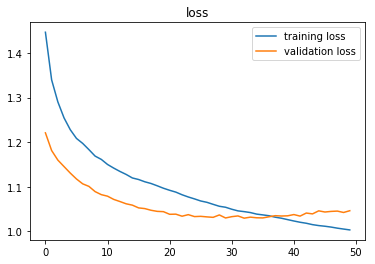

Plotting metrics...


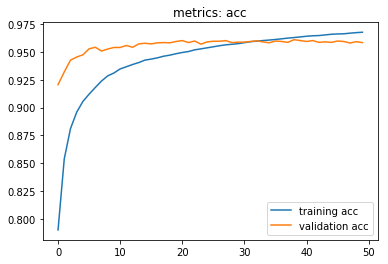

train {'acc': 0.9859273}
test {'acc': 0.9612}

Training student with temperature = 32 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6366206077054354342
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 1236727116827163589
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2973065 , acc = 0.11 
Epoch 1 , step 100 , loss= 1.148192 , acc = 0.82 
Epoch 1 , step 200 , loss= 0.85610044 , acc = 0.91 
Epoch 1 , step 300 , loss= 0.77666974 , acc = 0.92 
Epoch 1 , step 400 , loss= 0.7765689 , acc = 0.93 
Epoch 1 , step 500 , loss= 0.83491826 , acc = 0.86 
Epoch 1 , step 549 , loss= 0.85142946 val_loss= 0.7570683 , acc = 0.86 val acc = 0.9196 
Epoch 1 finished, loss= 1.0773122 
Epoch 2 , step 50 , loss= 0.790245 , acc = 0.91 
Epoch 2 , step 150

Epoch 20 , step 50 , loss= 0.5313445 , acc = 0.99 
Epoch 20 , step 150 , loss= 0.5116683 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.51572275 , acc = 0.98 
Epoch 20 , step 350 , loss= 0.55740136 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.5544353 , acc = 0.96 
Epoch 20 , step 549 , loss= 0.59023345 val_loss= 0.61703324 , acc = 0.97 val acc = 0.9618 
Epoch 20 finished, loss= 0.6397976 
Epoch 21 , step 0 , loss= 0.5302191 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.6472064 , acc = 0.99 
Epoch 21 , step 200 , loss= 0.5441731 , acc = 0.96 
Epoch 21 , step 300 , loss= 0.52412707 , acc = 0.99 
Epoch 21 , step 400 , loss= 0.6099497 , acc = 0.99 
Epoch 21 , step 500 , loss= 0.5113248 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.6558306 val_loss= 0.6127349 , acc = 0.95 val acc = 0.9656 
Epoch 21 finished, loss= 0.636471 
Epoch 22 , step 50 , loss= 0.52245474 , acc = 0.98 
Epoch 22 , step 150 , loss= 0.57909477 , acc = 0.98 
Epoch 22 , step 250 , loss= 0.5557802 , acc = 0.99 
Epoch 22 , step 350 

Epoch 40 , step 50 , loss= 0.47080365 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.5279517 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.4765199 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.4725062 , acc = 0.97 
Epoch 40 , step 450 , loss= 0.49104404 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.46700546 val_loss= 0.64078486 , acc = 0.99 val acc = 0.9608 
Epoch 40 finished, loss= 0.581612 
Epoch 41 , step 0 , loss= 0.53213954 , acc = 0.96 
Epoch 41 , step 100 , loss= 0.49291983 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.46575004 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.4965882 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.4712365 , acc = 1.0 
Epoch 41 , step 500 , loss= 0.48567188 , acc = 0.98 
Epoch 41 , step 549 , loss= 0.47552577 val_loss= 0.64053696 , acc = 0.97 val acc = 0.962 
Epoch 41 finished, loss= 0.5791721 
Epoch 42 , step 50 , loss= 0.46125174 , acc = 0.99 
Epoch 42 , step 150 , loss= 0.46516064 , acc = 1.0 
Epoch 42 , step 250 , loss= 0.5973427 , acc = 0.98 
Epoch 42 , step 350 ,

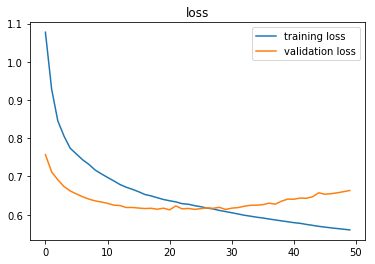

Plotting metrics...


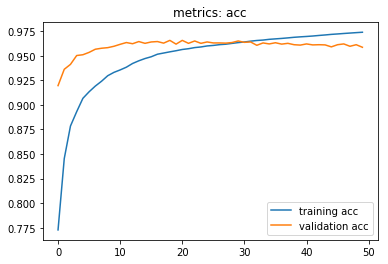

train {'acc': 0.99145454}
test {'acc': 0.9631}

Training student with temperature = 32 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14057441573561132845
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 15890744402990130509
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2307796 , acc = 0.18 
Epoch 1 , step 100 , loss= 0.7321338 , acc = 0.84 
Epoch 1 , step 200 , loss= 0.2697916 , acc = 0.94 
Epoch 1 , step 300 , loss= 0.37614548 , acc = 0.9 
Epoch 1 , step 400 , loss= 0.28484422 , acc = 0.92 
Epoch 1 , step 500 , loss= 0.32788408 , acc = 0.93 
Epoch 1 , step 549 , loss= 0.2850893 val_loss= 0.27575606 , acc = 0.91 val acc = 0.9262 
Epoch 1 finished, loss= 0.64380974 
Epoch 2 , step 50 , loss= 0.23137312 , acc = 0.9 
Epoch 2 , step 

Epoch 19 , step 500 , loss= 0.04081708 , acc = 1.0 
Epoch 19 , step 549 , loss= 0.1446886 val_loss= 0.103285134 , acc = 0.94 val acc = 0.9696 
Epoch 19 finished, loss= 0.1496135 
Epoch 20 , step 50 , loss= 0.045636307 , acc = 0.99 
Epoch 20 , step 150 , loss= 0.08488434 , acc = 0.98 
Epoch 20 , step 250 , loss= 0.12130477 , acc = 0.97 
Epoch 20 , step 350 , loss= 0.03561218 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.03915485 , acc = 0.99 
Epoch 20 , step 549 , loss= 0.023391135 val_loss= 0.10265331 , acc = 1.0 val acc = 0.9688 
Epoch 20 finished, loss= 0.14540045 
Epoch 21 , step 0 , loss= 0.083883025 , acc = 0.98 
Epoch 21 , step 100 , loss= 0.14650649 , acc = 0.97 
Epoch 21 , step 200 , loss= 0.055841528 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.015763748 , acc = 1.0 
Epoch 21 , step 400 , loss= 0.075860865 , acc = 0.97 
Epoch 21 , step 500 , loss= 0.048631053 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.05731979 val_loss= 0.10502307 , acc = 0.99 val acc = 0.9674 
Epoch 21 finished

Epoch 39 , step 200 , loss= 0.025068974 , acc = 1.0 
Epoch 39 , step 300 , loss= 0.027274864 , acc = 0.99 
Epoch 39 , step 400 , loss= 0.011205941 , acc = 1.0 
Epoch 39 , step 500 , loss= 0.014205417 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.015601947 val_loss= 0.11050516 , acc = 1.0 val acc = 0.9676 
Epoch 39 finished, loss= 0.095015645 
Epoch 40 , step 50 , loss= 0.013968073 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.016344875 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.014412319 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.009836986 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.07818573 , acc = 0.97 
Epoch 40 , step 549 , loss= 0.035958014 val_loss= 0.114882655 , acc = 0.99 val acc = 0.9656 
Epoch 40 finished, loss= 0.09347185 
Epoch 41 , step 0 , loss= 0.03537226 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.036143277 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.029302275 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.03459855 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.033393484 , acc = 0.9

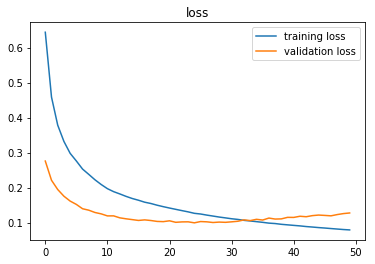

Plotting metrics...


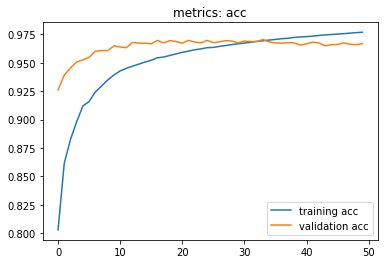

train {'acc': 0.99692726}
test {'acc': 0.9642}

Training student with temperature = 64 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3435475840594384986
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 828451694837944502
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.301909 , acc = 0.19 
Epoch 1 , step 100 , loss= 2.2573967 , acc = 0.42 
Epoch 1 , step 200 , loss= 2.2123706 , acc = 0.53 
Epoch 1 , step 300 , loss= 2.2249339 , acc = 0.65 
Epoch 1 , step 400 , loss= 2.1900148 , acc = 0.83 
Epoch 1 , step 500 , loss= 2.1554842 , acc = 0.86 
Epoch 1 , step 549 , loss= 2.1808386 val_loss= 2.1738212 , acc = 0.65 val acc = 0.7638 
Epoch 1 finished, loss= 2.2175639 
Epoch 2 , step 50 , loss= 2.1709619 , acc = 0.71 
Epoch 2 , step 150 , lo

Epoch 20 , step 150 , loss= 2.126112 , acc = 0.95 
Epoch 20 , step 250 , loss= 2.1416044 , acc = 0.93 
Epoch 20 , step 350 , loss= 2.1190984 , acc = 0.96 
Epoch 20 , step 450 , loss= 2.1497757 , acc = 0.96 
Epoch 20 , step 549 , loss= 2.1384792 val_loss= 2.1332839 , acc = 0.93 val acc = 0.942 
Epoch 20 finished, loss= 2.1456046 
Epoch 21 , step 0 , loss= 2.0996244 , acc = 0.94 
Epoch 21 , step 100 , loss= 2.1190264 , acc = 0.93 
Epoch 21 , step 200 , loss= 2.12624 , acc = 0.94 
Epoch 21 , step 300 , loss= 2.1595476 , acc = 0.95 
Epoch 21 , step 400 , loss= 2.1476977 , acc = 0.91 
Epoch 21 , step 500 , loss= 2.149032 , acc = 0.93 
Epoch 21 , step 549 , loss= 2.129237 val_loss= 2.133081 , acc = 0.95 val acc = 0.9416 
Epoch 21 finished, loss= 2.1449564 
Epoch 22 , step 50 , loss= 2.1227098 , acc = 0.95 
Epoch 22 , step 150 , loss= 2.1380892 , acc = 0.93 
Epoch 22 , step 250 , loss= 2.1418688 , acc = 0.96 
Epoch 22 , step 350 , loss= 2.1001966 , acc = 0.93 
Epoch 22 , step 450 , loss= 2.12

Epoch 40 , step 250 , loss= 2.1361818 , acc = 0.95 
Epoch 40 , step 350 , loss= 2.140584 , acc = 0.96 
Epoch 40 , step 450 , loss= 2.1484077 , acc = 0.97 
Epoch 40 , step 549 , loss= 2.1427581 val_loss= 2.1317618 , acc = 0.93 val acc = 0.9496 
Epoch 40 finished, loss= 2.1408381 
Epoch 41 , step 0 , loss= 2.1377409 , acc = 0.92 
Epoch 41 , step 100 , loss= 2.1515107 , acc = 0.96 
Epoch 41 , step 200 , loss= 2.1631892 , acc = 0.92 
Epoch 41 , step 300 , loss= 2.1505823 , acc = 0.95 
Epoch 41 , step 400 , loss= 2.14441 , acc = 0.93 
Epoch 41 , step 500 , loss= 2.0986638 , acc = 0.94 
Epoch 41 , step 549 , loss= 2.138883 val_loss= 2.1317282 , acc = 0.93 val acc = 0.949 
Epoch 41 finished, loss= 2.1408348 
Epoch 42 , step 50 , loss= 2.1252384 , acc = 0.96 
Epoch 42 , step 150 , loss= 2.1157012 , acc = 0.96 
Epoch 42 , step 250 , loss= 2.1519227 , acc = 0.95 
Epoch 42 , step 350 , loss= 2.1332285 , acc = 0.98 
Epoch 42 , step 450 , loss= 2.130501 , acc = 0.93 
Epoch 42 , step 549 , loss= 2.1

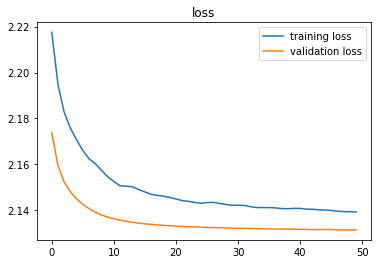

Plotting metrics...


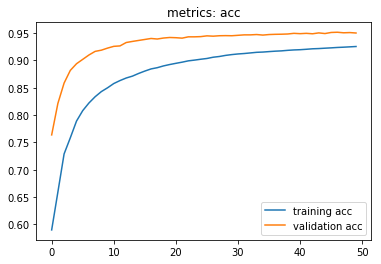

train {'acc': 0.9506182}
test {'acc': 0.9469}

Training student with temperature = 64 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16570996727673352456
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 8975172475140091811
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2883127 , acc = 0.2 
Epoch 1 , step 100 , loss= 1.8566878 , acc = 0.9 
Epoch 1 , step 200 , loss= 1.8216821 , acc = 0.86 
Epoch 1 , step 300 , loss= 1.7812555 , acc = 0.9 
Epoch 1 , step 400 , loss= 1.7811403 , acc = 0.89 
Epoch 1 , step 500 , loss= 1.7829615 , acc = 0.88 
Epoch 1 , step 549 , loss= 1.7719319 val_loss= 1.7745161 , acc = 0.94 val acc = 0.9204 
Epoch 1 finished, loss= 1.8691388 
Epoch 2 , step 50 , loss= 1.7823665 , acc = 0.92 
Epoch 2 , step 150 , l

Epoch 20 , step 50 , loss= 1.6465293 , acc = 1.0 
Epoch 20 , step 150 , loss= 1.6710274 , acc = 0.97 
Epoch 20 , step 250 , loss= 1.6476587 , acc = 0.98 
Epoch 20 , step 350 , loss= 1.6471689 , acc = 0.98 
Epoch 20 , step 450 , loss= 1.6539905 , acc = 0.99 
Epoch 20 , step 549 , loss= 1.6846409 val_loss= 1.6875374 , acc = 0.97 val acc = 0.965 
Epoch 20 finished, loss= 1.7150099 
Epoch 21 , step 0 , loss= 1.6575344 , acc = 0.98 
Epoch 21 , step 100 , loss= 1.6856287 , acc = 0.94 
Epoch 21 , step 200 , loss= 1.6952418 , acc = 0.91 
Epoch 21 , step 300 , loss= 1.6515049 , acc = 0.98 
Epoch 21 , step 400 , loss= 1.6574394 , acc = 0.97 
Epoch 21 , step 500 , loss= 1.6628618 , acc = 0.98 
Epoch 21 , step 549 , loss= 1.7068256 val_loss= 1.6874712 , acc = 0.97 val acc = 0.9644 
Epoch 21 finished, loss= 1.7129074 
Epoch 22 , step 50 , loss= 1.655838 , acc = 0.99 
Epoch 22 , step 150 , loss= 1.6502091 , acc = 0.98 
Epoch 22 , step 250 , loss= 1.6648145 , acc = 0.98 
Epoch 22 , step 350 , loss= 1

Epoch 40 , step 150 , loss= 1.6398033 , acc = 0.98 
Epoch 40 , step 250 , loss= 1.6395999 , acc = 0.99 
Epoch 40 , step 350 , loss= 1.6524826 , acc = 0.98 
Epoch 40 , step 450 , loss= 1.616554 , acc = 1.0 
Epoch 40 , step 549 , loss= 1.6038097 val_loss= 1.6918286 , acc = 1.0 val acc = 0.964 
Epoch 40 finished, loss= 1.6836433 
Epoch 41 , step 0 , loss= 1.6202257 , acc = 0.99 
Epoch 41 , step 100 , loss= 1.6509773 , acc = 1.0 
Epoch 41 , step 200 , loss= 1.6458794 , acc = 0.98 
Epoch 41 , step 300 , loss= 1.6105179 , acc = 1.0 
Epoch 41 , step 400 , loss= 1.6611489 , acc = 0.97 
Epoch 41 , step 500 , loss= 1.6322739 , acc = 1.0 
Epoch 41 , step 549 , loss= 1.6220284 val_loss= 1.6906105 , acc = 0.99 val acc = 0.9636 
Epoch 41 finished, loss= 1.6823605 
Epoch 42 , step 50 , loss= 1.6239843 , acc = 0.98 
Epoch 42 , step 150 , loss= 1.6423426 , acc = 0.99 
Epoch 42 , step 250 , loss= 1.6075166 , acc = 0.98 
Epoch 42 , step 350 , loss= 1.6125588 , acc = 0.99 
Epoch 42 , step 450 , loss= 1.64

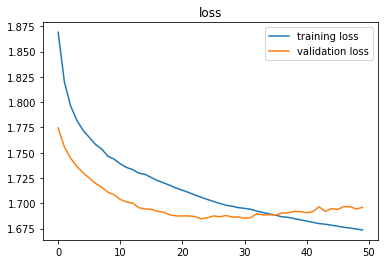

Plotting metrics...


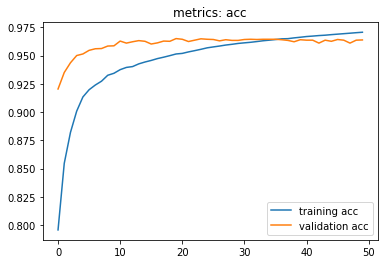

train {'acc': 0.99076366}
test {'acc': 0.9615}

Training student with temperature = 64 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7136375024710688012
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 15508949392327703843
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.302074 , acc = 0.13 
Epoch 1 , step 100 , loss= 1.4915272 , acc = 0.85 
Epoch 1 , step 200 , loss= 1.373169 , acc = 0.88 
Epoch 1 , step 300 , loss= 1.3228955 , acc = 0.9 
Epoch 1 , step 400 , loss= 1.2236325 , acc = 0.94 
Epoch 1 , step 500 , loss= 1.3316729 , acc = 0.91 
Epoch 1 , step 549 , loss= 1.3558503 val_loss= 1.2800627 , acc = 0.9 val acc = 0.9188 
Epoch 1 finished, loss= 1.4858315 
Epoch 2 , step 50 , loss= 1.2751986 , acc = 0.93 
Epoch 2 , step 150 , los

Epoch 20 , step 50 , loss= 1.131625 , acc = 1.0 
Epoch 20 , step 150 , loss= 1.1399071 , acc = 0.99 
Epoch 20 , step 250 , loss= 1.1253546 , acc = 1.0 
Epoch 20 , step 350 , loss= 1.1303927 , acc = 0.98 
Epoch 20 , step 450 , loss= 1.1179476 , acc = 0.99 
Epoch 20 , step 549 , loss= 1.1856532 val_loss= 1.1808678 , acc = 0.96 val acc = 0.9646 
Epoch 20 finished, loss= 1.198862 
Epoch 21 , step 0 , loss= 1.1655282 , acc = 0.95 
Epoch 21 , step 100 , loss= 1.1673031 , acc = 0.98 
Epoch 21 , step 200 , loss= 1.1359946 , acc = 0.99 
Epoch 21 , step 300 , loss= 1.1563113 , acc = 0.98 
Epoch 21 , step 400 , loss= 1.173383 , acc = 0.98 
Epoch 21 , step 500 , loss= 1.1362838 , acc = 0.99 
Epoch 21 , step 549 , loss= 1.1390378 val_loss= 1.1790181 , acc = 0.97 val acc = 0.9674 
Epoch 21 finished, loss= 1.1965392 
Epoch 22 , step 50 , loss= 1.1347653 , acc = 0.98 
Epoch 22 , step 150 , loss= 1.2172143 , acc = 0.95 
Epoch 22 , step 250 , loss= 1.1285621 , acc = 0.99 
Epoch 22 , step 350 , loss= 1.1

Epoch 40 , step 250 , loss= 1.1081975 , acc = 1.0 
Epoch 40 , step 350 , loss= 1.1350121 , acc = 0.98 
Epoch 40 , step 450 , loss= 1.0952846 , acc = 0.99 
Epoch 40 , step 549 , loss= 1.1048065 val_loss= 1.1970701 , acc = 0.99 val acc = 0.9666 
Epoch 40 finished, loss= 1.1663594 
Epoch 41 , step 0 , loss= 1.095126 , acc = 1.0 
Epoch 41 , step 100 , loss= 1.1354799 , acc = 0.98 
Epoch 41 , step 200 , loss= 1.1037465 , acc = 1.0 
Epoch 41 , step 300 , loss= 1.1118965 , acc = 1.0 
Epoch 41 , step 400 , loss= 1.113576 , acc = 0.99 
Epoch 41 , step 500 , loss= 1.0818254 , acc = 1.0 
Epoch 41 , step 549 , loss= 1.1059067 val_loss= 1.1923577 , acc = 0.99 val acc = 0.9656 
Epoch 41 finished, loss= 1.1647978 
Epoch 42 , step 50 , loss= 1.1912013 , acc = 0.99 
Epoch 42 , step 150 , loss= 1.1351376 , acc = 0.98 
Epoch 42 , step 250 , loss= 1.1180305 , acc = 1.0 
Epoch 42 , step 350 , loss= 1.142679 , acc = 0.98 
Epoch 42 , step 450 , loss= 1.1086733 , acc = 1.0 
Epoch 42 , step 549 , loss= 1.13059

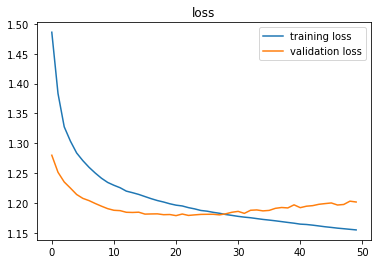

Plotting metrics...


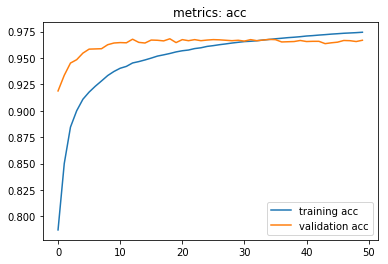

train {'acc': 0.99258184}
test {'acc': 0.9647}

Training student with temperature = 64 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18223247354362406257
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 7071507305980587943
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3401313 , acc = 0.06 
Epoch 1 , step 100 , loss= 1.0682526 , acc = 0.85 
Epoch 1 , step 200 , loss= 0.89515126 , acc = 0.87 
Epoch 1 , step 300 , loss= 0.87092096 , acc = 0.89 
Epoch 1 , step 400 , loss= 0.7426629 , acc = 0.92 
Epoch 1 , step 500 , loss= 0.8943722 , acc = 0.88 
Epoch 1 , step 549 , loss= 0.80569404 val_loss= 0.7817502 , acc = 0.91 val acc = 0.9212 
Epoch 1 finished, loss= 1.0881693 
Epoch 2 , step 50 , loss= 0.6761092 , acc = 0.96 
Epoch 2 , step 

Epoch 20 , step 50 , loss= 0.6267105 , acc = 0.97 
Epoch 20 , step 150 , loss= 0.6167782 , acc = 0.97 
Epoch 20 , step 250 , loss= 0.62017727 , acc = 0.95 
Epoch 20 , step 350 , loss= 0.5855642 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.58801883 , acc = 0.98 
Epoch 20 , step 549 , loss= 0.6620504 val_loss= 0.64219135 , acc = 0.94 val acc = 0.9674 
Epoch 20 finished, loss= 0.68003714 
Epoch 21 , step 0 , loss= 0.59165835 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.62399703 , acc = 0.97 
Epoch 21 , step 200 , loss= 0.59320116 , acc = 0.98 
Epoch 21 , step 300 , loss= 0.65258485 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.5783812 , acc = 0.99 
Epoch 21 , step 500 , loss= 0.6002267 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.6109622 val_loss= 0.6421489 , acc = 0.99 val acc = 0.9672 
Epoch 21 finished, loss= 0.67631996 
Epoch 22 , step 50 , loss= 0.58527774 , acc = 0.98 
Epoch 22 , step 150 , loss= 0.58296055 , acc = 0.98 
Epoch 22 , step 250 , loss= 0.6002961 , acc = 0.98 
Epoch 22 , step

Epoch 40 , step 50 , loss= 0.57723033 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.5974452 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.56731987 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.556954 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.5959227 , acc = 0.97 
Epoch 40 , step 549 , loss= 0.5604973 val_loss= 0.65832686 , acc = 1.0 val acc = 0.9652 
Epoch 40 finished, loss= 0.63517493 
Epoch 41 , step 0 , loss= 0.56455505 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.5609153 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.5703109 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.5671294 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.56138515 , acc = 0.99 
Epoch 41 , step 500 , loss= 0.5606959 , acc = 1.0 
Epoch 41 , step 549 , loss= 0.55759877 val_loss= 0.6595117 , acc = 1.0 val acc = 0.9654 
Epoch 41 finished, loss= 0.6332887 
Epoch 42 , step 50 , loss= 0.5643515 , acc = 1.0 
Epoch 42 , step 150 , loss= 0.5906846 , acc = 0.99 
Epoch 42 , step 250 , loss= 0.59790266 , acc = 0.99 
Epoch 42 , step 350 , loss=

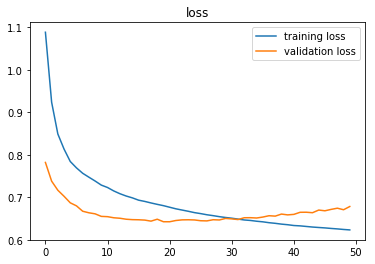

Plotting metrics...


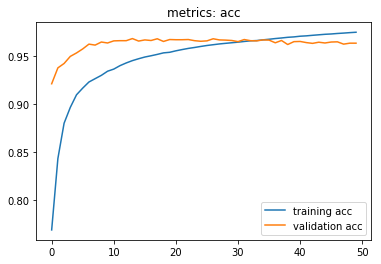

train {'acc': 0.99325454}
test {'acc': 0.9643}

Training student with temperature = 64 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6377082383357085503
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7915821466
locality {
  bus_id: 1
}
incarnation: 681129408745162476
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2627687 , acc = 0.07 
Epoch 1 , step 100 , loss= 0.53283995 , acc = 0.9 
Epoch 1 , step 200 , loss= 0.36816707 , acc = 0.87 
Epoch 1 , step 300 , loss= 0.35786065 , acc = 0.9 
Epoch 1 , step 400 , loss= 0.3605768 , acc = 0.89 
Epoch 1 , step 500 , loss= 0.3100998 , acc = 0.93 
Epoch 1 , step 549 , loss= 0.36026132 val_loss= 0.29273403 , acc = 0.9 val acc = 0.918 
Epoch 1 finished, loss= 0.6503678 
Epoch 2 , step 50 , loss= 0.20847179 , acc = 0.95 
Epoch 2 , step 150 ,

Epoch 19 , step 500 , loss= 0.023263915 , acc = 1.0 
Epoch 19 , step 549 , loss= 0.19579834 val_loss= 0.11455792 , acc = 0.93 val acc = 0.966 
Epoch 19 finished, loss= 0.15605596 
Epoch 20 , step 50 , loss= 0.08298386 , acc = 0.97 
Epoch 20 , step 150 , loss= 0.05086628 , acc = 0.97 
Epoch 20 , step 250 , loss= 0.061495494 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.05020961 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.08630238 , acc = 0.96 
Epoch 20 , step 549 , loss= 0.099464394 val_loss= 0.1186281 , acc = 0.94 val acc = 0.9654 
Epoch 20 finished, loss= 0.15217124 
Epoch 21 , step 0 , loss= 0.04137089 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.032534324 , acc = 0.99 
Epoch 21 , step 200 , loss= 0.19584328 , acc = 0.96 
Epoch 21 , step 300 , loss= 0.13765424 , acc = 0.95 
Epoch 21 , step 400 , loss= 0.037692044 , acc = 1.0 
Epoch 21 , step 500 , loss= 0.03233857 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.053607095 val_loss= 0.12160713 , acc = 0.97 val acc = 0.9654 
Epoch 21 finished,

Epoch 39 , step 200 , loss= 0.050463945 , acc = 0.98 
Epoch 39 , step 300 , loss= 0.05146137 , acc = 0.99 
Epoch 39 , step 400 , loss= 0.042983755 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.021267267 , acc = 0.99 
Epoch 39 , step 549 , loss= 0.03266697 val_loss= 0.13207394 , acc = 0.99 val acc = 0.9652 
Epoch 39 finished, loss= 0.100117505 
Epoch 40 , step 50 , loss= 0.05232555 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.045836788 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.028275918 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.021693772 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.010376982 , acc = 1.0 
Epoch 40 , step 549 , loss= 0.04321263 val_loss= 0.13334005 , acc = 0.99 val acc = 0.965 
Epoch 40 finished, loss= 0.09858296 
Epoch 41 , step 0 , loss= 0.009070825 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.010508996 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.028785817 , acc = 0.98 
Epoch 41 , step 300 , loss= 0.042073365 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.0058186306 , acc = 1.

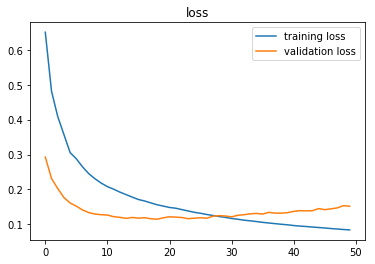

Plotting metrics...


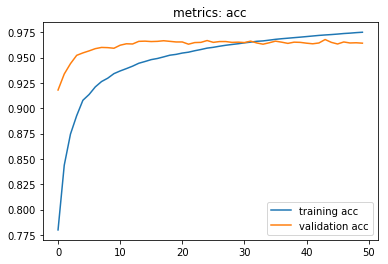

train {'acc': 0.9959273}
test {'acc': 0.9649}

{2: [{'acc': 0.9649}, {'acc': 0.967}, {'acc': 0.9669}, {'acc': 0.9647}, {'acc': 0.9664}], 4: [{'acc': 0.9692}, {'acc': 0.9652}, {'acc': 0.9636}, {'acc': 0.9657}, {'acc': 0.9669}], 8: [{'acc': 0.9658}, {'acc': 0.9621}, {'acc': 0.9621}, {'acc': 0.9604}, {'acc': 0.9651}], 16: [{'acc': 0.9567}, {'acc': 0.9606}, {'acc': 0.9629}, {'acc': 0.9603}, {'acc': 0.9672}], 32: [{'acc': 0.9448}, {'acc': 0.9557}, {'acc': 0.9612}, {'acc': 0.9631}, {'acc': 0.9642}], 64: [{'acc': 0.9469}, {'acc': 0.9615}, {'acc': 0.9647}, {'acc': 0.9643}, {'acc': 0.9649}]}
    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            0.00           1.00            2                   1    0.9649   
1            0.25           0.75            2                   1    0.9670   
2            0.50           0.50            2                   1    0.9669   
3            0.75           0.25            2                   1    0.9647   
4            1.

In [22]:
# df_exp = pd.DataFrame(columns = ['coef_softloss', 'temperature', 'temperature_effect', 'acc'])
list_exp = []

temperatures = [2,4,8,16,32,64]
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    
    coef_soft_losses = [1.0, 0.75, 0.5, 0.25, 0.0]
    tmp_effect = 1 # [1/temperature**2, 1, temperature**2]
    for coef_softloss in coef_soft_losses:
        coef_hardloss = 1-coef_softloss
        
        print('Training student with temperature =',temperature,
              ', coef_softloss =',coef_softloss,', coef_hardloss =',coef_hardloss,
              ',tmp_effect =', tmp_effect,'. ')
        # build network architecture
#         student = build_small_model(input_dims, output_dims, session, is_student=True)
        student = build_small_model(input_dims, output_dims, is_student=True)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss*tmp_effect# * temperature**2
            ,coef_hardloss= coef_hardloss
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=100
            ,n_epochs=50
            ,display_steps=100)
        # show result
        print('Student performance with temperature =',temperature,
             ', coef_softloss =',coef_softloss,',tmp_effi =', tmp_effect,'. ')
        student.plt_loss()
        student.plt_metrics()
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        print('train',train_metric)
        print('test',test_metric)
        print()
        dict_exp = {'coef_softloss':coef_softloss, 'coef_hardloss':coef_hardloss, 
                    'temperature':temperature, 'temperature_effect':tmp_effect, 
                    'train_acc':train_metric['acc'], 'test_acc':test_metric['acc']}
        list_exp.append(dict_exp)
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
#         gc.collect()
df_exp = pd.DataFrame(list_exp)
print(test_metrics)
print(df_exp)

In [23]:
print(test_metrics)
print(df_exp)
print(df_exp['test_acc'].mean())

{2: [{'acc': 0.9649}, {'acc': 0.967}, {'acc': 0.9669}, {'acc': 0.9647}, {'acc': 0.9664}], 4: [{'acc': 0.9692}, {'acc': 0.9652}, {'acc': 0.9636}, {'acc': 0.9657}, {'acc': 0.9669}], 8: [{'acc': 0.9658}, {'acc': 0.9621}, {'acc': 0.9621}, {'acc': 0.9604}, {'acc': 0.9651}], 16: [{'acc': 0.9567}, {'acc': 0.9606}, {'acc': 0.9629}, {'acc': 0.9603}, {'acc': 0.9672}], 32: [{'acc': 0.9448}, {'acc': 0.9557}, {'acc': 0.9612}, {'acc': 0.9631}, {'acc': 0.9642}], 64: [{'acc': 0.9469}, {'acc': 0.9615}, {'acc': 0.9647}, {'acc': 0.9643}, {'acc': 0.9649}]}
    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            0.00           1.00            2                   1    0.9649   
1            0.25           0.75            2                   1    0.9670   
2            0.50           0.50            2                   1    0.9669   
3            0.75           0.25            2                   1    0.9647   
4            1.00           0.00            2                 

Training student with temperature = 2 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17174697719487120209
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 385286144
locality {
  bus_id: 1
}
incarnation: 15615253377950293013
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3154926 , acc = 0.1 
Epoch 1 , step 100 , loss= 1.0834246 , acc = 0.76 
Epoch 1 , step 200 , loss= 0.67143 , acc = 0.78 
Epoch 1 , step 300 , loss= 0.43790123 , acc = 0.87 
Epoch 1 , step 400 , loss= 0.39538357 , acc = 0.86 
Epoch 1 , step 500 , loss= 0.3060941 , acc = 0.9 
Epoch 1 , step 549 , loss= 0.2828097 val_loss= 0.3103526 , acc = 0.9 val acc = 0.9154 
Epoch 1 finished, loss= 0.78464794 
Epoch 2 , step 50 , loss= 0.33747303 , acc = 0.88 
Epoch 2 , step 150 , loss= 0.48055202 , acc = 0.9 
Epoch 2 , step 250 

Epoch 19 , step 549 , loss= 0.037753027 val_loss= 0.10622775 , acc = 0.99 val acc = 0.9648 
Epoch 19 finished, loss= 0.19122973 
Epoch 20 , step 50 , loss= 0.12511651 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.09216807 , acc = 0.97 
Epoch 20 , step 250 , loss= 0.09640422 , acc = 0.98 
Epoch 20 , step 350 , loss= 0.033488642 , acc = 1.0 
Epoch 20 , step 450 , loss= 0.13822624 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.05818996 val_loss= 0.10646608 , acc = 0.98 val acc = 0.964 
Epoch 20 finished, loss= 0.18658523 
Epoch 21 , step 0 , loss= 0.088408746 , acc = 0.96 
Epoch 21 , step 100 , loss= 0.044974357 , acc = 1.0 
Epoch 21 , step 200 , loss= 0.058127727 , acc = 0.98 
Epoch 21 , step 300 , loss= 0.051153317 , acc = 0.99 
Epoch 21 , step 400 , loss= 0.12875395 , acc = 0.95 
Epoch 21 , step 500 , loss= 0.08416194 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.13833113 val_loss= 0.10504037 , acc = 0.99 val acc = 0.965 
Epoch 21 finished, loss= 0.18138681 
Epoch 22 , step 50 , loss= 0.09218

Epoch 39 , step 300 , loss= 0.019903926 , acc = 1.0 
Epoch 39 , step 400 , loss= 0.031112654 , acc = 1.0 
Epoch 39 , step 500 , loss= 0.06969163 , acc = 0.97 
Epoch 39 , step 549 , loss= 0.11211041 val_loss= 0.11236411 , acc = 0.95 val acc = 0.9638 
Epoch 39 finished, loss= 0.12495287 
Epoch 40 , step 50 , loss= 0.045011673 , acc = 0.97 
Epoch 40 , step 150 , loss= 0.024100475 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.076488696 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.015206808 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.056153182 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.027854772 val_loss= 0.11545426 , acc = 0.99 val acc = 0.9648 
Epoch 40 finished, loss= 0.123010926 
Epoch 41 , step 0 , loss= 0.045530282 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.035030853 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.02930919 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.02365514 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.037187774 , acc = 1.0 
Epoch 41 , step 500 , loss= 0.031536605 , acc = 1.0 


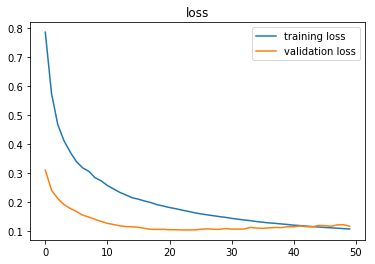

Plotting metrics...


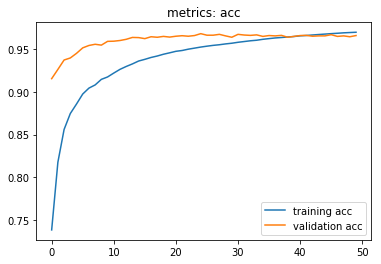

train {'acc': 0.9923091}
test {'acc': 0.9644}

Training student with temperature = 2 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15250208306968830019
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 12179693889030913847
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2732587 , acc = 0.18 
Epoch 1 , step 100 , loss= 0.8596895 , acc = 0.83 
Epoch 1 , step 200 , loss= 0.49304676 , acc = 0.89 
Epoch 1 , step 300 , loss= 0.3477304 , acc = 0.92 
Epoch 1 , step 400 , loss= 0.38614613 , acc = 0.89 
Epoch 1 , step 500 , loss= 0.4273293 , acc = 0.88 
Epoch 1 , step 549 , loss= 0.39612 val_loss= 0.32850814 , acc = 0.86 val acc = 0.9112 
Epoch 1 finished, loss= 0.7404744 
Epoch 2 , step 50 , loss= 0.256737 , acc = 0.9 
Epoch 2 , step 150 , 

Epoch 19 , step 549 , loss= 0.13400273 val_loss= 0.121522255 , acc = 0.96 val acc = 0.9648 
Epoch 19 finished, loss= 0.19986117 
Epoch 20 , step 50 , loss= 0.11102596 , acc = 0.96 
Epoch 20 , step 150 , loss= 0.05082454 , acc = 1.0 
Epoch 20 , step 250 , loss= 0.05099968 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.11598469 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.08875968 , acc = 0.99 
Epoch 20 , step 549 , loss= 0.08995316 val_loss= 0.12100207 , acc = 0.99 val acc = 0.9666 
Epoch 20 finished, loss= 0.19454105 
Epoch 21 , step 0 , loss= 0.044683233 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.053179324 , acc = 0.99 
Epoch 21 , step 200 , loss= 0.12259982 , acc = 0.98 
Epoch 21 , step 300 , loss= 0.18899253 , acc = 0.95 
Epoch 21 , step 400 , loss= 0.0272073 , acc = 1.0 
Epoch 21 , step 500 , loss= 0.043945298 , acc = 1.0 
Epoch 21 , step 549 , loss= 0.04180549 val_loss= 0.120955154 , acc = 1.0 val acc = 0.9654 
Epoch 21 finished, loss= 0.18841422 
Epoch 22 , step 50 , loss= 0.0595379

Epoch 39 , step 300 , loss= 0.092416495 , acc = 0.99 
Epoch 39 , step 400 , loss= 0.05284625 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.06721359 , acc = 0.98 
Epoch 39 , step 549 , loss= 0.044480503 val_loss= 0.1286056 , acc = 0.98 val acc = 0.9646 
Epoch 39 finished, loss= 0.13490103 
Epoch 40 , step 50 , loss= 0.0458617 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.11599928 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.06716562 , acc = 0.97 
Epoch 40 , step 350 , loss= 0.030447174 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.04926013 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.07681581 val_loss= 0.12316944 , acc = 0.97 val acc = 0.9662 
Epoch 40 finished, loss= 0.13327082 
Epoch 41 , step 0 , loss= 0.036395054 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.0715448 , acc = 0.98 
Epoch 41 , step 200 , loss= 0.10594705 , acc = 0.98 
Epoch 41 , step 300 , loss= 0.047303256 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.0701453 , acc = 0.97 
Epoch 41 , step 500 , loss= 0.037222818 , acc = 0.99 
Epoc

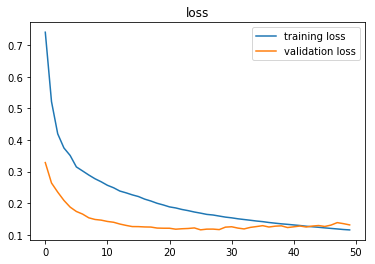

Plotting metrics...


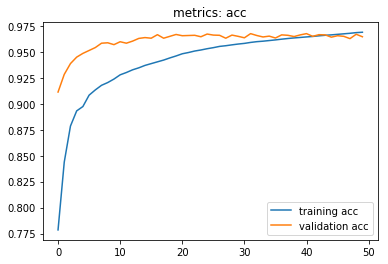

train {'acc': 0.99134547}
test {'acc': 0.9644}

Training student with temperature = 2 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7703836160752449013
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 16380027334741846215
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2932248 , acc = 0.14 
Epoch 1 , step 100 , loss= 0.9541182 , acc = 0.78 
Epoch 1 , step 200 , loss= 0.4565127 , acc = 0.93 
Epoch 1 , step 300 , loss= 0.35188097 , acc = 0.93 
Epoch 1 , step 400 , loss= 0.3050611 , acc = 0.92 
Epoch 1 , step 500 , loss= 0.4532987 , acc = 0.9 
Epoch 1 , step 549 , loss= 0.31792903 val_loss= 0.32096416 , acc = 0.92 val acc = 0.918 
Epoch 1 finished, loss= 0.73314655 
Epoch 2 , step 50 , loss= 0.26323006 , acc = 0.95 
Epoch 2 , step 150 

Epoch 19 , step 500 , loss= 0.095500104 , acc = 0.97 
Epoch 19 , step 549 , loss= 0.13054094 val_loss= 0.12602207 , acc = 0.96 val acc = 0.9644 
Epoch 19 finished, loss= 0.18699162 
Epoch 20 , step 50 , loss= 0.067261 , acc = 0.99 
Epoch 20 , step 150 , loss= 0.053605154 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.06722945 , acc = 0.96 
Epoch 20 , step 350 , loss= 0.07624242 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.11687863 , acc = 0.96 
Epoch 20 , step 549 , loss= 0.089633666 val_loss= 0.120020166 , acc = 0.97 val acc = 0.97 
Epoch 20 finished, loss= 0.18198316 
Epoch 21 , step 0 , loss= 0.12291139 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.037139017 , acc = 1.0 
Epoch 21 , step 200 , loss= 0.07501975 , acc = 0.98 
Epoch 21 , step 300 , loss= 0.081746556 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.035504743 , acc = 1.0 
Epoch 21 , step 500 , loss= 0.070551515 , acc = 0.97 
Epoch 21 , step 549 , loss= 0.16434157 val_loss= 0.12064225 , acc = 0.95 val acc = 0.9684 
Epoch 21 finished,

Epoch 39 , step 200 , loss= 0.11828308 , acc = 0.97 
Epoch 39 , step 300 , loss= 0.027832357 , acc = 1.0 
Epoch 39 , step 400 , loss= 0.05359937 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.080663756 , acc = 0.99 
Epoch 39 , step 549 , loss= 0.039180584 val_loss= 0.12898703 , acc = 0.99 val acc = 0.9692 
Epoch 39 finished, loss= 0.124491654 
Epoch 40 , step 50 , loss= 0.037675835 , acc = 0.98 
Epoch 40 , step 150 , loss= 0.025213268 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.0099306535 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.038831744 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.013937439 , acc = 1.0 
Epoch 40 , step 549 , loss= 0.028226493 val_loss= 0.12816979 , acc = 0.99 val acc = 0.9694 
Epoch 40 finished, loss= 0.12221036 
Epoch 41 , step 0 , loss= 0.102310255 , acc = 0.98 
Epoch 41 , step 100 , loss= 0.023478512 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.033370033 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.02387603 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.012266588 , acc = 1.

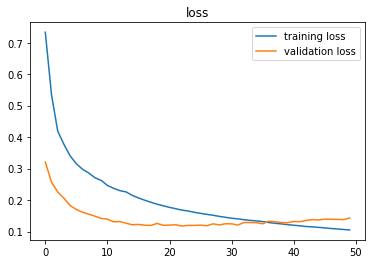

Plotting metrics...


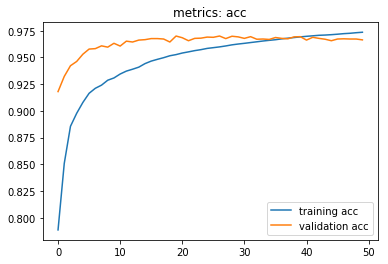

train {'acc': 0.9948364}
test {'acc': 0.9683}

Training student with temperature = 2 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18123805103285571692
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 13030571811390944156
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.327022 , acc = 0.06 
Epoch 1 , step 100 , loss= 0.74190164 , acc = 0.87 
Epoch 1 , step 200 , loss= 0.4349013 , acc = 0.91 
Epoch 1 , step 300 , loss= 0.2635527 , acc = 0.95 
Epoch 1 , step 400 , loss= 0.23345098 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.3011561 , acc = 0.94 
Epoch 1 , step 549 , loss= 0.2754284 val_loss= 0.31419942 , acc = 0.93 val acc = 0.9224 
Epoch 1 finished, loss= 0.6539162 
Epoch 2 , step 50 , loss= 0.34684846 , acc = 0.91 
Epoch 2 , step 15

Epoch 19 , step 500 , loss= 0.049342968 , acc = 0.98 
Epoch 19 , step 549 , loss= 0.043111704 val_loss= 0.11586316 , acc = 0.99 val acc = 0.9688 
Epoch 19 finished, loss= 0.17350397 
Epoch 20 , step 50 , loss= 0.08401711 , acc = 0.99 
Epoch 20 , step 150 , loss= 0.0703447 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.027445748 , acc = 1.0 
Epoch 20 , step 350 , loss= 0.12508553 , acc = 0.94 
Epoch 20 , step 450 , loss= 0.037623983 , acc = 0.98 
Epoch 20 , step 549 , loss= 0.123365544 val_loss= 0.12032303 , acc = 0.95 val acc = 0.9686 
Epoch 20 finished, loss= 0.16909517 
Epoch 21 , step 0 , loss= 0.1363164 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.055596888 , acc = 0.98 
Epoch 21 , step 200 , loss= 0.07187216 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.0599648 , acc = 0.97 
Epoch 21 , step 400 , loss= 0.031700585 , acc = 1.0 
Epoch 21 , step 500 , loss= 0.08042089 , acc = 0.98 
Epoch 21 , step 549 , loss= 0.026696416 val_loss= 0.11414217 , acc = 0.99 val acc = 0.9706 
Epoch 21 finished

Epoch 39 , step 200 , loss= 0.05481448 , acc = 0.99 
Epoch 39 , step 300 , loss= 0.03838086 , acc = 0.99 
Epoch 39 , step 400 , loss= 0.01659872 , acc = 1.0 
Epoch 39 , step 500 , loss= 0.019898366 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.043966576 val_loss= 0.12658638 , acc = 0.99 val acc = 0.969 
Epoch 39 finished, loss= 0.106217794 
Epoch 40 , step 50 , loss= 0.02882633 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.031333815 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.039050005 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.026471283 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.04274467 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.017206956 val_loss= 0.13057154 , acc = 0.99 val acc = 0.9694 
Epoch 40 finished, loss= 0.104480594 
Epoch 41 , step 0 , loss= 0.012551744 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.021966176 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.032541264 , acc = 0.98 
Epoch 41 , step 300 , loss= 0.053008817 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.034324877 , acc = 0.99

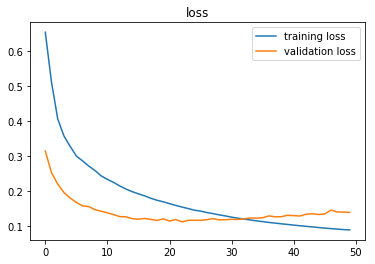

Plotting metrics...


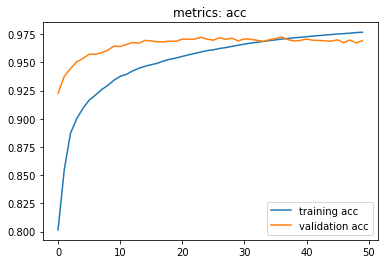

train {'acc': 0.9962909}
test {'acc': 0.9653}

Training student with temperature = 2 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 508143913655256718
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 14261582163789182395
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2815022 , acc = 0.14 
Epoch 1 , step 100 , loss= 0.6451266 , acc = 0.87 
Epoch 1 , step 200 , loss= 0.47400674 , acc = 0.86 
Epoch 1 , step 300 , loss= 0.48816317 , acc = 0.87 
Epoch 1 , step 400 , loss= 0.27096358 , acc = 0.91 
Epoch 1 , step 500 , loss= 0.4280232 , acc = 0.88 
Epoch 1 , step 549 , loss= 0.43788287 val_loss= 0.27752706 , acc = 0.88 val acc = 0.9266 
Epoch 1 finished, loss= 0.71795267 
Epoch 2 , step 50 , loss= 0.31204283 , acc = 0.89 
Epoch 2 , step 15

Epoch 19 , step 500 , loss= 0.025657285 , acc = 1.0 
Epoch 19 , step 549 , loss= 0.014156539 val_loss= 0.11432754 , acc = 1.0 val acc = 0.9664 
Epoch 19 finished, loss= 0.14929856 
Epoch 20 , step 50 , loss= 0.052709803 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.029796882 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.058146473 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.055957362 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.0796995 , acc = 0.96 
Epoch 20 , step 549 , loss= 0.0444903 val_loss= 0.10954917 , acc = 0.99 val acc = 0.9682 
Epoch 20 finished, loss= 0.14487554 
Epoch 21 , step 0 , loss= 0.040086728 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.055264674 , acc = 0.97 
Epoch 21 , step 200 , loss= 0.0426512 , acc = 0.98 
Epoch 21 , step 300 , loss= 0.02903534 , acc = 0.99 
Epoch 21 , step 400 , loss= 0.045189846 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.07199186 , acc = 0.97 
Epoch 21 , step 549 , loss= 0.097438276 val_loss= 0.11168676 , acc = 0.97 val acc = 0.9666 
Epoch 21 finish

Epoch 39 , step 100 , loss= 0.005905329 , acc = 1.0 
Epoch 39 , step 200 , loss= 0.029194936 , acc = 0.99 
Epoch 39 , step 300 , loss= 0.030067135 , acc = 0.99 
Epoch 39 , step 400 , loss= 0.03646024 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.10834902 , acc = 0.97 
Epoch 39 , step 549 , loss= 0.041917425 val_loss= 0.12824023 , acc = 0.99 val acc = 0.9672 
Epoch 39 finished, loss= 0.09793738 
Epoch 40 , step 50 , loss= 0.017177004 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.011537211 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.07338684 , acc = 0.98 
Epoch 40 , step 350 , loss= 0.03885851 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.0339815 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.055699658 val_loss= 0.1306679 , acc = 0.98 val acc = 0.9668 
Epoch 40 finished, loss= 0.09656436 
Epoch 41 , step 0 , loss= 0.054367527 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.017147742 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.044552423 , acc = 0.98 
Epoch 41 , step 300 , loss= 0.10427206 , acc = 0.99 
E

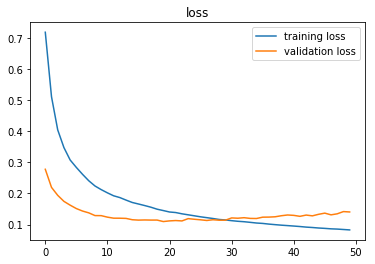

Plotting metrics...


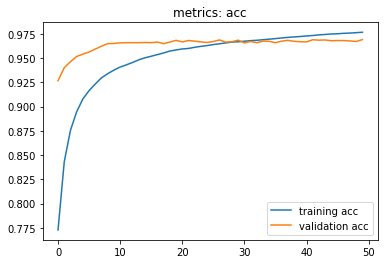

train {'acc': 0.9945091}
test {'acc': 0.9654}

Training student with temperature = 4 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7225149399054229643
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 11037842225445676689
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3037748 , acc = 0.08 
Epoch 1 , step 100 , loss= 1.3243053 , acc = 0.75 
Epoch 1 , step 200 , loss= 0.84860563 , acc = 0.8 
Epoch 1 , step 300 , loss= 0.49820614 , acc = 0.92 
Epoch 1 , step 400 , loss= 0.4993714 , acc = 0.86 
Epoch 1 , step 500 , loss= 0.4775407 , acc = 0.86 
Epoch 1 , step 549 , loss= 0.43884125 val_loss= 0.36156005 , acc = 0.89 val acc = 0.9074 
Epoch 1 finished, loss= 0.91294926 
Epoch 2 , step 50 , loss= 0.34318367 , acc = 0.92 
Epoch 2 , step 15

Epoch 20 , step 50 , loss= 0.11978388 , acc = 0.97 
Epoch 20 , step 150 , loss= 0.09048906 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.10255348 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.11113814 , acc = 0.96 
Epoch 20 , step 450 , loss= 0.05493009 , acc = 1.0 
Epoch 20 , step 549 , loss= 0.106806986 val_loss= 0.14074488 , acc = 0.97 val acc = 0.964 
Epoch 20 finished, loss= 0.22075526 
Epoch 21 , step 0 , loss= 0.036871262 , acc = 1.0 
Epoch 21 , step 100 , loss= 0.17713301 , acc = 0.97 
Epoch 21 , step 200 , loss= 0.10385409 , acc = 0.95 
Epoch 21 , step 300 , loss= 0.0676743 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.04521418 , acc = 1.0 
Epoch 21 , step 500 , loss= 0.11503621 , acc = 0.98 
Epoch 21 , step 549 , loss= 0.10537383 val_loss= 0.1353326 , acc = 0.98 val acc = 0.9668 
Epoch 21 finished, loss= 0.21422878 
Epoch 22 , step 50 , loss= 0.14409892 , acc = 0.97 
Epoch 22 , step 150 , loss= 0.08455042 , acc = 0.99 
Epoch 22 , step 250 , loss= 0.15783691 , acc = 0.96 
Epoch 22 ,

Epoch 39 , step 549 , loss= 0.109510206 val_loss= 0.12427023 , acc = 0.99 val acc = 0.9672 
Epoch 39 finished, loss= 0.15863155 
Epoch 40 , step 50 , loss= 0.12586033 , acc = 0.98 
Epoch 40 , step 150 , loss= 0.017334774 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.084698744 , acc = 0.98 
Epoch 40 , step 350 , loss= 0.07344177 , acc = 0.98 
Epoch 40 , step 450 , loss= 0.11253768 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.06976752 val_loss= 0.122786924 , acc = 0.99 val acc = 0.9698 
Epoch 40 finished, loss= 0.15683098 
Epoch 41 , step 0 , loss= 0.086851016 , acc = 0.97 
Epoch 41 , step 100 , loss= 0.058915094 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.07601066 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.14741169 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.04855021 , acc = 1.0 
Epoch 41 , step 500 , loss= 0.12879746 , acc = 0.98 
Epoch 41 , step 549 , loss= 0.105583996 val_loss= 0.12634394 , acc = 0.97 val acc = 0.969 
Epoch 41 finished, loss= 0.1551617 
Epoch 42 , step 50 , loss= 0.0778

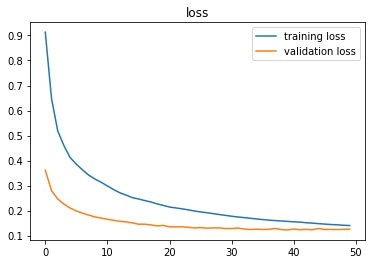

Plotting metrics...


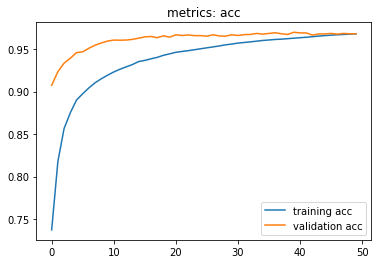

train {'acc': 0.9891273}
test {'acc': 0.9695}

Training student with temperature = 4 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7948766886574058556
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 17514067073263344749
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.33322 , acc = 0.08 
Epoch 1 , step 100 , loss= 1.3230593 , acc = 0.72 
Epoch 1 , step 200 , loss= 0.67642164 , acc = 0.88 
Epoch 1 , step 300 , loss= 0.59215784 , acc = 0.87 
Epoch 1 , step 400 , loss= 0.4788342 , acc = 0.87 
Epoch 1 , step 500 , loss= 0.35944474 , acc = 0.92 
Epoch 1 , step 549 , loss= 0.58968693 val_loss= 0.44181284 , acc = 0.89 val acc = 0.9108 
Epoch 1 finished, loss= 0.90754634 
Epoch 2 , step 50 , loss= 0.52005374 , acc = 0.82 
Epoch 2 , step 

Epoch 20 , step 50 , loss= 0.09848145 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.2786646 , acc = 0.95 
Epoch 20 , step 250 , loss= 0.08988962 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.18597561 , acc = 0.97 
Epoch 20 , step 450 , loss= 0.13547076 , acc = 0.96 
Epoch 20 , step 549 , loss= 0.16792719 val_loss= 0.1686187 , acc = 0.99 val acc = 0.9636 
Epoch 20 finished, loss= 0.25966024 
Epoch 21 , step 0 , loss= 0.17519239 , acc = 0.96 
Epoch 21 , step 100 , loss= 0.081501916 , acc = 0.99 
Epoch 21 , step 200 , loss= 0.088271804 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.18769975 , acc = 0.96 
Epoch 21 , step 400 , loss= 0.13414386 , acc = 0.97 
Epoch 21 , step 500 , loss= 0.17429104 , acc = 0.95 
Epoch 21 , step 549 , loss= 0.08537919 val_loss= 0.16808188 , acc = 0.99 val acc = 0.9636 
Epoch 21 finished, loss= 0.25315556 
Epoch 22 , step 50 , loss= 0.062144313 , acc = 1.0 
Epoch 22 , step 150 , loss= 0.11249167 , acc = 0.99 
Epoch 22 , step 250 , loss= 0.10029499 , acc = 0.99 
Epoch 

Epoch 39 , step 549 , loss= 0.119255625 val_loss= 0.1612739 , acc = 0.98 val acc = 0.9654 
Epoch 39 finished, loss= 0.18541387 
Epoch 40 , step 50 , loss= 0.05782839 , acc = 0.98 
Epoch 40 , step 150 , loss= 0.048412047 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.10150867 , acc = 0.97 
Epoch 40 , step 350 , loss= 0.05704647 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.11225204 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.04886946 val_loss= 0.16130713 , acc = 0.99 val acc = 0.9674 
Epoch 40 finished, loss= 0.18277322 
Epoch 41 , step 0 , loss= 0.05689542 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.05552346 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.043725934 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.07237117 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.11875788 , acc = 0.97 
Epoch 41 , step 500 , loss= 0.06810947 , acc = 0.99 
Epoch 41 , step 549 , loss= 0.12751105 val_loss= 0.16198885 , acc = 0.97 val acc = 0.9654 
Epoch 41 finished, loss= 0.18001473 
Epoch 42 , step 50 , loss= 0.08600835 

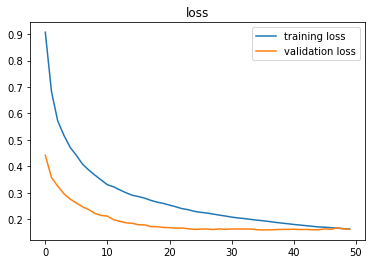

Plotting metrics...


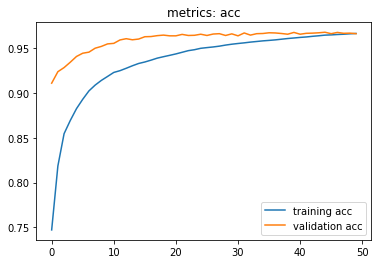

train {'acc': 0.9905818}
test {'acc': 0.9657}

Training student with temperature = 4 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9025956888216827721
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 15211316501807912843
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3005288 , acc = 0.11 
Epoch 1 , step 100 , loss= 1.0471005 , acc = 0.83 
Epoch 1 , step 200 , loss= 0.758654 , acc = 0.85 
Epoch 1 , step 300 , loss= 0.5812311 , acc = 0.9 
Epoch 1 , step 400 , loss= 0.6462066 , acc = 0.88 
Epoch 1 , step 500 , loss= 0.5139196 , acc = 0.9 
Epoch 1 , step 549 , loss= 0.4545117 val_loss= 0.45736903 , acc = 0.91 val acc = 0.9102 
Epoch 1 finished, loss= 0.90030754 
Epoch 2 , step 50 , loss= 0.45566878 , acc = 0.91 
Epoch 2 , step 150 , l

Epoch 19 , step 549 , loss= 0.08795825 val_loss= 0.19066337 , acc = 0.98 val acc = 0.9602 
Epoch 19 finished, loss= 0.2723106 
Epoch 20 , step 50 , loss= 0.12862547 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.19035584 , acc = 0.98 
Epoch 20 , step 250 , loss= 0.21134992 , acc = 0.95 
Epoch 20 , step 350 , loss= 0.1679979 , acc = 0.97 
Epoch 20 , step 450 , loss= 0.12583001 , acc = 0.98 
Epoch 20 , step 549 , loss= 0.11022627 val_loss= 0.19124208 , acc = 0.97 val acc = 0.96 
Epoch 20 finished, loss= 0.26692998 
Epoch 21 , step 0 , loss= 0.16908997 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.07503903 , acc = 0.99 
Epoch 21 , step 200 , loss= 0.2334471 , acc = 0.93 
Epoch 21 , step 300 , loss= 0.24611661 , acc = 0.94 
Epoch 21 , step 400 , loss= 0.14635512 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.13921706 , acc = 0.97 
Epoch 21 , step 549 , loss= 0.15700327 val_loss= 0.18983439 , acc = 0.96 val acc = 0.9612 
Epoch 21 finished, loss= 0.26180416 
Epoch 22 , step 50 , loss= 0.086601876 , 

Epoch 39 , step 300 , loss= 0.07845124 , acc = 0.98 
Epoch 39 , step 400 , loss= 0.06875607 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.20311359 , acc = 0.95 
Epoch 39 , step 549 , loss= 0.09408477 val_loss= 0.19159132 , acc = 0.99 val acc = 0.9614 
Epoch 39 finished, loss= 0.19748023 
Epoch 40 , step 50 , loss= 0.17218342 , acc = 0.97 
Epoch 40 , step 150 , loss= 0.038708553 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.17614649 , acc = 0.97 
Epoch 40 , step 350 , loss= 0.08277982 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.14377269 , acc = 0.97 
Epoch 40 , step 549 , loss= 0.054601863 val_loss= 0.1920169 , acc = 0.99 val acc = 0.9614 
Epoch 40 finished, loss= 0.19549297 
Epoch 41 , step 0 , loss= 0.07100228 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.05388726 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.025701927 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.07200449 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.045663238 , acc = 1.0 
Epoch 41 , step 500 , loss= 0.043888655 , acc = 0.99 
Epoc

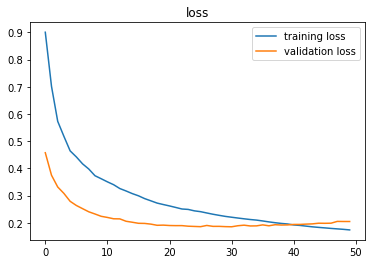

Plotting metrics...


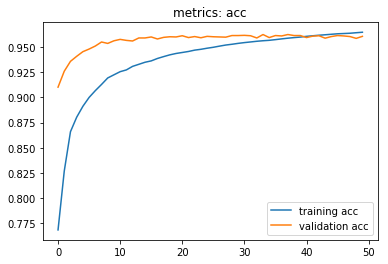

train {'acc': 0.98767275}
test {'acc': 0.9636}

Training student with temperature = 4 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 771586491604170114
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 9787388464101018122
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2913327 , acc = 0.1 
Epoch 1 , step 100 , loss= 0.85668683 , acc = 0.83 
Epoch 1 , step 200 , loss= 0.6964692 , acc = 0.85 
Epoch 1 , step 300 , loss= 0.571354 , acc = 0.87 
Epoch 1 , step 400 , loss= 0.3919989 , acc = 0.93 
Epoch 1 , step 500 , loss= 0.35419863 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.4464594 val_loss= 0.41222936 , acc = 0.89 val acc = 0.9126 
Epoch 1 finished, loss= 0.80121416 
Epoch 2 , step 50 , loss= 0.48149306 , acc = 0.89 
Epoch 2 , step 150

Epoch 19 , step 549 , loss= 0.046881635 val_loss= 0.1736757 , acc = 1.0 val acc = 0.9616 
Epoch 19 finished, loss= 0.2453637 
Epoch 20 , step 50 , loss= 0.0959757 , acc = 0.99 
Epoch 20 , step 150 , loss= 0.17476857 , acc = 0.98 
Epoch 20 , step 250 , loss= 0.05094498 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.09680163 , acc = 0.97 
Epoch 20 , step 450 , loss= 0.08602469 , acc = 0.98 
Epoch 20 , step 549 , loss= 0.14044121 val_loss= 0.17279956 , acc = 0.97 val acc = 0.9622 
Epoch 20 finished, loss= 0.23900044 
Epoch 21 , step 0 , loss= 0.039084297 , acc = 1.0 
Epoch 21 , step 100 , loss= 0.18760729 , acc = 0.96 
Epoch 21 , step 200 , loss= 0.08822057 , acc = 0.98 
Epoch 21 , step 300 , loss= 0.10813923 , acc = 0.97 
Epoch 21 , step 400 , loss= 0.07872704 , acc = 0.99 
Epoch 21 , step 500 , loss= 0.19204378 , acc = 0.98 
Epoch 21 , step 549 , loss= 0.08343765 val_loss= 0.1756331 , acc = 0.96 val acc = 0.9608 
Epoch 21 finished, loss= 0.23246217 
Epoch 22 , step 50 , loss= 0.098472476 ,

Epoch 39 , step 400 , loss= 0.05101005 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.056776494 , acc = 0.99 
Epoch 39 , step 549 , loss= 0.033822164 val_loss= 0.18530259 , acc = 1.0 val acc = 0.9608 
Epoch 39 finished, loss= 0.16434404 
Epoch 40 , step 50 , loss= 0.030462224 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.02745948 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.026866475 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.10329349 , acc = 0.96 
Epoch 40 , step 450 , loss= 0.082641914 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.056732602 val_loss= 0.18754174 , acc = 0.98 val acc = 0.9602 
Epoch 40 finished, loss= 0.16181092 
Epoch 41 , step 0 , loss= 0.031803537 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.034473494 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.05029726 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.024515104 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.10035908 , acc = 0.97 
Epoch 41 , step 500 , loss= 0.07238752 , acc = 0.98 
Epoch 41 , step 549 , loss= 0.039624855 val_loss= 0.1901

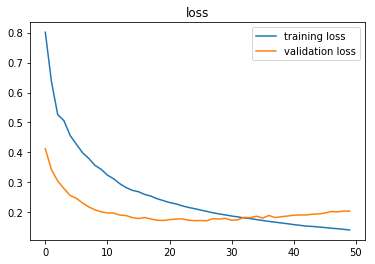

Plotting metrics...


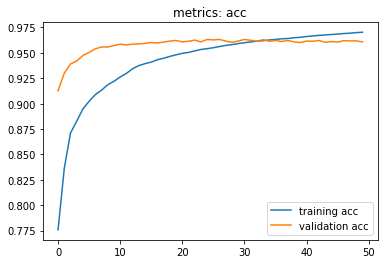

train {'acc': 0.9924545}
test {'acc': 0.9638}

Training student with temperature = 4 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8160187239777228735
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 268202334863701583
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.271728 , acc = 0.13 
Epoch 1 , step 100 , loss= 0.5249487 , acc = 0.93 
Epoch 1 , step 200 , loss= 0.4490418 , acc = 0.89 
Epoch 1 , step 300 , loss= 0.32089025 , acc = 0.92 
Epoch 1 , step 400 , loss= 0.4144026 , acc = 0.9 
Epoch 1 , step 500 , loss= 0.26315537 , acc = 0.92 
Epoch 1 , step 549 , loss= 0.28402898 val_loss= 0.28892946 , acc = 0.93 val acc = 0.9158 
Epoch 1 finished, loss= 0.6468851 
Epoch 2 , step 50 , loss= 0.22371729 , acc = 0.91 
Epoch 2 , step 150 , 

Epoch 19 , step 500 , loss= 0.06670161 , acc = 0.97 
Epoch 19 , step 549 , loss= 0.14488253 val_loss= 0.109872304 , acc = 0.96 val acc = 0.965 
Epoch 19 finished, loss= 0.149744 
Epoch 20 , step 50 , loss= 0.033692595 , acc = 0.99 
Epoch 20 , step 150 , loss= 0.044382993 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.032608088 , acc = 1.0 
Epoch 20 , step 350 , loss= 0.048321012 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.020197188 , acc = 1.0 
Epoch 20 , step 549 , loss= 0.03741441 val_loss= 0.10535676 , acc = 0.99 val acc = 0.9664 
Epoch 20 finished, loss= 0.144499 
Epoch 21 , step 0 , loss= 0.022408672 , acc = 1.0 
Epoch 21 , step 100 , loss= 0.01465456 , acc = 1.0 
Epoch 21 , step 200 , loss= 0.03773153 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.050460145 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.05707259 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.10034978 , acc = 0.98 
Epoch 21 , step 549 , loss= 0.09314662 val_loss= 0.1076475 , acc = 0.98 val acc = 0.967 
Epoch 21 finished, loss

Epoch 39 , step 200 , loss= 0.016018698 , acc = 0.99 
Epoch 39 , step 300 , loss= 0.026322484 , acc = 0.99 
Epoch 39 , step 400 , loss= 0.016539449 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.04238585 , acc = 0.98 
Epoch 39 , step 549 , loss= 0.014441528 val_loss= 0.11481516 , acc = 1.0 val acc = 0.9684 
Epoch 39 finished, loss= 0.09294461 
Epoch 40 , step 50 , loss= 0.01865419 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.009055389 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.025151057 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.027545083 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.018699674 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.015563169 val_loss= 0.11836453 , acc = 1.0 val acc = 0.9678 
Epoch 40 finished, loss= 0.09124076 
Epoch 41 , step 0 , loss= 0.012544618 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.08204861 , acc = 0.96 
Epoch 41 , step 200 , loss= 0.030418556 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.006150205 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.012981929 , acc = 1.0 

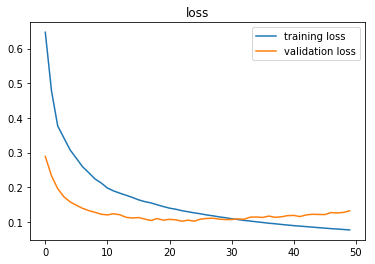

Plotting metrics...


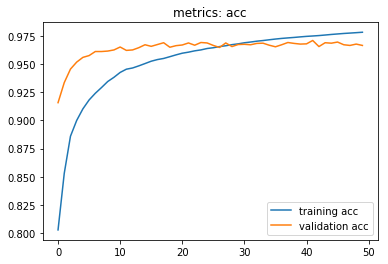

train {'acc': 0.9950727}
test {'acc': 0.967}

Training student with temperature = 8 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9354451198252334650
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 12582050484907996696
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2981503 , acc = 0.13 
Epoch 1 , step 100 , loss= 1.6292212 , acc = 0.69 
Epoch 1 , step 200 , loss= 1.002064 , acc = 0.79 
Epoch 1 , step 300 , loss= 0.8009715 , acc = 0.82 
Epoch 1 , step 400 , loss= 0.6288387 , acc = 0.88 
Epoch 1 , step 500 , loss= 0.6540879 , acc = 0.87 
Epoch 1 , step 549 , loss= 0.6072241 val_loss= 0.54826623 , acc = 0.87 val acc = 0.8914 
Epoch 1 finished, loss= 1.0886511 
Epoch 2 , step 50 , loss= 0.5187821 , acc = 0.91 
Epoch 2 , step 150 , lo

Epoch 19 , step 549 , loss= 0.2552387 val_loss= 0.30307856 , acc = 0.98 val acc = 0.9588 
Epoch 19 finished, loss= 0.4001749 
Epoch 20 , step 50 , loss= 0.25968218 , acc = 0.99 
Epoch 20 , step 150 , loss= 0.30837157 , acc = 0.98 
Epoch 20 , step 250 , loss= 0.30343556 , acc = 0.96 
Epoch 20 , step 350 , loss= 0.31651965 , acc = 0.97 
Epoch 20 , step 450 , loss= 0.28551698 , acc = 0.99 
Epoch 20 , step 549 , loss= 0.32790697 val_loss= 0.30071333 , acc = 0.96 val acc = 0.9584 
Epoch 20 finished, loss= 0.39556244 
Epoch 21 , step 0 , loss= 0.33205485 , acc = 0.93 
Epoch 21 , step 100 , loss= 0.34331456 , acc = 0.93 
Epoch 21 , step 200 , loss= 0.29420647 , acc = 0.95 
Epoch 21 , step 300 , loss= 0.3497648 , acc = 0.96 
Epoch 21 , step 400 , loss= 0.28629068 , acc = 0.97 
Epoch 21 , step 500 , loss= 0.19000266 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.25270462 val_loss= 0.29814357 , acc = 0.97 val acc = 0.9586 
Epoch 21 finished, loss= 0.39030263 
Epoch 22 , step 50 , loss= 0.25269908 ,

Epoch 39 , step 500 , loss= 0.25778276 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.31252477 val_loss= 0.28114888 , acc = 0.97 val acc = 0.965 
Epoch 39 finished, loss= 0.33609542 
Epoch 40 , step 50 , loss= 0.29657823 , acc = 0.98 
Epoch 40 , step 150 , loss= 0.26073936 , acc = 0.96 
Epoch 40 , step 250 , loss= 0.30286995 , acc = 0.97 
Epoch 40 , step 350 , loss= 0.21525949 , acc = 0.98 
Epoch 40 , step 450 , loss= 0.22375064 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.16374063 val_loss= 0.28155896 , acc = 0.99 val acc = 0.9652 
Epoch 40 finished, loss= 0.3339661 
Epoch 41 , step 0 , loss= 0.35021392 , acc = 0.94 
Epoch 41 , step 100 , loss= 0.26226604 , acc = 0.96 
Epoch 41 , step 200 , loss= 0.23978044 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.26642907 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.23093699 , acc = 0.98 
Epoch 41 , step 500 , loss= 0.27606702 , acc = 0.98 
Epoch 41 , step 549 , loss= 0.24412695 val_loss= 0.28145665 , acc = 0.98 val acc = 0.9652 
Epoch 41 finished, loss=

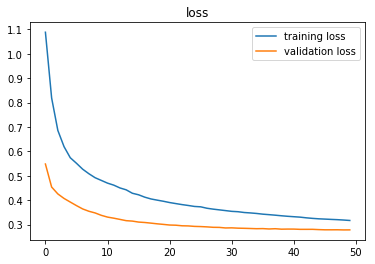

Plotting metrics...


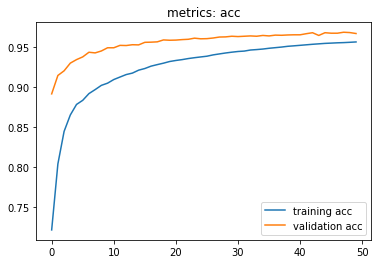

train {'acc': 0.9784727}
test {'acc': 0.9648}

Training student with temperature = 8 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17311263883255543921
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 5993022092092159061
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2954335 , acc = 0.12 
Epoch 1 , step 100 , loss= 1.5471758 , acc = 0.79 
Epoch 1 , step 200 , loss= 1.1184151 , acc = 0.86 
Epoch 1 , step 300 , loss= 1.0514917 , acc = 0.83 
Epoch 1 , step 400 , loss= 0.90001833 , acc = 0.85 
Epoch 1 , step 500 , loss= 0.90350544 , acc = 0.86 
Epoch 1 , step 549 , loss= 0.7280421 val_loss= 0.69291383 , acc = 0.92 val acc = 0.9028 
Epoch 1 finished, loss= 1.2205831 
Epoch 2 , step 50 , loss= 0.73806477 , acc = 0.91 
Epoch 2 , step 1

Epoch 39 , step 500 , loss= 0.36698902 , acc = 0.97 
Epoch 39 , step 549 , loss= 0.23509955 val_loss= 0.31133834 , acc = 0.97 val acc = 0.9642 
Epoch 39 finished, loss= 0.3905364 
Epoch 40 , step 50 , loss= 0.21148291 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.20986322 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.16818874 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.30660746 , acc = 0.98 
Epoch 40 , step 450 , loss= 0.30194363 , acc = 0.96 
Epoch 40 , step 549 , loss= 0.22899427 val_loss= 0.3108213 , acc = 0.97 val acc = 0.963 
Epoch 40 finished, loss= 0.38701278 
Epoch 41 , step 0 , loss= 0.23367773 , acc = 0.98 
Epoch 41 , step 100 , loss= 0.19362022 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.2222893 , acc = 0.98 
Epoch 41 , step 300 , loss= 0.2303317 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.1816263 , acc = 0.97 
Epoch 41 , step 500 , loss= 0.20236911 , acc = 0.99 
Epoch 41 , step 549 , loss= 0.18499771 val_loss= 0.30923095 , acc = 0.99 val acc = 0.9646 
Epoch 41 finished, loss= 0.

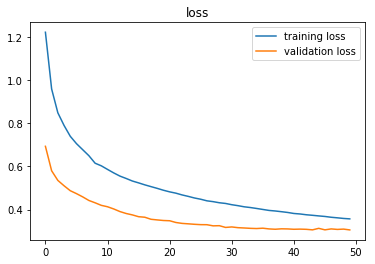

Plotting metrics...


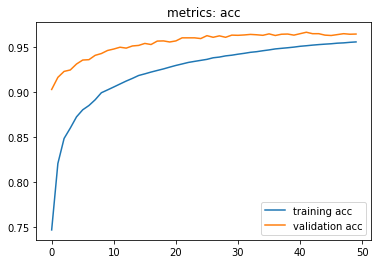

train {'acc': 0.9831273}
test {'acc': 0.9623}

Training student with temperature = 8 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13010713176568104328
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 11483119968719186956
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2781668 , acc = 0.19 
Epoch 1 , step 100 , loss= 1.2249306 , acc = 0.83 
Epoch 1 , step 200 , loss= 1.0190723 , acc = 0.89 
Epoch 1 , step 300 , loss= 0.8940947 , acc = 0.9 
Epoch 1 , step 400 , loss= 0.683219 , acc = 0.93 
Epoch 1 , step 500 , loss= 0.8957821 , acc = 0.86 
Epoch 1 , step 549 , loss= 0.7464729 val_loss= 0.6904054 , acc = 0.87 val acc = 0.917 
Epoch 1 finished, loss= 1.1059626 
Epoch 2 , step 50 , loss= 0.7675492 , acc = 0.91 
Epoch 2 , step 150 , los

Epoch 19 , step 549 , loss= 0.34919387 val_loss= 0.3256474 , acc = 0.95 val acc = 0.9602 
Epoch 19 finished, loss= 0.42604518 
Epoch 20 , step 50 , loss= 0.22096622 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.16651036 , acc = 0.98 
Epoch 20 , step 250 , loss= 0.23843257 , acc = 0.97 
Epoch 20 , step 350 , loss= 0.17893024 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.54343474 , acc = 0.92 
Epoch 20 , step 549 , loss= 0.24263217 val_loss= 0.32079387 , acc = 0.98 val acc = 0.9614 
Epoch 20 finished, loss= 0.4186193 
Epoch 21 , step 0 , loss= 0.27854002 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.18636186 , acc = 0.97 
Epoch 21 , step 200 , loss= 0.22074455 , acc = 0.97 
Epoch 21 , step 300 , loss= 0.23069346 , acc = 0.97 
Epoch 21 , step 400 , loss= 0.46880227 , acc = 0.94 
Epoch 21 , step 500 , loss= 0.16363373 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.23525023 val_loss= 0.3178883 , acc = 0.97 val acc = 0.9606 
Epoch 21 finished, loss= 0.4102521 
Epoch 22 , step 50 , loss= 0.20129366 , 

Epoch 39 , step 400 , loss= 0.26912504 , acc = 0.96 
Epoch 39 , step 500 , loss= 0.22732797 , acc = 0.99 
Epoch 39 , step 549 , loss= 0.22423258 val_loss= 0.31107676 , acc = 0.98 val acc = 0.9636 
Epoch 39 finished, loss= 0.32466084 
Epoch 40 , step 50 , loss= 0.17212138 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.13085742 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.23964012 , acc = 0.96 
Epoch 40 , step 350 , loss= 0.16375095 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.16116306 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.17150104 val_loss= 0.31366378 , acc = 0.97 val acc = 0.9642 
Epoch 40 finished, loss= 0.32116494 
Epoch 41 , step 0 , loss= 0.23177224 , acc = 0.98 
Epoch 41 , step 100 , loss= 0.21891981 , acc = 0.97 
Epoch 41 , step 200 , loss= 0.12084122 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.20158054 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.13009341 , acc = 0.99 
Epoch 41 , step 500 , loss= 0.17288078 , acc = 0.98 
Epoch 41 , step 549 , loss= 0.3101502 val_loss= 0.31514826 , 

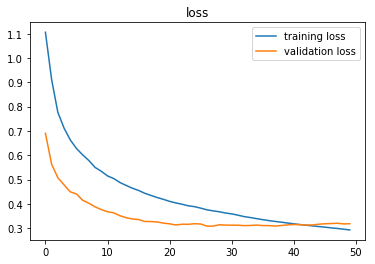

Plotting metrics...


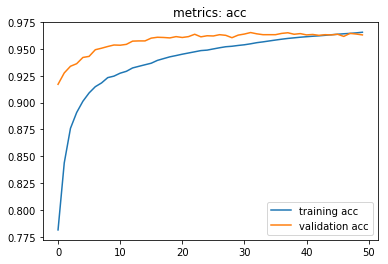

train {'acc': 0.9879636}
test {'acc': 0.9629}

Training student with temperature = 8 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 548989600268965371
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 195935523530264499
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2844636 , acc = 0.08 
Epoch 1 , step 100 , loss= 0.8836295 , acc = 0.91 
Epoch 1 , step 200 , loss= 0.6605276 , acc = 0.92 
Epoch 1 , step 300 , loss= 0.6718693 , acc = 0.89 
Epoch 1 , step 400 , loss= 0.53234184 , acc = 0.93 
Epoch 1 , step 500 , loss= 0.6422905 , acc = 0.88 
Epoch 1 , step 549 , loss= 0.45478123 val_loss= 0.5611594 , acc = 0.92 val acc = 0.9168 
Epoch 1 finished, loss= 0.87570053 
Epoch 2 , step 50 , loss= 0.56732273 , acc = 0.89 
Epoch 2 , step 150 

Epoch 20 , step 50 , loss= 0.25960368 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.12113498 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.1689902 , acc = 0.97 
Epoch 20 , step 350 , loss= 0.22677773 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.21735805 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.19396727 val_loss= 0.25816405 , acc = 0.95 val acc = 0.9666 
Epoch 20 finished, loss= 0.3379892 
Epoch 21 , step 0 , loss= 0.22160693 , acc = 0.98 
Epoch 21 , step 100 , loss= 0.1523905 , acc = 0.98 
Epoch 21 , step 200 , loss= 0.108537056 , acc = 1.0 
Epoch 21 , step 300 , loss= 0.12064919 , acc = 1.0 
Epoch 21 , step 400 , loss= 0.12614584 , acc = 1.0 
Epoch 21 , step 500 , loss= 0.3350556 , acc = 0.94 
Epoch 21 , step 549 , loss= 0.14277689 val_loss= 0.25850266 , acc = 0.98 val acc = 0.9656 
Epoch 21 finished, loss= 0.3295311 
Epoch 22 , step 50 , loss= 0.17126998 , acc = 0.99 
Epoch 22 , step 150 , loss= 0.08440607 , acc = 1.0 
Epoch 22 , step 250 , loss= 0.13457409 , acc = 0.98 
Epoch 22 , ste

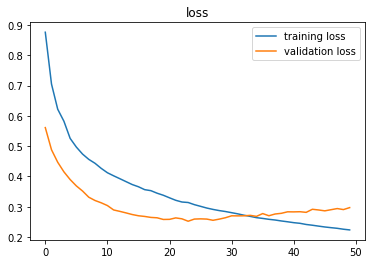

Plotting metrics...


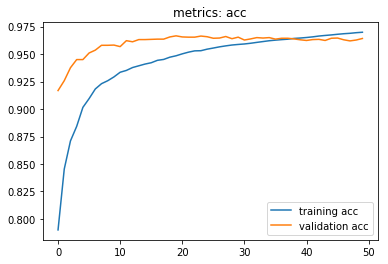

train {'acc': 0.9914727}
test {'acc': 0.9648}

Training student with temperature = 8 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6963691797839756087
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 804883171408188168
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2769382 , acc = 0.14 
Epoch 1 , step 100 , loss= 0.66656244 , acc = 0.86 
Epoch 1 , step 200 , loss= 0.4626853 , acc = 0.87 
Epoch 1 , step 300 , loss= 0.26570588 , acc = 0.91 
Epoch 1 , step 400 , loss= 0.5217343 , acc = 0.82 
Epoch 1 , step 500 , loss= 0.32406893 , acc = 0.92 
Epoch 1 , step 549 , loss= 0.28044307 val_loss= 0.2892532 , acc = 0.92 val acc = 0.9172 
Epoch 1 finished, loss= 0.6854483 
Epoch 2 , step 50 , loss= 0.23890762 , acc = 0.95 
Epoch 2 , step 150 

Epoch 19 , step 500 , loss= 0.046443917 , acc = 0.98 
Epoch 19 , step 549 , loss= 0.09592343 val_loss= 0.112229966 , acc = 0.97 val acc = 0.965 
Epoch 19 finished, loss= 0.15402092 
Epoch 20 , step 50 , loss= 0.05615515 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.057042412 , acc = 0.98 
Epoch 20 , step 250 , loss= 0.0762172 , acc = 0.96 
Epoch 20 , step 350 , loss= 0.024663594 , acc = 1.0 
Epoch 20 , step 450 , loss= 0.068022445 , acc = 0.96 
Epoch 20 , step 549 , loss= 0.04986681 val_loss= 0.1130416 , acc = 0.99 val acc = 0.965 
Epoch 20 finished, loss= 0.14946587 
Epoch 21 , step 0 , loss= 0.069282725 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.06927001 , acc = 0.98 
Epoch 21 , step 200 , loss= 0.028295413 , acc = 1.0 
Epoch 21 , step 300 , loss= 0.0856198 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.054360837 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.039269738 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.13493615 val_loss= 0.1117168 , acc = 0.97 val acc = 0.966 
Epoch 21 finished, l

Epoch 39 , step 200 , loss= 0.025259387 , acc = 1.0 
Epoch 39 , step 300 , loss= 0.05344965 , acc = 0.98 
Epoch 39 , step 400 , loss= 0.05851112 , acc = 0.98 
Epoch 39 , step 500 , loss= 0.036727354 , acc = 0.98 
Epoch 39 , step 549 , loss= 0.026642337 val_loss= 0.12676841 , acc = 0.99 val acc = 0.9672 
Epoch 39 finished, loss= 0.09964332 
Epoch 40 , step 50 , loss= 0.013646751 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.021370985 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.031640567 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.041821696 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.013733706 , acc = 1.0 
Epoch 40 , step 549 , loss= 0.018781167 val_loss= 0.12147765 , acc = 1.0 val acc = 0.9658 
Epoch 40 finished, loss= 0.09788614 
Epoch 41 , step 0 , loss= 0.06225781 , acc = 0.98 
Epoch 41 , step 100 , loss= 0.040052127 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.009676316 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.007411854 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.028212857 , acc = 0.99 


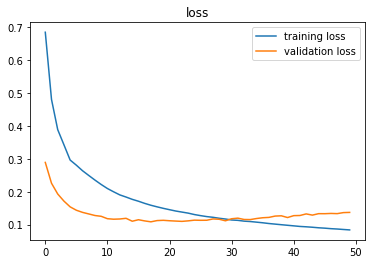

Plotting metrics...


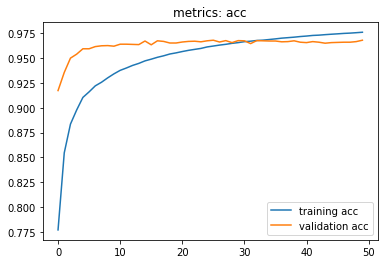

train {'acc': 0.9960727}
test {'acc': 0.9691}

Training student with temperature = 16 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 256 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12526237398644045840
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 3568449111011950319
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2998986 , acc = 0.12 
Epoch 1 , step 100 , loss= 1.9438605 , acc = 0.49 
Epoch 1 , step 200 , loss= 1.5587317 , acc = 0.67 
Epoch 1 , step 300 , loss= 1.3657677 , acc = 0.73 
Epoch 1 , step 400 , loss= 1.3507744 , acc = 0.78 
Epoch 1 , step 500 , loss= 1.1747302 , acc = 0.79 
Epoch 1 , step 549 , loss= 0.9582389 val_loss= 1.078852 , acc = 0.93 val acc = 0.8576 
Epoch 1 finished, loss= 1.5217146 
Epoch 2 , step 50 , loss= 1.0854537 , acc = 0.92 
Epoch 2 , step 150 , 

Epoch 20 , step 50 , loss= 0.83847916 , acc = 0.94 
Epoch 20 , step 150 , loss= 0.7887101 , acc = 0.96 
Epoch 20 , step 250 , loss= 0.7856211 , acc = 0.95 
Epoch 20 , step 350 , loss= 0.8145164 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.93923205 , acc = 0.96 
Epoch 20 , step 549 , loss= 0.89081866 val_loss= 0.83714294 , acc = 0.98 val acc = 0.9502 
Epoch 20 finished, loss= 0.92749834 
Epoch 21 , step 0 , loss= 0.88218963 , acc = 0.94 
Epoch 21 , step 100 , loss= 0.85554457 , acc = 0.96 
Epoch 21 , step 200 , loss= 0.85101247 , acc = 0.94 
Epoch 21 , step 300 , loss= 0.8851493 , acc = 0.96 
Epoch 21 , step 400 , loss= 0.9877016 , acc = 0.93 
Epoch 21 , step 500 , loss= 0.83061516 , acc = 0.97 
Epoch 21 , step 549 , loss= 0.868412 val_loss= 0.8358037 , acc = 0.95 val acc = 0.9516 
Epoch 21 finished, loss= 0.925076 
Epoch 22 , step 50 , loss= 0.73283875 , acc = 0.97 
Epoch 22 , step 150 , loss= 0.8720491 , acc = 0.94 
Epoch 22 , step 250 , loss= 0.8112779 , acc = 0.95 
Epoch 22 , step 35

Epoch 40 , step 50 , loss= 0.76138705 , acc = 0.97 
Epoch 40 , step 150 , loss= 0.7328903 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.8959375 , acc = 0.94 
Epoch 40 , step 350 , loss= 0.84809196 , acc = 0.96 
Epoch 40 , step 450 , loss= 0.8271203 , acc = 0.97 
Epoch 40 , step 549 , loss= 0.8385473 val_loss= 0.82149434 , acc = 0.97 val acc = 0.9562 
Epoch 40 finished, loss= 0.88025606 
Epoch 41 , step 0 , loss= 0.72398233 , acc = 0.96 
Epoch 41 , step 100 , loss= 0.91093606 , acc = 0.97 
Epoch 41 , step 200 , loss= 0.89201456 , acc = 0.96 
Epoch 41 , step 300 , loss= 0.84854347 , acc = 0.97 
Epoch 41 , step 400 , loss= 0.80842704 , acc = 0.96 
Epoch 41 , step 500 , loss= 0.8592747 , acc = 0.94 
Epoch 41 , step 549 , loss= 0.92410433 val_loss= 0.82111806 , acc = 0.96 val acc = 0.9558 
Epoch 41 finished, loss= 0.87952757 
Epoch 42 , step 50 , loss= 0.8961179 , acc = 0.9 
Epoch 42 , step 150 , loss= 0.8762793 , acc = 0.97 
Epoch 42 , step 250 , loss= 0.7871281 , acc = 0.94 
Epoch 42 , step

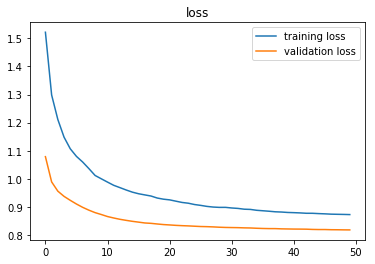

Plotting metrics...


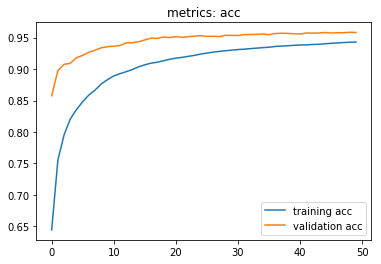

train {'acc': 0.96787274}
test {'acc': 0.9573}

Training student with temperature = 16 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 256 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9620151968087170632
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 1388675312053201630
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3035553 , acc = 0.19 
Epoch 1 , step 100 , loss= 1.6796068 , acc = 0.88 
Epoch 1 , step 200 , loss= 1.5041239 , acc = 0.92 
Epoch 1 , step 300 , loss= 1.3799367 , acc = 0.91 
Epoch 1 , step 400 , loss= 1.2826794 , acc = 0.89 
Epoch 1 , step 500 , loss= 1.2500947 , acc = 0.89 
Epoch 1 , step 549 , loss= 1.1808116 val_loss= 1.1957603 , acc = 0.92 val acc = 0.9032 
Epoch 1 finished, loss= 1.511544 
Epoch 2 , step 50 , loss= 1.332948 , acc = 0.88 
Epoch 2 , step 150 ,

Epoch 20 , step 50 , loss= 0.6661756 , acc = 0.99 
Epoch 20 , step 150 , loss= 0.68456495 , acc = 0.95 
Epoch 20 , step 250 , loss= 0.7803636 , acc = 0.96 
Epoch 20 , step 350 , loss= 0.8500589 , acc = 0.95 
Epoch 20 , step 450 , loss= 0.8023494 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.8476786 val_loss= 0.79145426 , acc = 0.95 val acc = 0.9588 
Epoch 20 finished, loss= 0.9332474 
Epoch 21 , step 0 , loss= 0.7797352 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.88717425 , acc = 0.96 
Epoch 21 , step 200 , loss= 0.82616365 , acc = 0.95 
Epoch 21 , step 300 , loss= 0.6060372 , acc = 1.0 
Epoch 21 , step 400 , loss= 0.56308067 , acc = 0.97 
Epoch 21 , step 500 , loss= 0.76758826 , acc = 0.96 
Epoch 21 , step 549 , loss= 0.65007555 val_loss= 0.7897066 , acc = 0.97 val acc = 0.9586 
Epoch 21 finished, loss= 0.9226424 
Epoch 22 , step 50 , loss= 0.8001291 , acc = 0.98 
Epoch 22 , step 150 , loss= 0.8054877 , acc = 0.93 
Epoch 22 , step 250 , loss= 0.9365838 , acc = 0.92 
Epoch 22 , step 350 

Epoch 40 , step 50 , loss= 0.69061327 , acc = 0.95 
Epoch 40 , step 150 , loss= 0.5416497 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.75345826 , acc = 0.95 
Epoch 40 , step 350 , loss= 0.6773693 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.64319485 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.67028856 val_loss= 0.7546707 , acc = 0.97 val acc = 0.961 
Epoch 40 finished, loss= 0.8315795 
Epoch 41 , step 0 , loss= 0.6932283 , acc = 0.98 
Epoch 41 , step 100 , loss= 0.74216473 , acc = 0.98 
Epoch 41 , step 200 , loss= 0.64514714 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.7486298 , acc = 0.97 
Epoch 41 , step 400 , loss= 0.68459505 , acc = 0.97 
Epoch 41 , step 500 , loss= 0.72979236 , acc = 0.93 
Epoch 41 , step 549 , loss= 0.615116 val_loss= 0.75623244 , acc = 0.97 val acc = 0.9614 
Epoch 41 finished, loss= 0.8279751 
Epoch 42 , step 50 , loss= 0.80953443 , acc = 0.97 
Epoch 42 , step 150 , loss= 0.669026 , acc = 0.99 
Epoch 42 , step 250 , loss= 0.7509512 , acc = 0.95 
Epoch 42 , step 350 

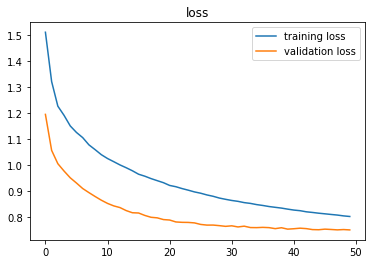

Plotting metrics...


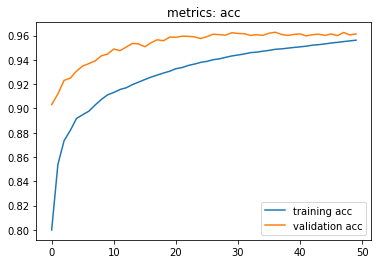

train {'acc': 0.98303634}
test {'acc': 0.9607}

Training student with temperature = 16 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 256 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12622852630182031084
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 3325030793791320099
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2943368 , acc = 0.13 
Epoch 1 , step 100 , loss= 1.3537185 , acc = 0.82 
Epoch 1 , step 200 , loss= 1.1999042 , acc = 0.92 
Epoch 1 , step 300 , loss= 1.107846 , acc = 0.9 
Epoch 1 , step 400 , loss= 1.0334376 , acc = 0.95 
Epoch 1 , step 500 , loss= 1.0892117 , acc = 0.87 
Epoch 1 , step 549 , loss= 1.0302598 val_loss= 1.0336667 , acc = 0.92 val acc = 0.9108 
Epoch 1 finished, loss= 1.301245 
Epoch 2 , step 50 , loss= 0.9276407 , acc = 0.93 
Epoch 2 , step 150 , l

Epoch 20 , step 150 , loss= 0.6034459 , acc = 0.93 
Epoch 20 , step 250 , loss= 0.57466 , acc = 0.95 
Epoch 20 , step 350 , loss= 0.7320633 , acc = 0.97 
Epoch 20 , step 450 , loss= 0.8373787 , acc = 0.95 
Epoch 20 , step 549 , loss= 0.6328759 val_loss= 0.6745454 , acc = 0.94 val acc = 0.9564 
Epoch 20 finished, loss= 0.7585328 
Epoch 21 , step 0 , loss= 0.49520496 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.8564557 , acc = 0.94 
Epoch 21 , step 200 , loss= 0.5512754 , acc = 0.97 
Epoch 21 , step 300 , loss= 0.6035006 , acc = 0.96 
Epoch 21 , step 400 , loss= 0.5706319 , acc = 0.96 
Epoch 21 , step 500 , loss= 0.5651729 , acc = 0.97 
Epoch 21 , step 549 , loss= 0.570744 val_loss= 0.6729198 , acc = 0.95 val acc = 0.9576 
Epoch 21 finished, loss= 0.7505274 
Epoch 22 , step 50 , loss= 0.7607527 , acc = 0.96 
Epoch 22 , step 150 , loss= 0.52193385 , acc = 0.97 
Epoch 22 , step 250 , loss= 0.45568538 , acc = 0.99 
Epoch 22 , step 350 , loss= 0.54337656 , acc = 0.96 
Epoch 22 , step 450 , lo

Epoch 40 , step 150 , loss= 0.4158002 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.53851706 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.4405887 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.47268113 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.6135485 val_loss= 0.63828313 , acc = 0.97 val acc = 0.9636 
Epoch 40 finished, loss= 0.65612876 
Epoch 41 , step 0 , loss= 0.46253496 , acc = 0.98 
Epoch 41 , step 100 , loss= 0.4394021 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.47639272 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.5311079 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.50173813 , acc = 0.98 
Epoch 41 , step 500 , loss= 0.54301536 , acc = 0.99 
Epoch 41 , step 549 , loss= 0.51963073 val_loss= 0.6370125 , acc = 0.97 val acc = 0.9642 
Epoch 41 finished, loss= 0.6519375 
Epoch 42 , step 50 , loss= 0.4615361 , acc = 0.98 
Epoch 42 , step 150 , loss= 0.5452345 , acc = 0.97 
Epoch 42 , step 250 , loss= 0.5782491 , acc = 0.98 
Epoch 42 , step 350 , loss= 0.6418959 , acc = 0.97 
Epoch 42 , step 45

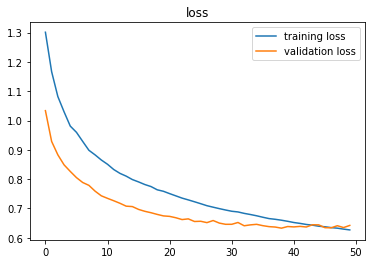

Plotting metrics...


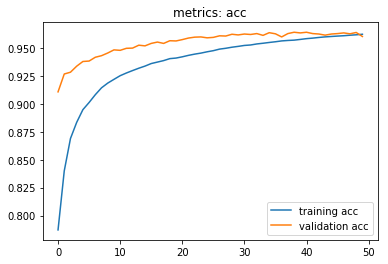

train {'acc': 0.9827091}
test {'acc': 0.9584}

Training student with temperature = 16 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 256 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9936258629429725929
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 8666374312929173982
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.280507 , acc = 0.15 
Epoch 1 , step 100 , loss= 0.9981457 , acc = 0.87 
Epoch 1 , step 200 , loss= 0.79710174 , acc = 0.92 
Epoch 1 , step 300 , loss= 0.7649501 , acc = 0.92 
Epoch 1 , step 400 , loss= 0.7666445 , acc = 0.88 
Epoch 1 , step 500 , loss= 0.67112356 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.6718358 val_loss= 0.68042237 , acc = 0.92 val acc = 0.9224 
Epoch 1 finished, loss= 0.9929012 
Epoch 2 , step 50 , loss= 0.6615057 , acc = 0.93 
Epoch 2 , step 15

Epoch 20 , step 50 , loss= 0.32462028 , acc = 0.99 
Epoch 20 , step 150 , loss= 0.39607456 , acc = 0.96 
Epoch 20 , step 250 , loss= 0.33136252 , acc = 1.0 
Epoch 20 , step 350 , loss= 0.3106605 , acc = 1.0 
Epoch 20 , step 450 , loss= 0.5829288 , acc = 0.95 
Epoch 20 , step 549 , loss= 0.29873705 val_loss= 0.45612594 , acc = 1.0 val acc = 0.9642 
Epoch 20 finished, loss= 0.5047036 
Epoch 21 , step 0 , loss= 0.5252285 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.31892562 , acc = 0.98 
Epoch 21 , step 200 , loss= 0.44599143 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.42256224 , acc = 0.96 
Epoch 21 , step 400 , loss= 0.31227705 , acc = 1.0 
Epoch 21 , step 500 , loss= 0.32928622 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.36544982 val_loss= 0.46022177 , acc = 0.99 val acc = 0.9612 
Epoch 21 finished, loss= 0.49876776 
Epoch 22 , step 50 , loss= 0.5303925 , acc = 0.95 
Epoch 22 , step 150 , loss= 0.4120623 , acc = 0.98 
Epoch 22 , step 250 , loss= 0.3605301 , acc = 0.96 
Epoch 22 , step 3

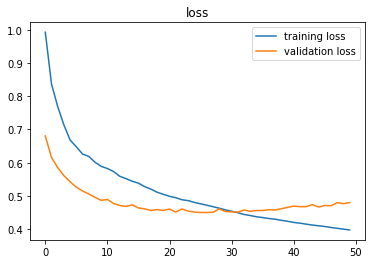

Plotting metrics...


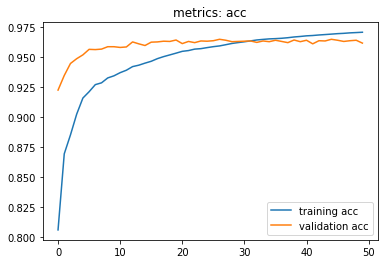

train {'acc': 0.9879091}
test {'acc': 0.9614}

Training student with temperature = 16 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 256 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13333481891794751983
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 2727086781303337289
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3752341 , acc = 0.12 
Epoch 1 , step 100 , loss= 0.74960876 , acc = 0.77 
Epoch 1 , step 200 , loss= 0.44875595 , acc = 0.89 
Epoch 1 , step 300 , loss= 0.34593165 , acc = 0.93 
Epoch 1 , step 400 , loss= 0.30802292 , acc = 0.92 
Epoch 1 , step 500 , loss= 0.42394584 , acc = 0.86 
Epoch 1 , step 549 , loss= 0.30705464 val_loss= 0.28857043 , acc = 0.93 val acc = 0.9194 
Epoch 1 finished, loss= 0.70836484 
Epoch 2 , step 50 , loss= 0.26299915 , acc = 0.92 
Epoch 2 , s

Epoch 19 , step 500 , loss= 0.08074409 , acc = 0.96 
Epoch 19 , step 549 , loss= 0.04462574 val_loss= 0.11127619 , acc = 0.99 val acc = 0.9656 
Epoch 19 finished, loss= 0.15507993 
Epoch 20 , step 50 , loss= 0.08504908 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.03678504 , acc = 1.0 
Epoch 20 , step 250 , loss= 0.14302279 , acc = 0.95 
Epoch 20 , step 350 , loss= 0.017405117 , acc = 1.0 
Epoch 20 , step 450 , loss= 0.08417468 , acc = 0.96 
Epoch 20 , step 549 , loss= 0.081538826 val_loss= 0.11248213 , acc = 0.97 val acc = 0.9662 
Epoch 20 finished, loss= 0.15136836 
Epoch 21 , step 0 , loss= 0.053165723 , acc = 0.98 
Epoch 21 , step 100 , loss= 0.03688658 , acc = 0.98 
Epoch 21 , step 200 , loss= 0.05314398 , acc = 0.97 
Epoch 21 , step 300 , loss= 0.05783185 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.08059995 , acc = 0.97 
Epoch 21 , step 500 , loss= 0.06722396 , acc = 0.96 
Epoch 21 , step 549 , loss= 0.06464877 val_loss= 0.11005643 , acc = 0.97 val acc = 0.968 
Epoch 21 finished, l

Epoch 39 , step 200 , loss= 0.01842131 , acc = 0.99 
Epoch 39 , step 300 , loss= 0.049610905 , acc = 0.99 
Epoch 39 , step 400 , loss= 0.013474902 , acc = 1.0 
Epoch 39 , step 500 , loss= 0.010856433 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.014106792 val_loss= 0.12745333 , acc = 1.0 val acc = 0.9638 
Epoch 39 finished, loss= 0.09668366 
Epoch 40 , step 50 , loss= 0.016676338 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.018145509 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.042194877 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.027489185 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.046046235 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.012290594 val_loss= 0.13175695 , acc = 1.0 val acc = 0.9644 
Epoch 40 finished, loss= 0.09507882 
Epoch 41 , step 0 , loss= 0.024710724 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.009721387 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.013733793 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.04329588 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.021620035 , acc = 1.0 
E

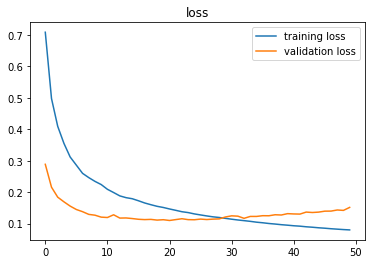

Plotting metrics...


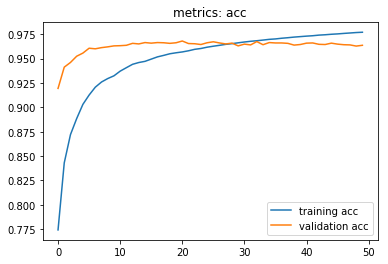

train {'acc': 0.9948364}
test {'acc': 0.9651}

Training student with temperature = 32 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1024 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13726136568237558038
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 11291985426238085228
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3022373 , acc = 0.13 
Epoch 1 , step 100 , loss= 2.2077415 , acc = 0.45 
Epoch 1 , step 200 , loss= 1.9894196 , acc = 0.62 
Epoch 1 , step 300 , loss= 1.8515024 , acc = 0.75 
Epoch 1 , step 400 , loss= 1.8410949 , acc = 0.72 
Epoch 1 , step 500 , loss= 1.8584028 , acc = 0.74 
Epoch 1 , step 549 , loss= 1.8419567 val_loss= 1.7863106 , acc = 0.79 val acc = 0.7906 
Epoch 1 finished, loss= 1.9846222 
Epoch 2 , step 50 , loss= 1.7049038 , acc = 0.83 
Epoch 2 , step 150

Epoch 20 , step 50 , loss= 1.779327 , acc = 0.97 
Epoch 20 , step 150 , loss= 1.5173737 , acc = 0.96 
Epoch 20 , step 250 , loss= 1.7024695 , acc = 0.92 
Epoch 20 , step 350 , loss= 1.692186 , acc = 0.92 
Epoch 20 , step 450 , loss= 1.7697922 , acc = 0.93 
Epoch 20 , step 549 , loss= 1.6432655 val_loss= 1.6565678 , acc = 0.93 val acc = 0.9464 
Epoch 20 finished, loss= 1.71298 
Epoch 21 , step 0 , loss= 1.6807402 , acc = 0.95 
Epoch 21 , step 100 , loss= 1.724162 , acc = 0.94 
Epoch 21 , step 200 , loss= 1.6206778 , acc = 0.95 
Epoch 21 , step 300 , loss= 1.7527684 , acc = 0.92 
Epoch 21 , step 400 , loss= 1.6781921 , acc = 0.96 
Epoch 21 , step 500 , loss= 1.6845067 , acc = 0.96 
Epoch 21 , step 549 , loss= 1.7137965 val_loss= 1.6559149 , acc = 0.92 val acc = 0.947 
Epoch 21 finished, loss= 1.7119874 
Epoch 22 , step 50 , loss= 1.6853638 , acc = 0.92 
Epoch 22 , step 150 , loss= 1.7204243 , acc = 0.94 
Epoch 22 , step 250 , loss= 1.6800569 , acc = 0.94 
Epoch 22 , step 350 , loss= 1.74

Epoch 40 , step 150 , loss= 1.6620495 , acc = 0.98 
Epoch 40 , step 250 , loss= 1.6995265 , acc = 0.98 
Epoch 40 , step 350 , loss= 1.5894295 , acc = 0.97 
Epoch 40 , step 450 , loss= 1.6757767 , acc = 0.96 
Epoch 40 , step 549 , loss= 1.6854024 val_loss= 1.6488973 , acc = 0.95 val acc = 0.9534 
Epoch 40 finished, loss= 1.6837642 
Epoch 41 , step 0 , loss= 1.5301496 , acc = 0.97 
Epoch 41 , step 100 , loss= 1.6578336 , acc = 0.95 
Epoch 41 , step 200 , loss= 1.7148087 , acc = 0.98 
Epoch 41 , step 300 , loss= 1.6372027 , acc = 1.0 
Epoch 41 , step 400 , loss= 1.7071452 , acc = 0.93 
Epoch 41 , step 500 , loss= 1.6259967 , acc = 0.98 
Epoch 41 , step 549 , loss= 1.6557904 val_loss= 1.6487092 , acc = 0.95 val acc = 0.9514 
Epoch 41 finished, loss= 1.6828 
Epoch 42 , step 50 , loss= 1.6503628 , acc = 0.96 
Epoch 42 , step 150 , loss= 1.6729841 , acc = 0.95 
Epoch 42 , step 250 , loss= 1.6629348 , acc = 0.96 
Epoch 42 , step 350 , loss= 1.6574776 , acc = 0.91 
Epoch 42 , step 450 , loss= 1

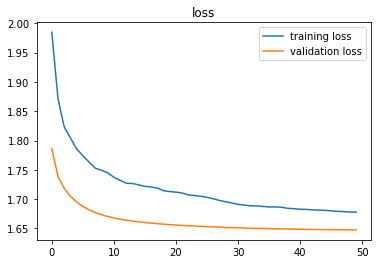

Plotting metrics...


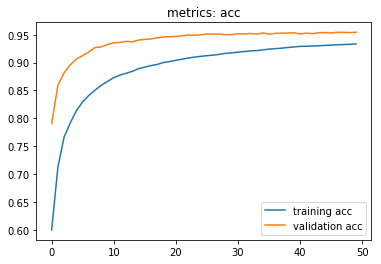

train {'acc': 0.9562727}
test {'acc': 0.9497}

Training student with temperature = 32 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1024 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17004830925519306956
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 2154349079485943643
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3136482 , acc = 0.1 
Epoch 1 , step 100 , loss= 1.8721106 , acc = 0.84 
Epoch 1 , step 200 , loss= 1.7902539 , acc = 0.87 
Epoch 1 , step 300 , loss= 1.7886174 , acc = 0.9 
Epoch 1 , step 400 , loss= 1.6503915 , acc = 0.96 
Epoch 1 , step 500 , loss= 1.6435697 , acc = 0.91 
Epoch 1 , step 549 , loss= 1.6634809 val_loss= 1.6635125 , acc = 0.91 val acc = 0.9116 
Epoch 1 finished, loss= 1.8174388 
Epoch 2 , step 50 , loss= 1.6831163 , acc = 0.88 
Epoch 2 , step 150 

Epoch 20 , step 50 , loss= 1.3799906 , acc = 0.96 
Epoch 20 , step 150 , loss= 1.4597036 , acc = 0.93 
Epoch 20 , step 250 , loss= 1.4048812 , acc = 0.97 
Epoch 20 , step 350 , loss= 1.5362777 , acc = 0.96 
Epoch 20 , step 450 , loss= 1.3118079 , acc = 0.95 
Epoch 20 , step 549 , loss= 1.3474728 val_loss= 1.4164443 , acc = 0.94 val acc = 0.9552 
Epoch 20 finished, loss= 1.4854361 
Epoch 21 , step 0 , loss= 1.3262557 , acc = 0.97 
Epoch 21 , step 100 , loss= 1.3082691 , acc = 0.99 
Epoch 21 , step 200 , loss= 1.4630313 , acc = 0.97 
Epoch 21 , step 300 , loss= 1.5178608 , acc = 0.91 
Epoch 21 , step 400 , loss= 1.431555 , acc = 0.96 
Epoch 21 , step 500 , loss= 1.4612424 , acc = 0.94 
Epoch 21 , step 549 , loss= 1.4640789 val_loss= 1.4124824 , acc = 0.94 val acc = 0.9554 
Epoch 21 finished, loss= 1.4823284 
Epoch 22 , step 50 , loss= 1.2953807 , acc = 0.99 
Epoch 22 , step 150 , loss= 1.3083712 , acc = 0.99 
Epoch 22 , step 250 , loss= 1.3623211 , acc = 0.98 
Epoch 22 , step 350 , loss=

Epoch 40 , step 150 , loss= 1.3248608 , acc = 0.98 
Epoch 40 , step 250 , loss= 1.3603915 , acc = 0.97 
Epoch 40 , step 350 , loss= 1.3347414 , acc = 0.98 
Epoch 40 , step 450 , loss= 1.3629197 , acc = 0.97 
Epoch 40 , step 549 , loss= 1.3291796 val_loss= 1.3927017 , acc = 0.94 val acc = 0.958 
Epoch 40 finished, loss= 1.4156703 
Epoch 41 , step 0 , loss= 1.2967881 , acc = 1.0 
Epoch 41 , step 100 , loss= 1.2897826 , acc = 1.0 
Epoch 41 , step 200 , loss= 1.2183686 , acc = 0.97 
Epoch 41 , step 300 , loss= 1.3788177 , acc = 0.97 
Epoch 41 , step 400 , loss= 1.3406351 , acc = 0.98 
Epoch 41 , step 500 , loss= 1.3383634 , acc = 0.97 
Epoch 41 , step 549 , loss= 1.3502997 val_loss= 1.3865954 , acc = 0.98 val acc = 0.9586 
Epoch 41 finished, loss= 1.4130611 
Epoch 42 , step 50 , loss= 1.2913351 , acc = 0.98 
Epoch 42 , step 150 , loss= 1.343374 , acc = 0.97 
Epoch 42 , step 250 , loss= 1.3298423 , acc = 0.97 
Epoch 42 , step 350 , loss= 1.3488281 , acc = 0.97 
Epoch 42 , step 450 , loss= 1

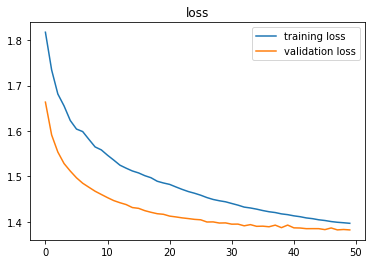

Plotting metrics...


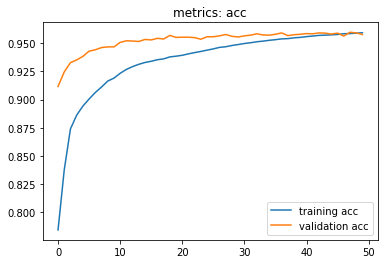

train {'acc': 0.98056364}
test {'acc': 0.9597}

Training student with temperature = 32 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1024 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16691781509886397861
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 746446862828563210
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.300076 , acc = 0.14 
Epoch 1 , step 100 , loss= 1.5029165 , acc = 0.81 
Epoch 1 , step 200 , loss= 1.2625303 , acc = 0.92 
Epoch 1 , step 300 , loss= 1.2819903 , acc = 0.89 
Epoch 1 , step 400 , loss= 1.3114212 , acc = 0.89 
Epoch 1 , step 500 , loss= 1.2683206 , acc = 0.94 
Epoch 1 , step 549 , loss= 1.2157983 val_loss= 1.2241366 , acc = 0.9 val acc = 0.9206 
Epoch 1 finished, loss= 1.4490077 
Epoch 2 , step 50 , loss= 1.2316525 , acc = 0.91 
Epoch 2 , step 150 , 

Epoch 20 , step 50 , loss= 1.08174 , acc = 0.96 
Epoch 20 , step 150 , loss= 1.0321099 , acc = 0.96 
Epoch 20 , step 250 , loss= 1.0375406 , acc = 0.96 
Epoch 20 , step 350 , loss= 0.9757721 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.9177306 , acc = 1.0 
Epoch 20 , step 549 , loss= 0.98662925 val_loss= 1.0487276 , acc = 0.95 val acc = 0.9592 
Epoch 20 finished, loss= 1.1038774 
Epoch 21 , step 0 , loss= 1.0339372 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.96642613 , acc = 0.99 
Epoch 21 , step 200 , loss= 1.0583438 , acc = 0.97 
Epoch 21 , step 300 , loss= 1.1258326 , acc = 0.93 
Epoch 21 , step 400 , loss= 1.2047166 , acc = 0.95 
Epoch 21 , step 500 , loss= 0.9977313 , acc = 0.97 
Epoch 21 , step 549 , loss= 0.9815952 val_loss= 1.0458496 , acc = 0.97 val acc = 0.9596 
Epoch 21 finished, loss= 1.1012602 
Epoch 22 , step 50 , loss= 0.97846174 , acc = 0.97 
Epoch 22 , step 150 , loss= 1.0963871 , acc = 0.97 
Epoch 22 , step 250 , loss= 0.96264946 , acc = 0.97 
Epoch 22 , step 350 , los

Epoch 40 , step 50 , loss= 0.9263356 , acc = 0.98 
Epoch 40 , step 150 , loss= 0.8993796 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.86611533 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.952352 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.9272778 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.89137995 val_loss= 1.0419718 , acc = 0.98 val acc = 0.9602 
Epoch 40 finished, loss= 1.0363787 
Epoch 41 , step 0 , loss= 0.91741097 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.8886348 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.9200557 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.9905137 , acc = 0.97 
Epoch 41 , step 400 , loss= 1.0983846 , acc = 0.95 
Epoch 41 , step 500 , loss= 0.8830932 , acc = 1.0 
Epoch 41 , step 549 , loss= 0.884233 val_loss= 1.04293 , acc = 1.0 val acc = 0.962 
Epoch 41 finished, loss= 1.0338606 
Epoch 42 , step 50 , loss= 0.9023705 , acc = 1.0 
Epoch 42 , step 150 , loss= 0.9568458 , acc = 0.96 
Epoch 42 , step 250 , loss= 0.97236764 , acc = 0.99 
Epoch 42 , step 350 , loss= 0.8

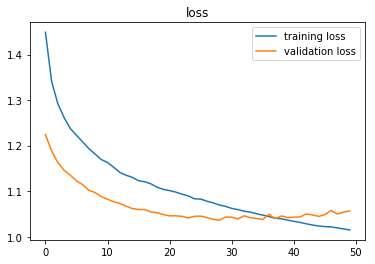

Plotting metrics...


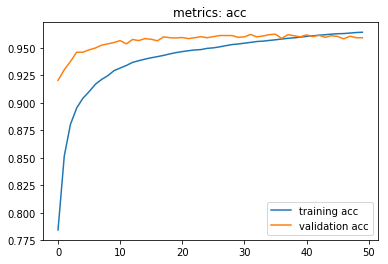

train {'acc': 0.9849273}
test {'acc': 0.96}

Training student with temperature = 32 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1024 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17181601257644117027
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 18046413516655557135
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.331766 , acc = 0.08 
Epoch 1 , step 100 , loss= 1.123384 , acc = 0.82 
Epoch 1 , step 200 , loss= 0.8263196 , acc = 0.92 
Epoch 1 , step 300 , loss= 0.8069191 , acc = 0.91 
Epoch 1 , step 400 , loss= 0.73886853 , acc = 0.94 
Epoch 1 , step 500 , loss= 0.706813 , acc = 0.92 
Epoch 1 , step 549 , loss= 0.91677725 val_loss= 0.7613069 , acc = 0.82 val acc = 0.9186 
Epoch 1 finished, loss= 1.0644068 
Epoch 2 , step 50 , loss= 0.70209074 , acc = 0.97 
Epoch 2 , step 150

Epoch 20 , step 50 , loss= 0.5073792 , acc = 1.0 
Epoch 20 , step 150 , loss= 0.5305866 , acc = 0.98 
Epoch 20 , step 250 , loss= 0.5370828 , acc = 0.98 
Epoch 20 , step 350 , loss= 0.50697285 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.5355983 , acc = 0.98 
Epoch 20 , step 549 , loss= 0.55949265 val_loss= 0.60620856 , acc = 0.97 val acc = 0.9648 
Epoch 20 finished, loss= 0.6403431 
Epoch 21 , step 0 , loss= 0.525819 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.52803135 , acc = 0.97 
Epoch 21 , step 200 , loss= 0.5568014 , acc = 0.98 
Epoch 21 , step 300 , loss= 0.5137697 , acc = 1.0 
Epoch 21 , step 400 , loss= 0.54671717 , acc = 0.97 
Epoch 21 , step 500 , loss= 0.5701276 , acc = 0.98 
Epoch 21 , step 549 , loss= 0.5246756 val_loss= 0.60386765 , acc = 0.99 val acc = 0.9664 
Epoch 21 finished, loss= 0.6351135 
Epoch 22 , step 50 , loss= 0.5494851 , acc = 0.97 
Epoch 22 , step 150 , loss= 0.621453 , acc = 0.93 
Epoch 22 , step 250 , loss= 0.5485989 , acc = 0.98 
Epoch 22 , step 350 , lo

Epoch 40 , step 50 , loss= 0.4596032 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.45720795 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.58156526 , acc = 0.98 
Epoch 40 , step 350 , loss= 0.4845435 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.54387265 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.46531045 val_loss= 0.6207716 , acc = 1.0 val acc = 0.9634 
Epoch 40 finished, loss= 0.58210486 
Epoch 41 , step 0 , loss= 0.45372155 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.48880696 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.47852874 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.47476715 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.5260518 , acc = 0.97 
Epoch 41 , step 500 , loss= 0.5087977 , acc = 0.99 
Epoch 41 , step 549 , loss= 0.48012054 val_loss= 0.6204568 , acc = 1.0 val acc = 0.9638 
Epoch 41 finished, loss= 0.5796182 
Epoch 42 , step 50 , loss= 0.6060036 , acc = 0.97 
Epoch 42 , step 150 , loss= 0.4931429 , acc = 0.98 
Epoch 42 , step 250 , loss= 0.46515912 , acc = 1.0 
Epoch 42 , step 350 , 

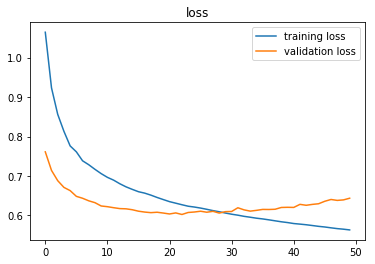

Plotting metrics...


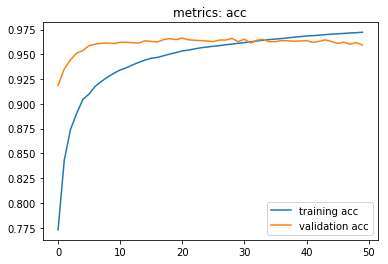

train {'acc': 0.9910909}
test {'acc': 0.9627}

Training student with temperature = 32 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1024 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15307901881401696884
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 8558495137599724868
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2732747 , acc = 0.17 
Epoch 1 , step 100 , loss= 0.76989615 , acc = 0.78 
Epoch 1 , step 200 , loss= 0.45912716 , acc = 0.84 
Epoch 1 , step 300 , loss= 0.41336602 , acc = 0.89 
Epoch 1 , step 400 , loss= 0.26770434 , acc = 0.89 
Epoch 1 , step 500 , loss= 0.29941037 , acc = 0.92 
Epoch 1 , step 549 , loss= 0.39304227 val_loss= 0.28888837 , acc = 0.85 val acc = 0.9182 
Epoch 1 finished, loss= 0.6965459 
Epoch 2 , step 50 , loss= 0.32316715 , acc = 0.9 
Epoch 2 , st

Epoch 19 , step 500 , loss= 0.056130525 , acc = 0.98 
Epoch 19 , step 549 , loss= 0.059975475 val_loss= 0.119914964 , acc = 0.99 val acc = 0.9658 
Epoch 19 finished, loss= 0.15438087 
Epoch 20 , step 50 , loss= 0.09737179 , acc = 0.97 
Epoch 20 , step 150 , loss= 0.035059195 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.11529398 , acc = 0.95 
Epoch 20 , step 350 , loss= 0.09745154 , acc = 0.97 
Epoch 20 , step 450 , loss= 0.05063553 , acc = 0.98 
Epoch 20 , step 549 , loss= 0.11946014 val_loss= 0.12434126 , acc = 0.96 val acc = 0.9656 
Epoch 20 finished, loss= 0.15121923 
Epoch 21 , step 0 , loss= 0.027524242 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.08527866 , acc = 0.94 
Epoch 21 , step 200 , loss= 0.059592094 , acc = 0.98 
Epoch 21 , step 300 , loss= 0.022349667 , acc = 1.0 
Epoch 21 , step 400 , loss= 0.06633284 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.05951978 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.101796456 val_loss= 0.12005757 , acc = 0.98 val acc = 0.9686 
Epoch 21 fini

Epoch 39 , step 200 , loss= 0.04437835 , acc = 0.98 
Epoch 39 , step 300 , loss= 0.017933061 , acc = 1.0 
Epoch 39 , step 400 , loss= 0.017655317 , acc = 1.0 
Epoch 39 , step 500 , loss= 0.014463336 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.021556221 val_loss= 0.12949859 , acc = 1.0 val acc = 0.968 
Epoch 39 finished, loss= 0.10018254 
Epoch 40 , step 50 , loss= 0.012778828 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.025985984 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.026970124 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.046058856 , acc = 0.97 
Epoch 40 , step 450 , loss= 0.052411135 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.02067246 val_loss= 0.13407025 , acc = 1.0 val acc = 0.9644 
Epoch 40 finished, loss= 0.0985817 
Epoch 41 , step 0 , loss= 0.01850471 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.036849674 , acc = 0.98 
Epoch 41 , step 200 , loss= 0.022623345 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.015820079 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.030427683 , acc = 0.99 
Epoc

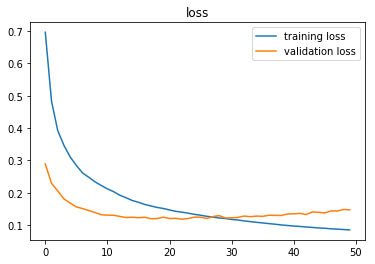

Plotting metrics...


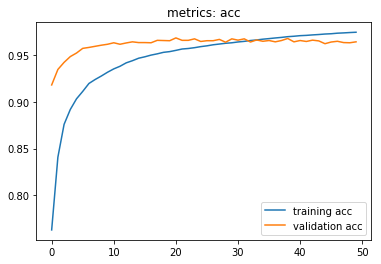

train {'acc': 0.99485457}
test {'acc': 0.9662}

Training student with temperature = 64 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 4096 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1526243747537769719
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 16881104656424536757
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3025603 , acc = 0.14 
Epoch 1 , step 100 , loss= 2.2696023 , acc = 0.48 
Epoch 1 , step 200 , loss= 2.2287207 , acc = 0.66 
Epoch 1 , step 300 , loss= 2.1956246 , acc = 0.67 
Epoch 1 , step 400 , loss= 2.1781828 , acc = 0.78 
Epoch 1 , step 500 , loss= 2.176942 , acc = 0.69 
Epoch 1 , step 549 , loss= 2.2010486 val_loss= 2.1739821 , acc = 0.71 val acc = 0.7558 
Epoch 1 finished, loss= 2.2218115 
Epoch 2 , step 50 , loss= 2.2096815 , acc = 0.69 
Epoch 2 , step 150 

Epoch 20 , step 150 , loss= 2.1172266 , acc = 0.93 
Epoch 20 , step 250 , loss= 2.155116 , acc = 0.91 
Epoch 20 , step 350 , loss= 2.1525137 , acc = 0.92 
Epoch 20 , step 450 , loss= 2.167865 , acc = 0.99 
Epoch 20 , step 549 , loss= 2.1238406 val_loss= 2.133397 , acc = 0.91 val acc = 0.9388 
Epoch 20 finished, loss= 2.1500318 
Epoch 21 , step 0 , loss= 2.1332836 , acc = 0.93 
Epoch 21 , step 100 , loss= 2.1485376 , acc = 0.95 
Epoch 21 , step 200 , loss= 2.1313658 , acc = 0.92 
Epoch 21 , step 300 , loss= 2.1589925 , acc = 0.94 
Epoch 21 , step 400 , loss= 2.1364968 , acc = 0.94 
Epoch 21 , step 500 , loss= 2.1119442 , acc = 0.97 
Epoch 21 , step 549 , loss= 2.1040838 val_loss= 2.1331065 , acc = 0.94 val acc = 0.9402 
Epoch 21 finished, loss= 2.1491156 
Epoch 22 , step 50 , loss= 2.1238825 , acc = 0.91 
Epoch 22 , step 150 , loss= 2.1177685 , acc = 0.94 
Epoch 22 , step 250 , loss= 2.1298454 , acc = 0.94 
Epoch 22 , step 350 , loss= 2.1523812 , acc = 0.87 
Epoch 22 , step 450 , loss= 

Epoch 40 , step 250 , loss= 2.0880442 , acc = 0.94 
Epoch 40 , step 350 , loss= 2.1508462 , acc = 0.94 
Epoch 40 , step 450 , loss= 2.132811 , acc = 0.96 
Epoch 40 , step 549 , loss= 2.1787765 val_loss= 2.131443 , acc = 0.97 val acc = 0.9486 
Epoch 40 finished, loss= 2.1437175 
Epoch 41 , step 0 , loss= 2.142792 , acc = 0.97 
Epoch 41 , step 100 , loss= 2.1400638 , acc = 0.87 
Epoch 41 , step 200 , loss= 2.147283 , acc = 0.94 
Epoch 41 , step 300 , loss= 2.1594288 , acc = 0.96 
Epoch 41 , step 400 , loss= 2.1042295 , acc = 0.98 
Epoch 41 , step 500 , loss= 2.1580052 , acc = 0.95 
Epoch 41 , step 549 , loss= 2.1211262 val_loss= 2.1314185 , acc = 0.99 val acc = 0.9492 
Epoch 41 finished, loss= 2.1435935 
Epoch 42 , step 50 , loss= 2.1350155 , acc = 0.91 
Epoch 42 , step 150 , loss= 2.1535883 , acc = 0.94 
Epoch 42 , step 250 , loss= 2.1605132 , acc = 0.93 
Epoch 42 , step 350 , loss= 2.1258285 , acc = 0.99 
Epoch 42 , step 450 , loss= 2.137677 , acc = 0.96 
Epoch 42 , step 549 , loss= 2.

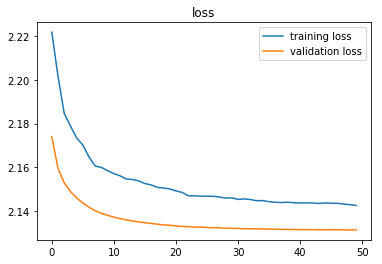

Plotting metrics...


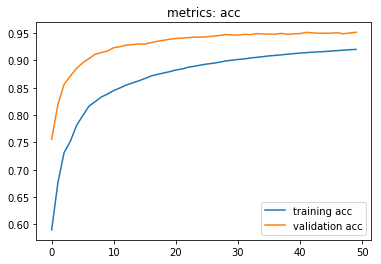

train {'acc': 0.95196366}
test {'acc': 0.9462}

Training student with temperature = 64 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 4096 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6118864288798525052
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 11706525290461874212
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.292888 , acc = 0.09 
Epoch 1 , step 100 , loss= 1.9204737 , acc = 0.77 
Epoch 1 , step 200 , loss= 1.826846 , acc = 0.89 
Epoch 1 , step 300 , loss= 1.8106252 , acc = 0.9 
Epoch 1 , step 400 , loss= 1.77584 , acc = 0.94 
Epoch 1 , step 500 , loss= 1.8028722 , acc = 0.91 
Epoch 1 , step 549 , loss= 1.7809886 val_loss= 1.7773488 , acc = 0.91 val acc = 0.9212 
Epoch 1 finished, loss= 1.8872191 
Epoch 2 , step 50 , loss= 1.7703305 , acc = 0.94 
Epoch 2 , step 150 , 

Epoch 20 , step 50 , loss= 1.6675533 , acc = 0.98 
Epoch 20 , step 150 , loss= 1.6943185 , acc = 0.95 
Epoch 20 , step 250 , loss= 1.6413277 , acc = 0.98 
Epoch 20 , step 350 , loss= 1.675701 , acc = 0.98 
Epoch 20 , step 450 , loss= 1.652164 , acc = 1.0 
Epoch 20 , step 549 , loss= 1.669113 val_loss= 1.6958944 , acc = 0.99 val acc = 0.9636 
Epoch 20 finished, loss= 1.716687 
Epoch 21 , step 0 , loss= 1.6896604 , acc = 0.95 
Epoch 21 , step 100 , loss= 1.682982 , acc = 0.97 
Epoch 21 , step 200 , loss= 1.668916 , acc = 0.99 
Epoch 21 , step 300 , loss= 1.7140485 , acc = 0.97 
Epoch 21 , step 400 , loss= 1.670753 , acc = 0.98 
Epoch 21 , step 500 , loss= 1.6514813 , acc = 0.96 
Epoch 21 , step 549 , loss= 1.6581892 val_loss= 1.6937991 , acc = 0.98 val acc = 0.9614 
Epoch 21 finished, loss= 1.7146375 
Epoch 22 , step 50 , loss= 1.6673074 , acc = 0.96 
Epoch 22 , step 150 , loss= 1.6571141 , acc = 0.98 
Epoch 22 , step 250 , loss= 1.6791658 , acc = 0.96 
Epoch 22 , step 350 , loss= 1.6845

Epoch 40 , step 150 , loss= 1.6725363 , acc = 0.98 
Epoch 40 , step 250 , loss= 1.6553926 , acc = 0.99 
Epoch 40 , step 350 , loss= 1.6375262 , acc = 0.97 
Epoch 40 , step 450 , loss= 1.7123381 , acc = 0.96 
Epoch 40 , step 549 , loss= 1.6444224 val_loss= 1.6922283 , acc = 0.97 val acc = 0.9636 
Epoch 40 finished, loss= 1.6887488 
Epoch 41 , step 0 , loss= 1.6198297 , acc = 0.99 
Epoch 41 , step 100 , loss= 1.6753831 , acc = 0.97 
Epoch 41 , step 200 , loss= 1.6337601 , acc = 0.98 
Epoch 41 , step 300 , loss= 1.6348175 , acc = 0.98 
Epoch 41 , step 400 , loss= 1.63312 , acc = 1.0 
Epoch 41 , step 500 , loss= 1.6744506 , acc = 0.97 
Epoch 41 , step 549 , loss= 1.6542873 val_loss= 1.6904755 , acc = 0.96 val acc = 0.9624 
Epoch 41 finished, loss= 1.6876417 
Epoch 42 , step 50 , loss= 1.6160989 , acc = 0.99 
Epoch 42 , step 150 , loss= 1.6461223 , acc = 0.98 
Epoch 42 , step 250 , loss= 1.6414232 , acc = 0.99 
Epoch 42 , step 350 , loss= 1.6311905 , acc = 1.0 
Epoch 42 , step 450 , loss= 1

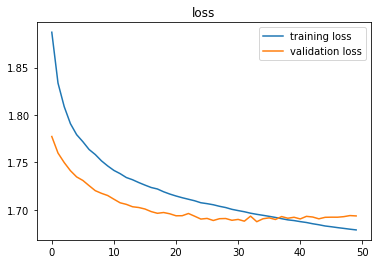

Plotting metrics...


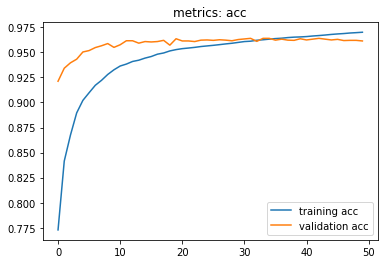

train {'acc': 0.9892182}
test {'acc': 0.9631}

Training student with temperature = 64 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 4096 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7536816973824222282
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 10986521110601123641
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2855496 , acc = 0.1 
Epoch 1 , step 100 , loss= 1.5004425 , acc = 0.81 
Epoch 1 , step 200 , loss= 1.3893561 , acc = 0.85 
Epoch 1 , step 300 , loss= 1.3790125 , acc = 0.88 
Epoch 1 , step 400 , loss= 1.3033905 , acc = 0.88 
Epoch 1 , step 500 , loss= 1.2480667 , acc = 0.93 
Epoch 1 , step 549 , loss= 1.2747833 val_loss= 1.2797151 , acc = 0.94 val acc = 0.918 
Epoch 1 finished, loss= 1.4829429 
Epoch 2 , step 50 , loss= 1.2794429 , acc = 0.92 
Epoch 2 , step 150 , 

Epoch 20 , step 50 , loss= 1.1487461 , acc = 0.97 
Epoch 20 , step 150 , loss= 1.1372955 , acc = 0.99 
Epoch 20 , step 250 , loss= 1.2080948 , acc = 0.95 
Epoch 20 , step 350 , loss= 1.145275 , acc = 0.98 
Epoch 20 , step 450 , loss= 1.1360682 , acc = 1.0 
Epoch 20 , step 549 , loss= 1.1409822 val_loss= 1.1844164 , acc = 0.99 val acc = 0.9624 
Epoch 20 finished, loss= 1.2099113 
Epoch 21 , step 0 , loss= 1.1494862 , acc = 0.98 
Epoch 21 , step 100 , loss= 1.1340605 , acc = 1.0 
Epoch 21 , step 200 , loss= 1.1634213 , acc = 0.98 
Epoch 21 , step 300 , loss= 1.149213 , acc = 0.97 
Epoch 21 , step 400 , loss= 1.144146 , acc = 0.98 
Epoch 21 , step 500 , loss= 1.1788704 , acc = 0.98 
Epoch 21 , step 549 , loss= 1.1601354 val_loss= 1.184705 , acc = 0.98 val acc = 0.9608 
Epoch 21 finished, loss= 1.2070643 
Epoch 22 , step 50 , loss= 1.1430264 , acc = 0.98 
Epoch 22 , step 150 , loss= 1.168989 , acc = 0.99 
Epoch 22 , step 250 , loss= 1.1374363 , acc = 0.98 
Epoch 22 , step 350 , loss= 1.141

Epoch 40 , step 250 , loss= 1.131685 , acc = 0.99 
Epoch 40 , step 350 , loss= 1.0850185 , acc = 1.0 
Epoch 40 , step 450 , loss= 1.1149195 , acc = 0.99 
Epoch 40 , step 549 , loss= 1.1332123 val_loss= 1.1969191 , acc = 0.98 val acc = 0.96 
Epoch 40 finished, loss= 1.1702552 
Epoch 41 , step 0 , loss= 1.1078749 , acc = 0.99 
Epoch 41 , step 100 , loss= 1.1092464 , acc = 1.0 
Epoch 41 , step 200 , loss= 1.097437 , acc = 1.0 
Epoch 41 , step 300 , loss= 1.1086118 , acc = 1.0 
Epoch 41 , step 400 , loss= 1.1109775 , acc = 0.99 
Epoch 41 , step 500 , loss= 1.0969753 , acc = 1.0 
Epoch 41 , step 549 , loss= 1.1149472 val_loss= 1.1988603 , acc = 0.99 val acc = 0.9616 
Epoch 41 finished, loss= 1.1685858 
Epoch 42 , step 50 , loss= 1.1103933 , acc = 0.99 
Epoch 42 , step 150 , loss= 1.1368234 , acc = 0.97 
Epoch 42 , step 250 , loss= 1.1146381 , acc = 0.98 
Epoch 42 , step 350 , loss= 1.1156561 , acc = 1.0 
Epoch 42 , step 450 , loss= 1.1147643 , acc = 0.99 
Epoch 42 , step 549 , loss= 1.11321

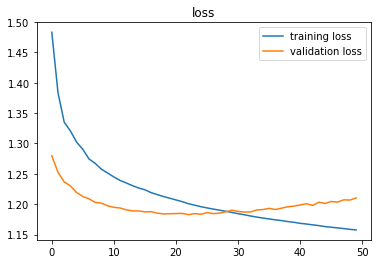

Plotting metrics...


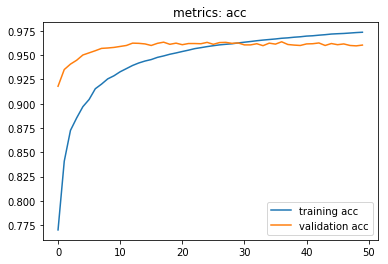

train {'acc': 0.9928909}
test {'acc': 0.9656}

Training student with temperature = 64 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 4096 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11725355843603160458
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 18375505312441393715
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3111887 , acc = 0.1 
Epoch 1 , step 100 , loss= 1.0847472 , acc = 0.87 
Epoch 1 , step 200 , loss= 0.85547394 , acc = 0.9 
Epoch 1 , step 300 , loss= 0.82542855 , acc = 0.9 
Epoch 1 , step 400 , loss= 0.71110153 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.78282 , acc = 0.92 
Epoch 1 , step 549 , loss= 0.81906813 val_loss= 0.78889877 , acc = 0.91 val acc = 0.9154 
Epoch 1 finished, loss= 1.0556897 
Epoch 2 , step 50 , loss= 0.75406563 , acc = 0.91 
Epoch 2 , step 

Epoch 20 , step 50 , loss= 0.6048894 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.5873781 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.64445597 , acc = 0.98 
Epoch 20 , step 350 , loss= 0.58371174 , acc = 1.0 
Epoch 20 , step 450 , loss= 0.62000215 , acc = 0.98 
Epoch 20 , step 549 , loss= 0.66872257 val_loss= 0.6515466 , acc = 0.93 val acc = 0.967 
Epoch 20 finished, loss= 0.6737702 
Epoch 21 , step 0 , loss= 0.5706424 , acc = 1.0 
Epoch 21 , step 100 , loss= 0.59806997 , acc = 0.99 
Epoch 21 , step 200 , loss= 0.58293796 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.5911917 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.61137974 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.64369714 , acc = 0.96 
Epoch 21 , step 549 , loss= 0.61564976 val_loss= 0.6517875 , acc = 0.97 val acc = 0.9654 
Epoch 21 finished, loss= 0.6701 
Epoch 22 , step 50 , loss= 0.57954705 , acc = 1.0 
Epoch 22 , step 150 , loss= 0.5736107 , acc = 1.0 
Epoch 22 , step 250 , loss= 0.6558736 , acc = 0.97 
Epoch 22 , step 350 , lo

Epoch 40 , step 50 , loss= 0.564544 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.5705646 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.5718781 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.5815834 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.5705187 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.5605019 val_loss= 0.66239583 , acc = 1.0 val acc = 0.9662 
Epoch 40 finished, loss= 0.63362014 
Epoch 41 , step 0 , loss= 0.5677618 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.5896437 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.6031344 , acc = 0.98 
Epoch 41 , step 300 , loss= 0.5632885 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.57469887 , acc = 0.99 
Epoch 41 , step 500 , loss= 0.5614057 , acc = 1.0 
Epoch 41 , step 549 , loss= 0.6124118 val_loss= 0.66413057 , acc = 0.97 val acc = 0.9658 
Epoch 41 finished, loss= 0.6322606 
Epoch 42 , step 50 , loss= 0.5636978 , acc = 1.0 
Epoch 42 , step 150 , loss= 0.56804603 , acc = 0.99 
Epoch 42 , step 250 , loss= 0.55809104 , acc = 1.0 
Epoch 42 , step 350 , loss= 

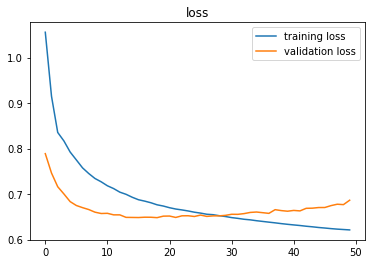

Plotting metrics...


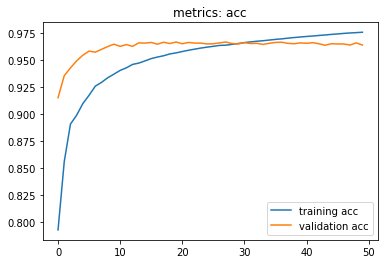

train {'acc': 0.9947091}
test {'acc': 0.9623}

Training student with temperature = 64 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 4096 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17742654229700322862
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 172425216
locality {
  bus_id: 1
}
incarnation: 14441059645955562058
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3122857 , acc = 0.14 
Epoch 1 , step 100 , loss= 0.63450956 , acc = 0.87 
Epoch 1 , step 200 , loss= 0.3846407 , acc = 0.92 
Epoch 1 , step 300 , loss= 0.4112873 , acc = 0.88 
Epoch 1 , step 400 , loss= 0.3756681 , acc = 0.88 
Epoch 1 , step 500 , loss= 0.29560146 , acc = 0.95 
Epoch 1 , step 549 , loss= 0.35747975 val_loss= 0.2698658 , acc = 0.91 val acc = 0.9252 
Epoch 1 finished, loss= 0.6816389 
Epoch 2 , step 50 , loss= 0.4205888 , acc = 0.89 
Epoch 2 , step 

Epoch 19 , step 500 , loss= 0.01690765 , acc = 1.0 
Epoch 19 , step 549 , loss= 0.043688014 val_loss= 0.117215626 , acc = 0.97 val acc = 0.9658 
Epoch 19 finished, loss= 0.15397198 
Epoch 20 , step 50 , loss= 0.07841327 , acc = 0.97 
Epoch 20 , step 150 , loss= 0.031208305 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.09664429 , acc = 0.98 
Epoch 20 , step 350 , loss= 0.059098743 , acc = 1.0 
Epoch 20 , step 450 , loss= 0.053780466 , acc = 0.98 
Epoch 20 , step 549 , loss= 0.07495275 val_loss= 0.11649895 , acc = 0.97 val acc = 0.9678 
Epoch 20 finished, loss= 0.1498971 
Epoch 21 , step 0 , loss= 0.03383585 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.1054287 , acc = 0.96 
Epoch 21 , step 200 , loss= 0.053193744 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.07411665 , acc = 0.99 
Epoch 21 , step 400 , loss= 0.034244742 , acc = 0.99 
Epoch 21 , step 500 , loss= 0.03903701 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.09040158 val_loss= 0.118440576 , acc = 0.97 val acc = 0.9654 
Epoch 21 finishe

Epoch 39 , step 100 , loss= 0.016905505 , acc = 1.0 
Epoch 39 , step 200 , loss= 0.019052718 , acc = 1.0 
Epoch 39 , step 300 , loss= 0.012448978 , acc = 1.0 
Epoch 39 , step 400 , loss= 0.010645633 , acc = 1.0 
Epoch 39 , step 500 , loss= 0.021166213 , acc = 0.99 
Epoch 39 , step 549 , loss= 0.038631782 val_loss= 0.12361472 , acc = 0.98 val acc = 0.9672 
Epoch 39 finished, loss= 0.09643786 
Epoch 40 , step 50 , loss= 0.027319217 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.026361415 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.020592926 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.013536375 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.027993688 , acc = 1.0 
Epoch 40 , step 549 , loss= 0.040742606 val_loss= 0.12691133 , acc = 0.99 val acc = 0.9664 
Epoch 40 finished, loss= 0.09481447 
Epoch 41 , step 0 , loss= 0.02073036 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.039811015 , acc = 0.98 
Epoch 41 , step 200 , loss= 0.033304263 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.03728678 , acc = 0.98

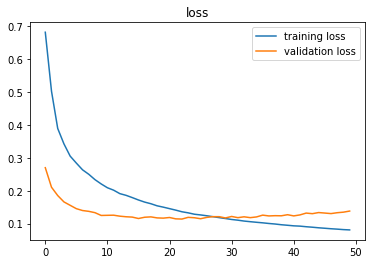

Plotting metrics...


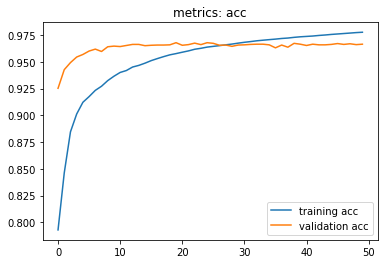

train {'acc': 0.9958909}
test {'acc': 0.964}

{2: [{'acc': 0.9644}, {'acc': 0.9644}, {'acc': 0.9683}, {'acc': 0.9653}, {'acc': 0.9654}], 4: [{'acc': 0.9695}, {'acc': 0.9657}, {'acc': 0.9636}, {'acc': 0.9638}, {'acc': 0.967}], 8: [{'acc': 0.9648}, {'acc': 0.9623}, {'acc': 0.9629}, {'acc': 0.9648}, {'acc': 0.9691}], 16: [{'acc': 0.9573}, {'acc': 0.9607}, {'acc': 0.9584}, {'acc': 0.9614}, {'acc': 0.9651}], 32: [{'acc': 0.9497}, {'acc': 0.9597}, {'acc': 0.96}, {'acc': 0.9627}, {'acc': 0.9662}], 64: [{'acc': 0.9462}, {'acc': 0.9631}, {'acc': 0.9656}, {'acc': 0.9623}, {'acc': 0.964}]}
    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            0.00           1.00            2                   4    0.9644   
1            0.25           0.75            2                   4    0.9644   
2            0.50           0.50            2                   4    0.9683   
3            0.75           0.25            2                   4    0.9653   
4            1.00  

In [20]:
# df_exp = pd.DataFrame(columns = ['coef_softloss', 'temperature', 'temperature_effect', 'acc'])
list_exp2 = []

temperatures = [2,4,8,16,32,64]
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    
    coef_soft_losses = [1.0, 0.75, 0.5, 0.25, 0.0]
    tmp_effect = temperature**2 # [1/temperature**2, 1, temperature**2]
    for coef_softloss in coef_soft_losses:
        coef_hardloss = 1-coef_softloss
        
        print('Training student with temperature =',temperature,
              ', coef_softloss =',coef_softloss,', coef_hardloss =',coef_hardloss,
              ',tmp_effect =', tmp_effect,'. ')
        # build network architecture
#         student = build_small_model(input_dims, output_dims, session, is_student=True)
        student = build_small_model(input_dims, output_dims, is_student=True)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss*tmp_effect# * temperature**2
            ,coef_hardloss= coef_hardloss
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=100
            ,n_epochs=50
            ,display_steps=100)
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        dict_exp = {'coef_softloss':coef_softloss, 'coef_hardloss':coef_hardloss, 
                    'temperature':temperature, 'temperature_effect':tmp_effect, 
                    'train_acc':train_metric['acc'], 'test_acc':test_metric['acc']}
        # show result
        print('Student performance with',dict_exp)
#         print('Student performance with temperature =',temperature,
#              ', coef_softloss =',coef_softloss,',tmp_effi =', tmp_efficect,'. ')
        student.plt_loss()
        student.plt_metrics()
        print('train',train_metric)
        print('test',test_metric)
        print()
        list_exp2.append(dict_exp)
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
#         gc.collect()
df_exp2 = pd.DataFrame(list_exp2)
print(test_metrics)

In [ ]:
print(df_exp2)
print(df_exp2['test_acc'].mean())

In [21]:

# close_session(session)